# Setup

## Environment

In [5]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16057, done.
remote: Total 16057 (delta 0), reused 0 (delta 0), pack-reused 16057
Receiving objects: 100% (16057/16057), 14.60 MiB | 7.31 MiB/s, done.
Resolving deltas: 100% (11032/11032), done.
/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.
Setup complete. Using torch 2.1.0+cu118 (Tesla T4)


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Imports

In [12]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import shutil

# Dataset

## Preparing training, validation and test sets

### Preparing labels

In [ ]:
labels_file_path = "/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/faces.csv"

labels = pd.read_csv(labels_file_path, header=0, delimiter=",")

In [ ]:
labels.head()

image_name  width  height   x0   y0    x1   y1
0  00001722.jpg   1333    2000  490  320   687  664
1  00001044.jpg   2000    1333  791  119  1200  436
2  00001050.jpg    667    1000  304  155   407  331
3  00001736.jpg    626     417  147   14   519  303
4  00003121.jpg    626     418  462   60   599  166

In [ ]:
class_index = "0" # model will detect only one object (human faces), so index of the class is 0
separator_space = " "
new_line = "\n"

In [ ]:
labels_parent_path = "/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/labels"

def create_label_file (file_name, x, y, width, height):
  file = open(os.path.join(labels_parent_path, file_name), "a")
  file.write(class_index + separator_space + x + separator_space + y
             + separator_space + width  + separator_space + height + new_line)
  file.close()

In [ ]:
def create_label_files(data):
  for index, row in data.iterrows():
    file_name = row["image_name"].replace(".jpg", ".txt")
    x_center = (row["x0"] + row["x1"])/2
    y_center = (row["y0"] + row["y1"])/2
    bounding_box_width = row["x1"] - row["x0"]
    bounding_box_height = row["y1"] - row["y0"]
    x_scaled = x_center / row["width"]
    y_scaled = y_center / row["height"]
    width_scaled = bounding_box_width / row["width"]
    height_scaled = bounding_box_height / row["height"]
    create_label_file(file_name, str(x_scaled), str(y_scaled), str(width_scaled), str(height_scaled))

In [ ]:
create_label_files(labels)

### Dividing to training, validation and test sets

In [ ]:
# Read images and annotations
images_path = "/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images"
images = [os.path.join(images_path, x) for x in os.listdir(images_path)]
labels = [os.path.join(labels_parent_path, x) for x in os.listdir(labels_parent_path) if x[-3:] == "txt"]

images.sort()
labels.sort()

In [ ]:
len(images)

2204

In [ ]:
len(labels)

2204

In [ ]:
# Split the dataset into train-valid-test data
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.3, random_state = 1, shuffle=True)
val_images, test_images, val_labels, test_labels = train_test_split(val_images, val_labels, test_size = 0.3, random_state = 1, shuffle=True)

## Creating directories with splitted data

In [ ]:
paths = [os.path.join(images_path, "train"), os.path.join(images_path, "val"),
         os.path.join(images_path, "test"), os.path.join(labels_parent_path, "train"),
         os.path.join(labels_parent_path, "val"), os.path.join(labels_parent_path, "test")]
for path in paths:
  os.mkdir(path)

## Moving files to proper directories

In [ ]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

move_files_to_folder(train_images, os.path.join(images_path, "train/"))
move_files_to_folder(val_images, os.path.join(images_path, "val/"))
move_files_to_folder(test_images, os.path.join(images_path, "test/"))
move_files_to_folder(train_labels, os.path.join(labels_parent_path, "train/"))
move_files_to_folder(val_labels, os.path.join(labels_parent_path, "val/"))
move_files_to_folder(test_labels, os.path.join(labels_parent_path, "test/"))

## Creating face_detection_data.yaml file

In [ ]:
cd "/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5"

/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5


In [ ]:
lines = ["train: \"/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/train/\"",
         "val:  \"/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/val/\"",
         "test: \"/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/\"",
         "nc: 1",
         "names: [\"human_face\"]"
         ]

file = open("data/face_detection_data.yaml", "w")
for line in lines:
  file.write(line + "\n")
file.close()

# Trainings

In [7]:
cd "/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5"

/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5


## First training

### Training

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data face_detection_data.yaml --weights yolov5s.pt --cache

2023-11-11 21:19:48.057257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 21:19:48.057325: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 21:19:48.057368: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=face_detection_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, worker

### Validation

In [ ]:
!python val.py --img 640 --weights runs/train/exp/weights/best.pt --data face_detection_data.yaml

val: data=/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/data/face_detection_data.yaml, weights=['runs/train/exp7/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/labels/val.cache... 463 images, 0 backgrounds, 0 corrupt: 100% 463/463 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 15/15 [00:18<00:00,  1.24s/it]
                   all        463        665      0.846       0.94      0.943      0.671
Speed: 0.2

### Testing

In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source '/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/'

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000018.jpg: 448x640 1 human_face, 48.1ms
image 2/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000114.jpg: 640x448 1 human_face, 100.8ms
image 3/199 /cont

### Results

Results

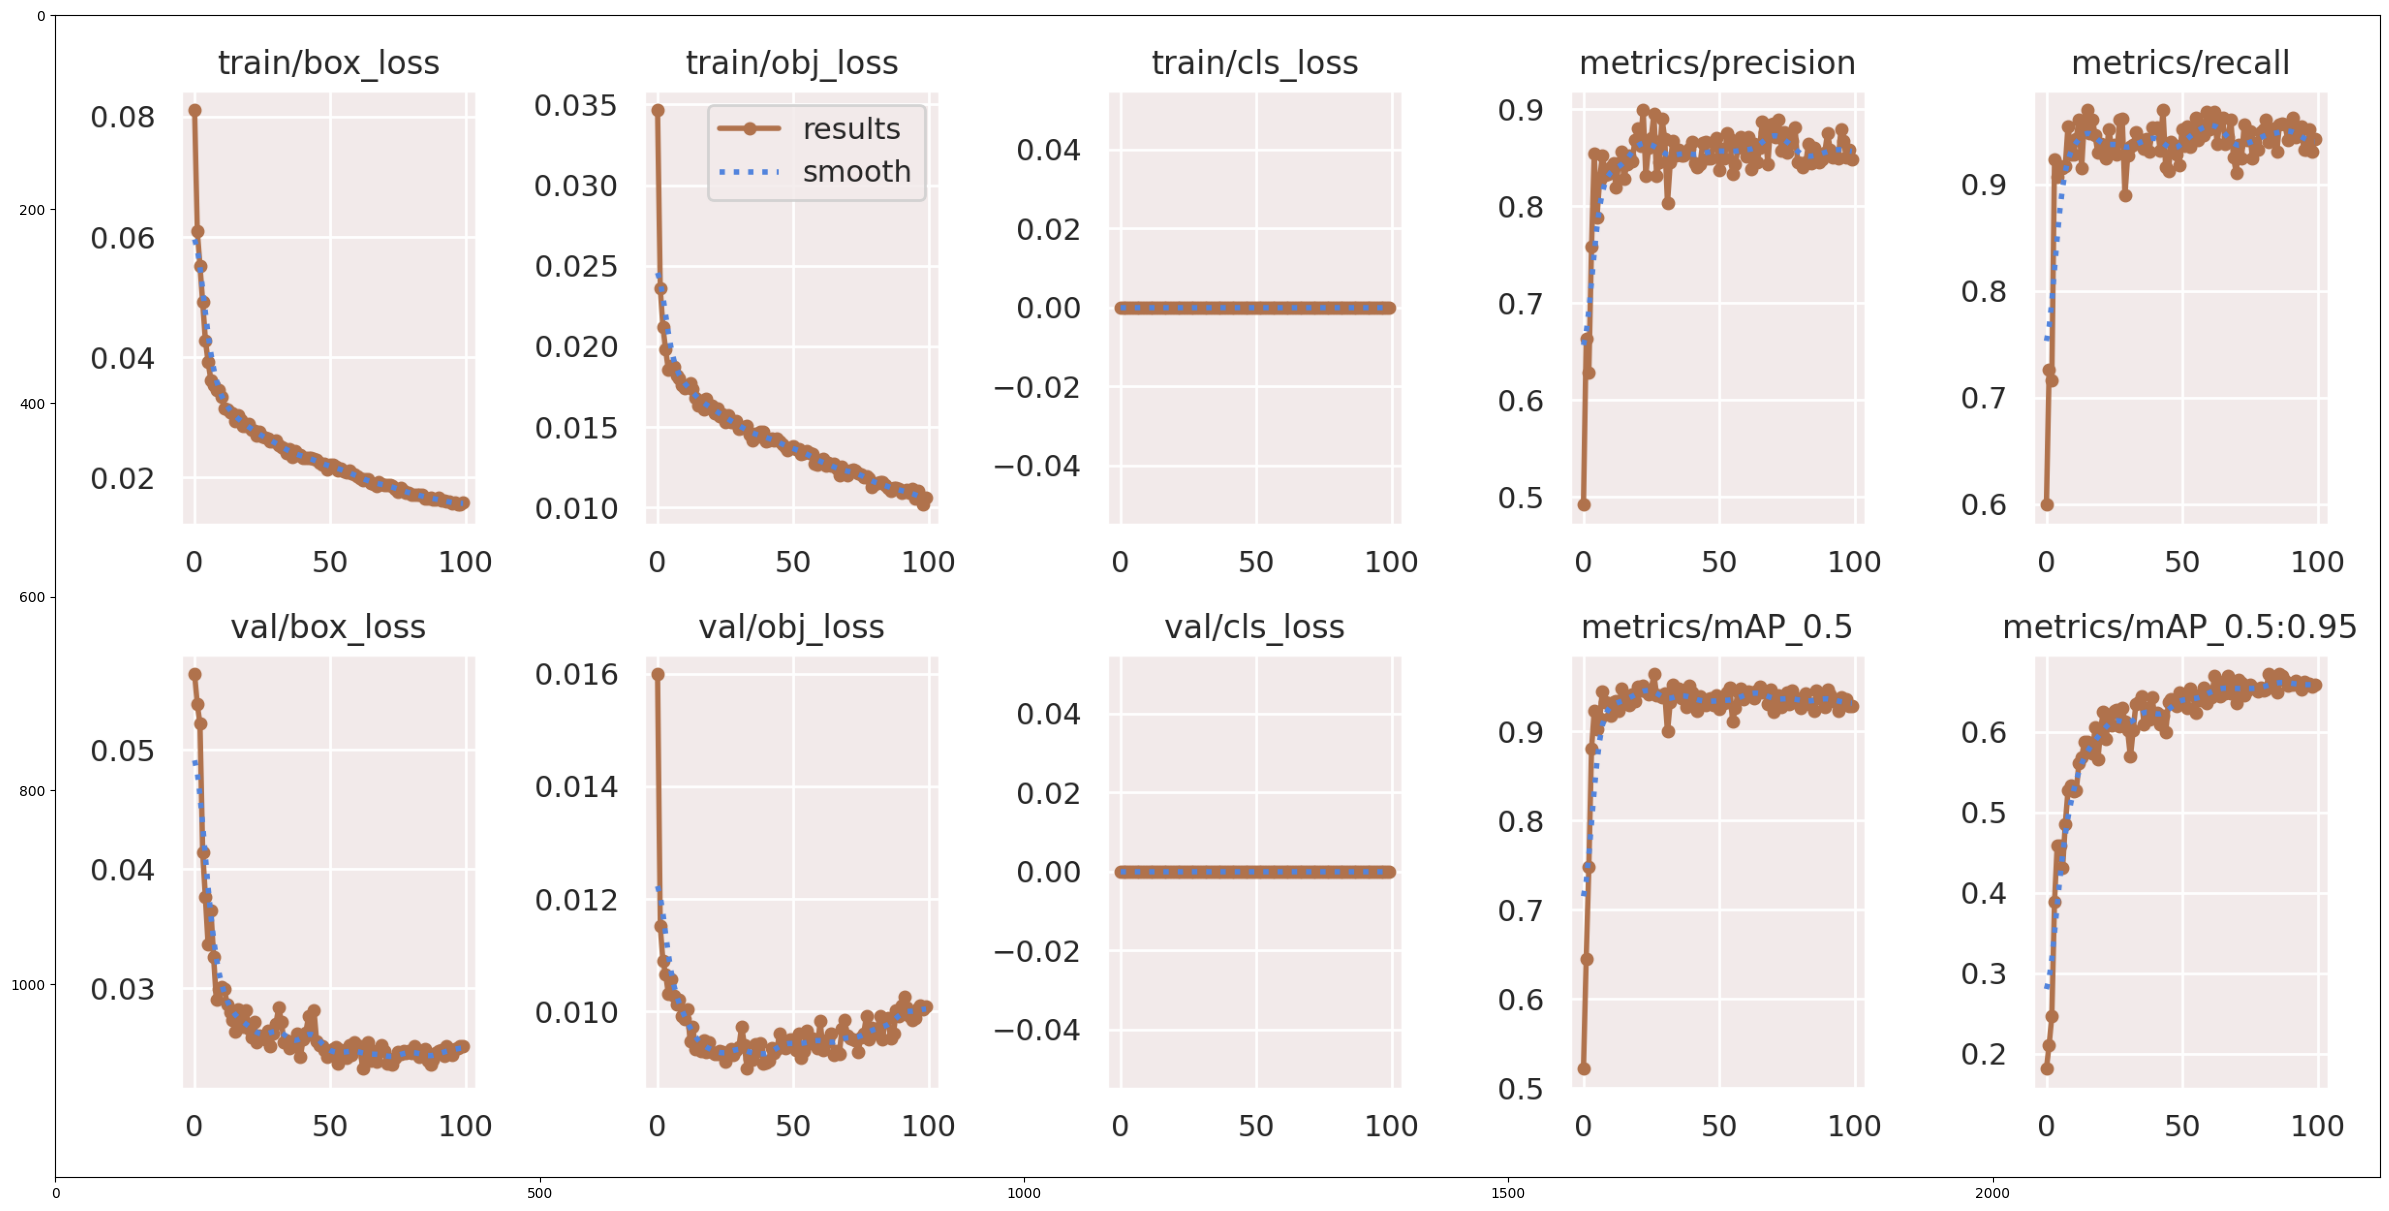

In [18]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/train/exp/results.png")
plt.imshow(results_png)

Confusion matrix

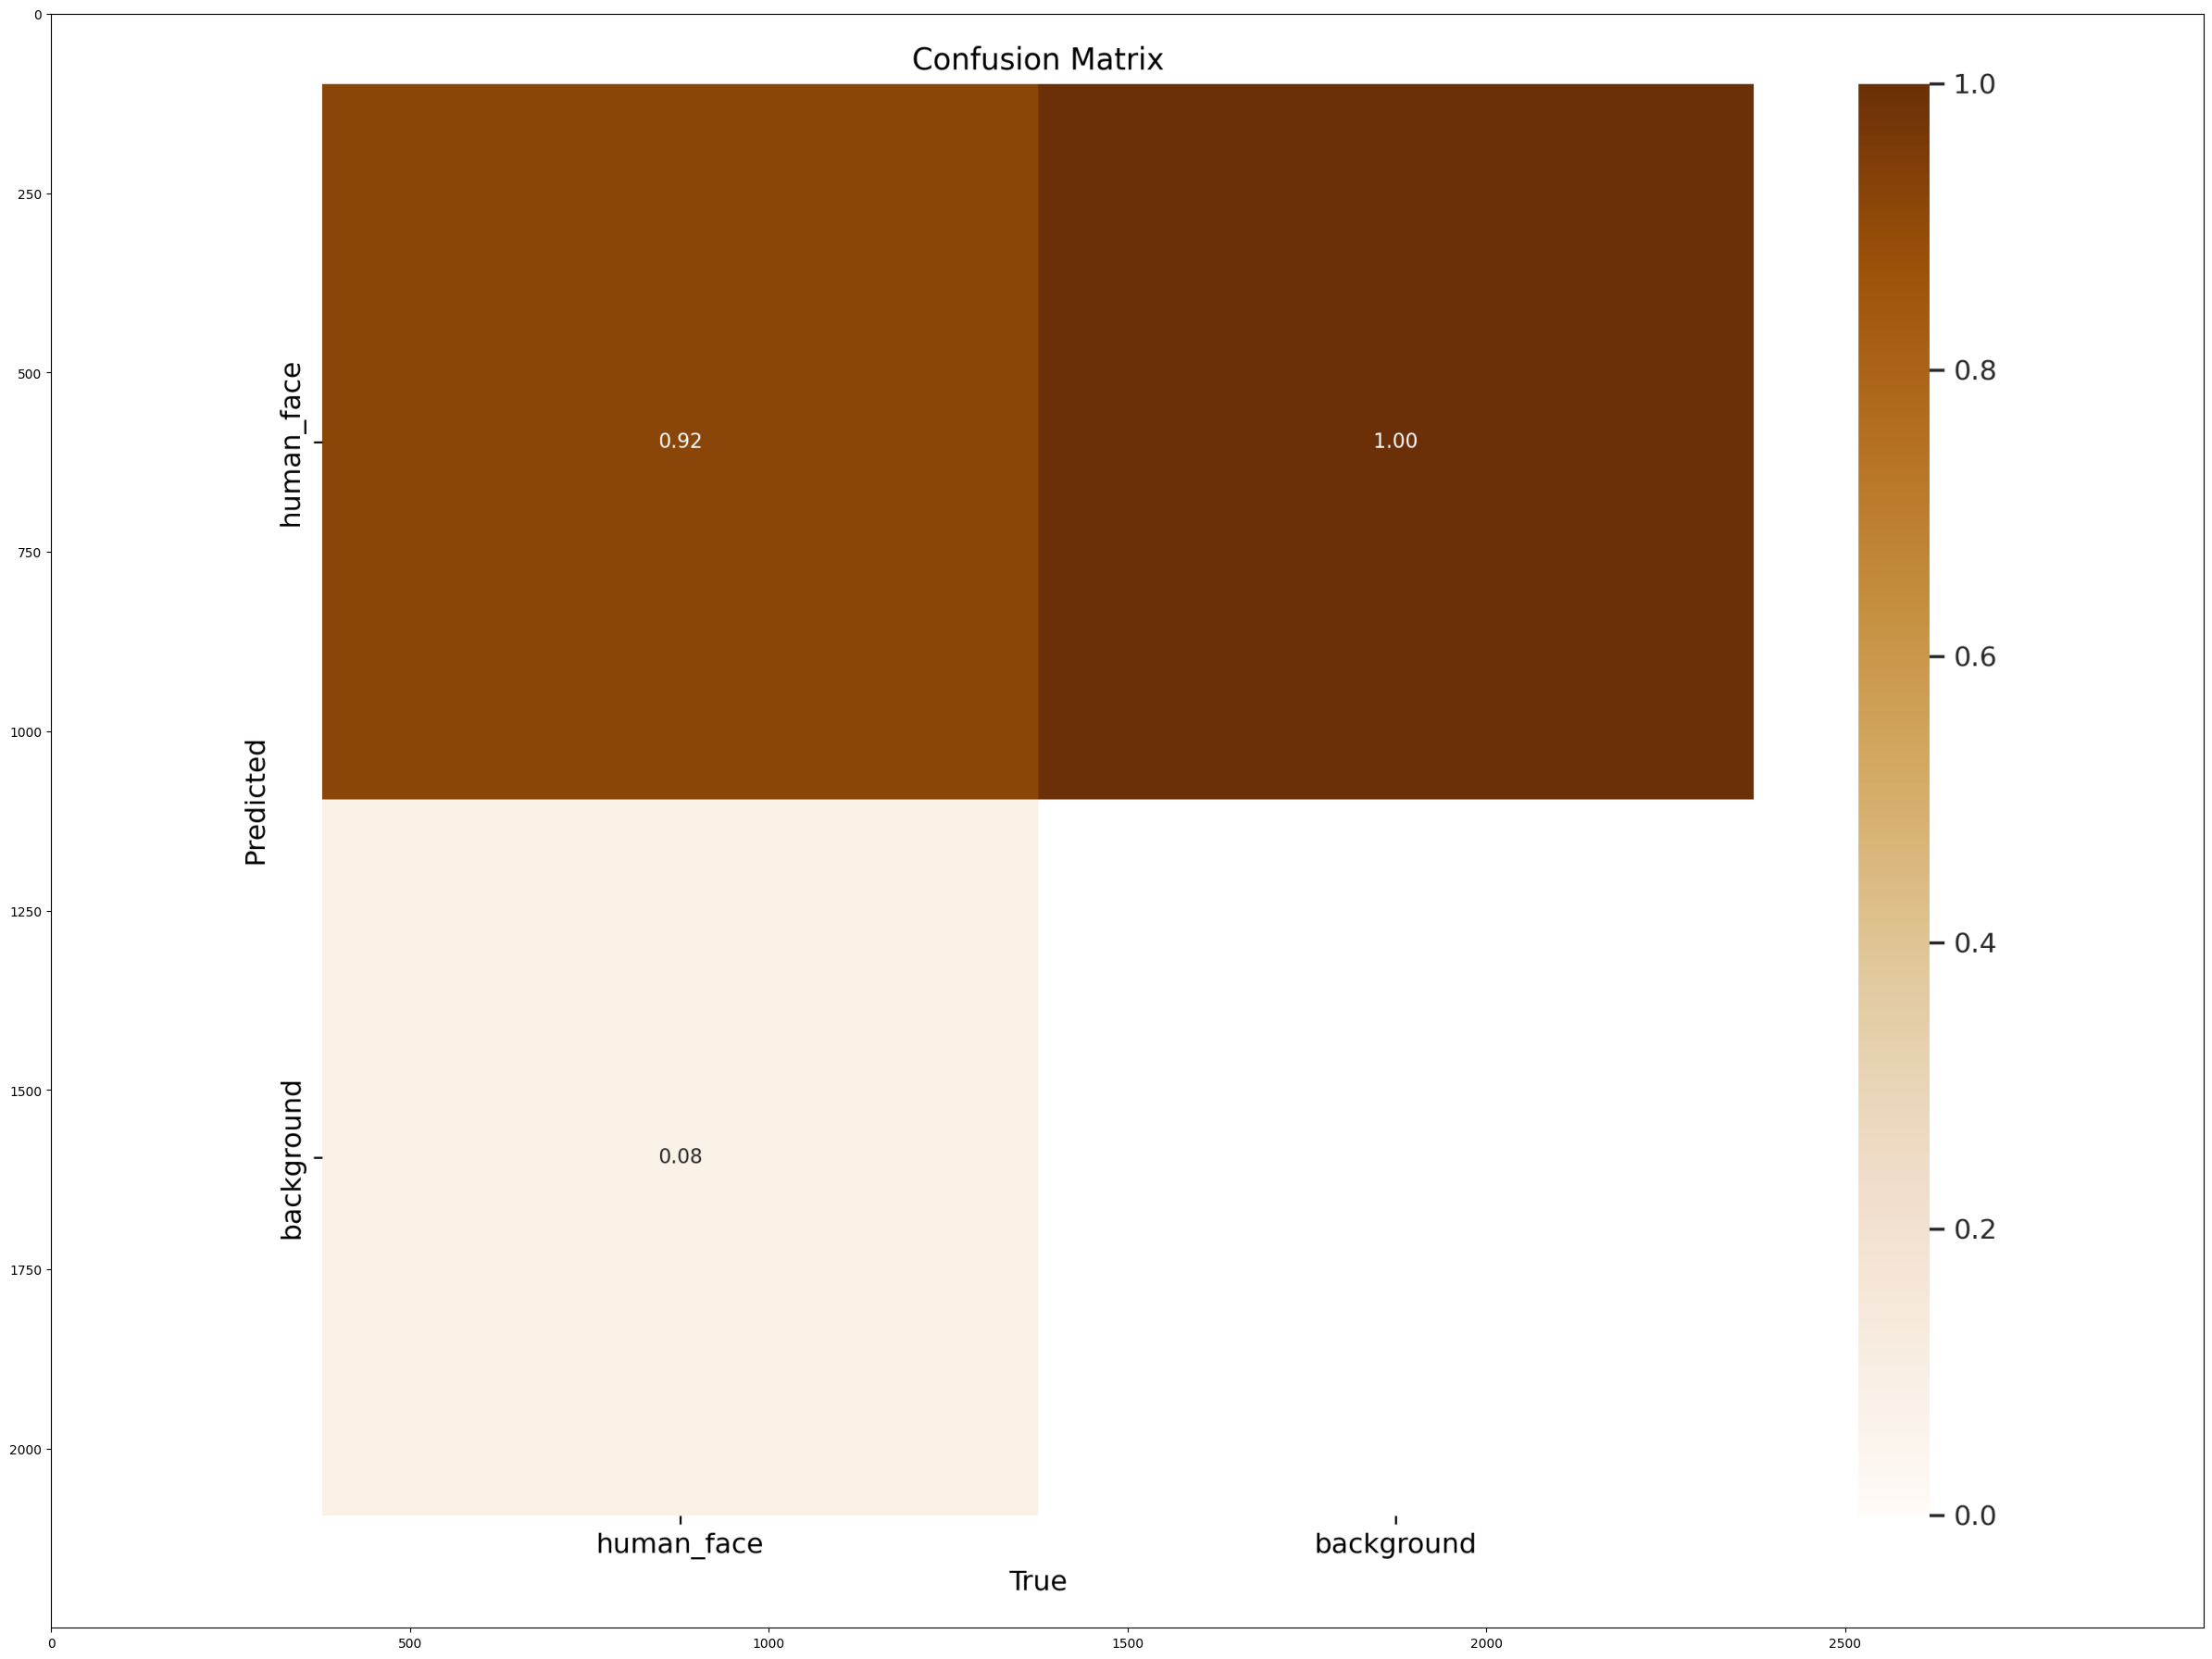

In [13]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp/confusion_matrix.png")
plt.imshow(results_png)

F1 curve

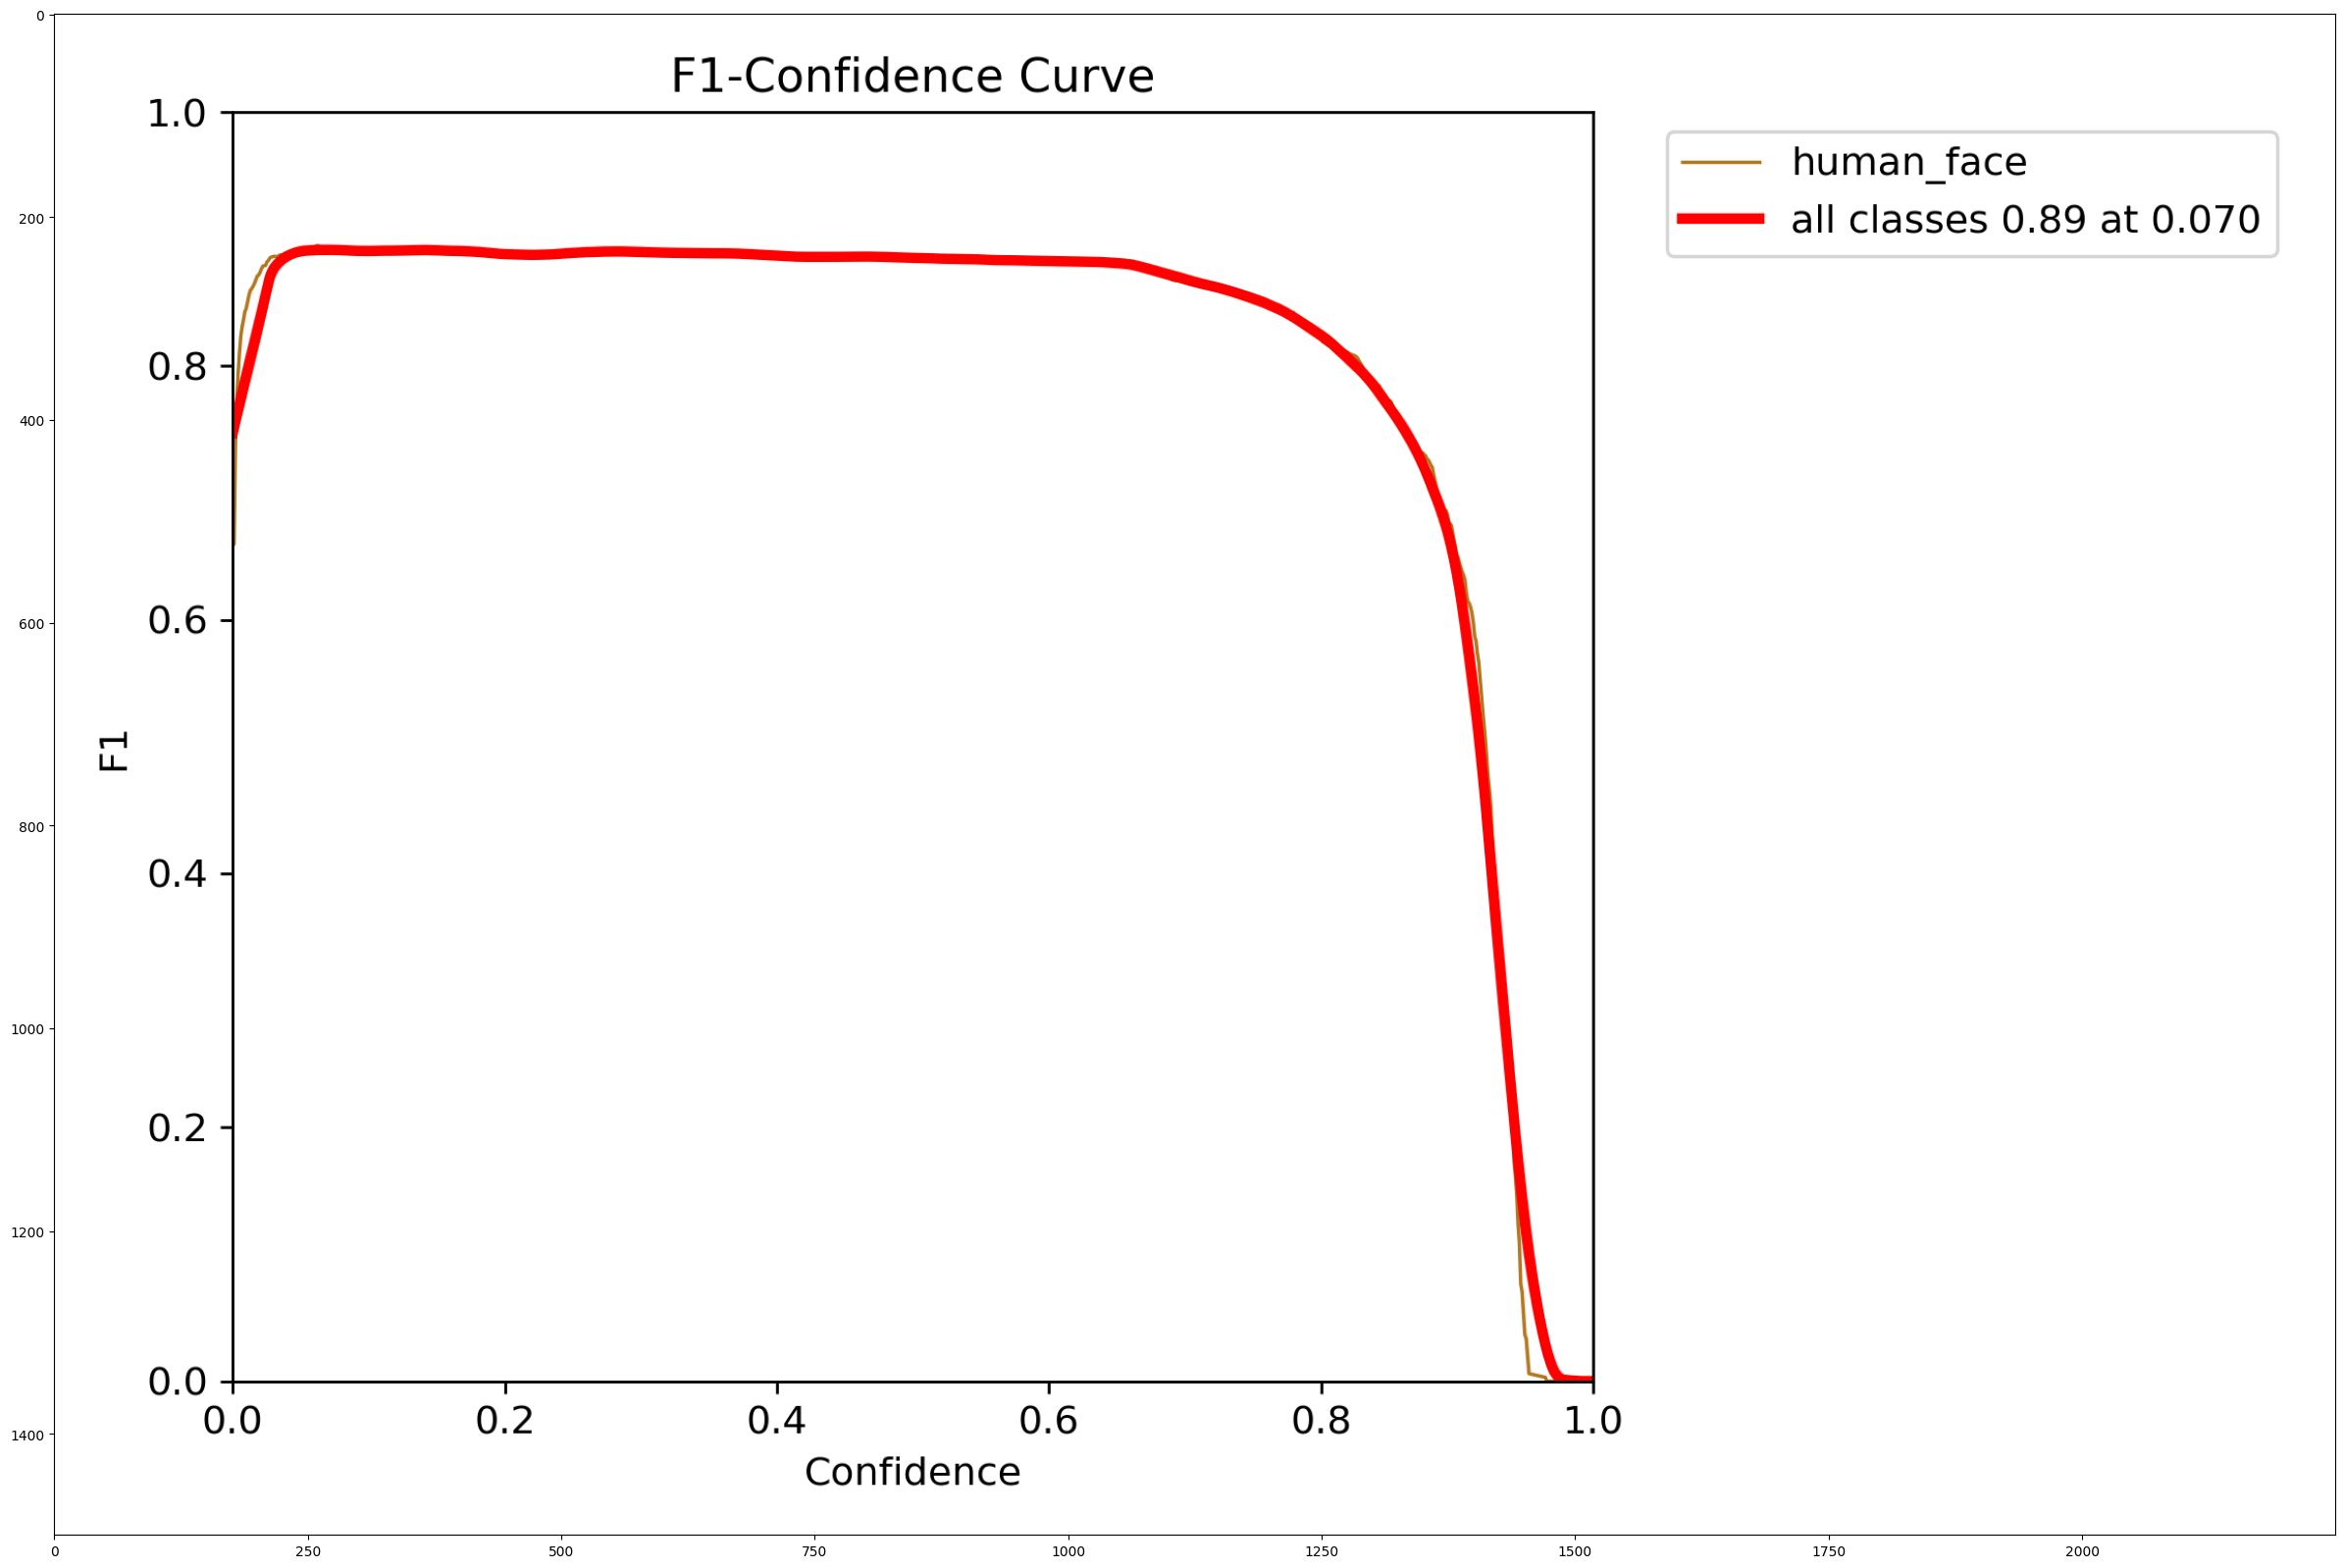

In [14]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp/F1_curve.png")
plt.imshow(results_png)

Precision - Recall curve

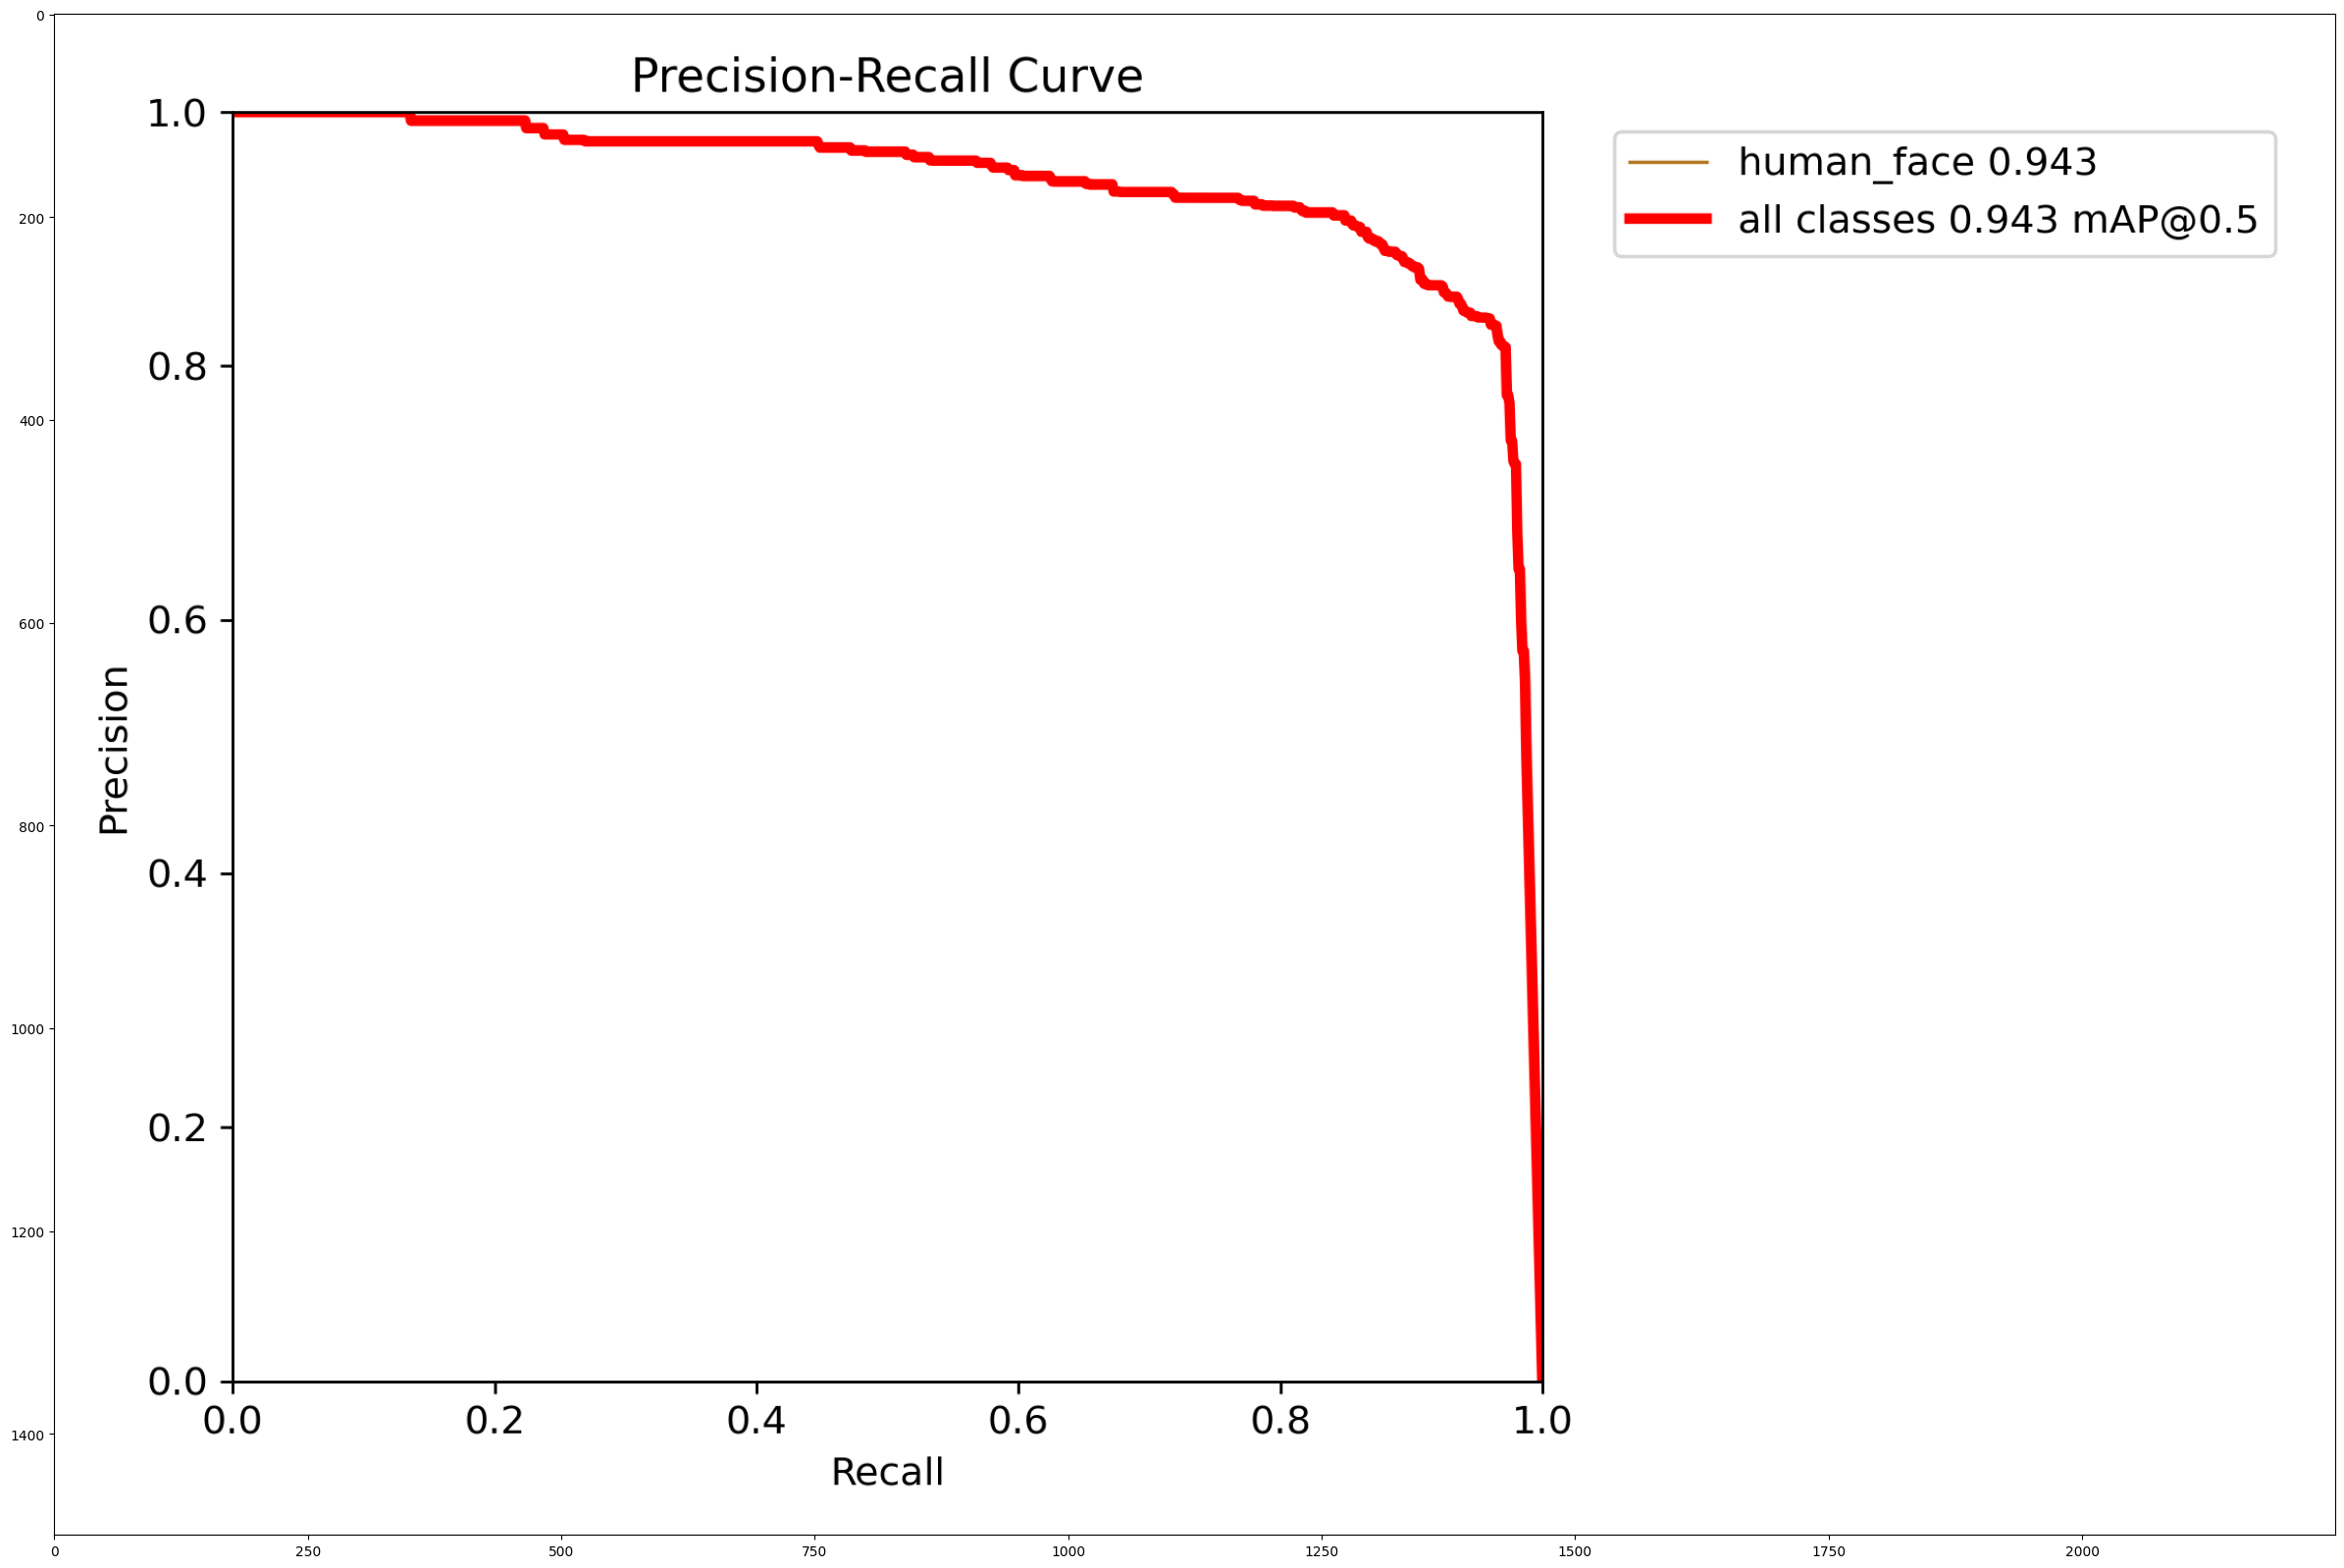

In [15]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp/PR_curve.png")
plt.imshow(results_png)

Precision - Confidence curve

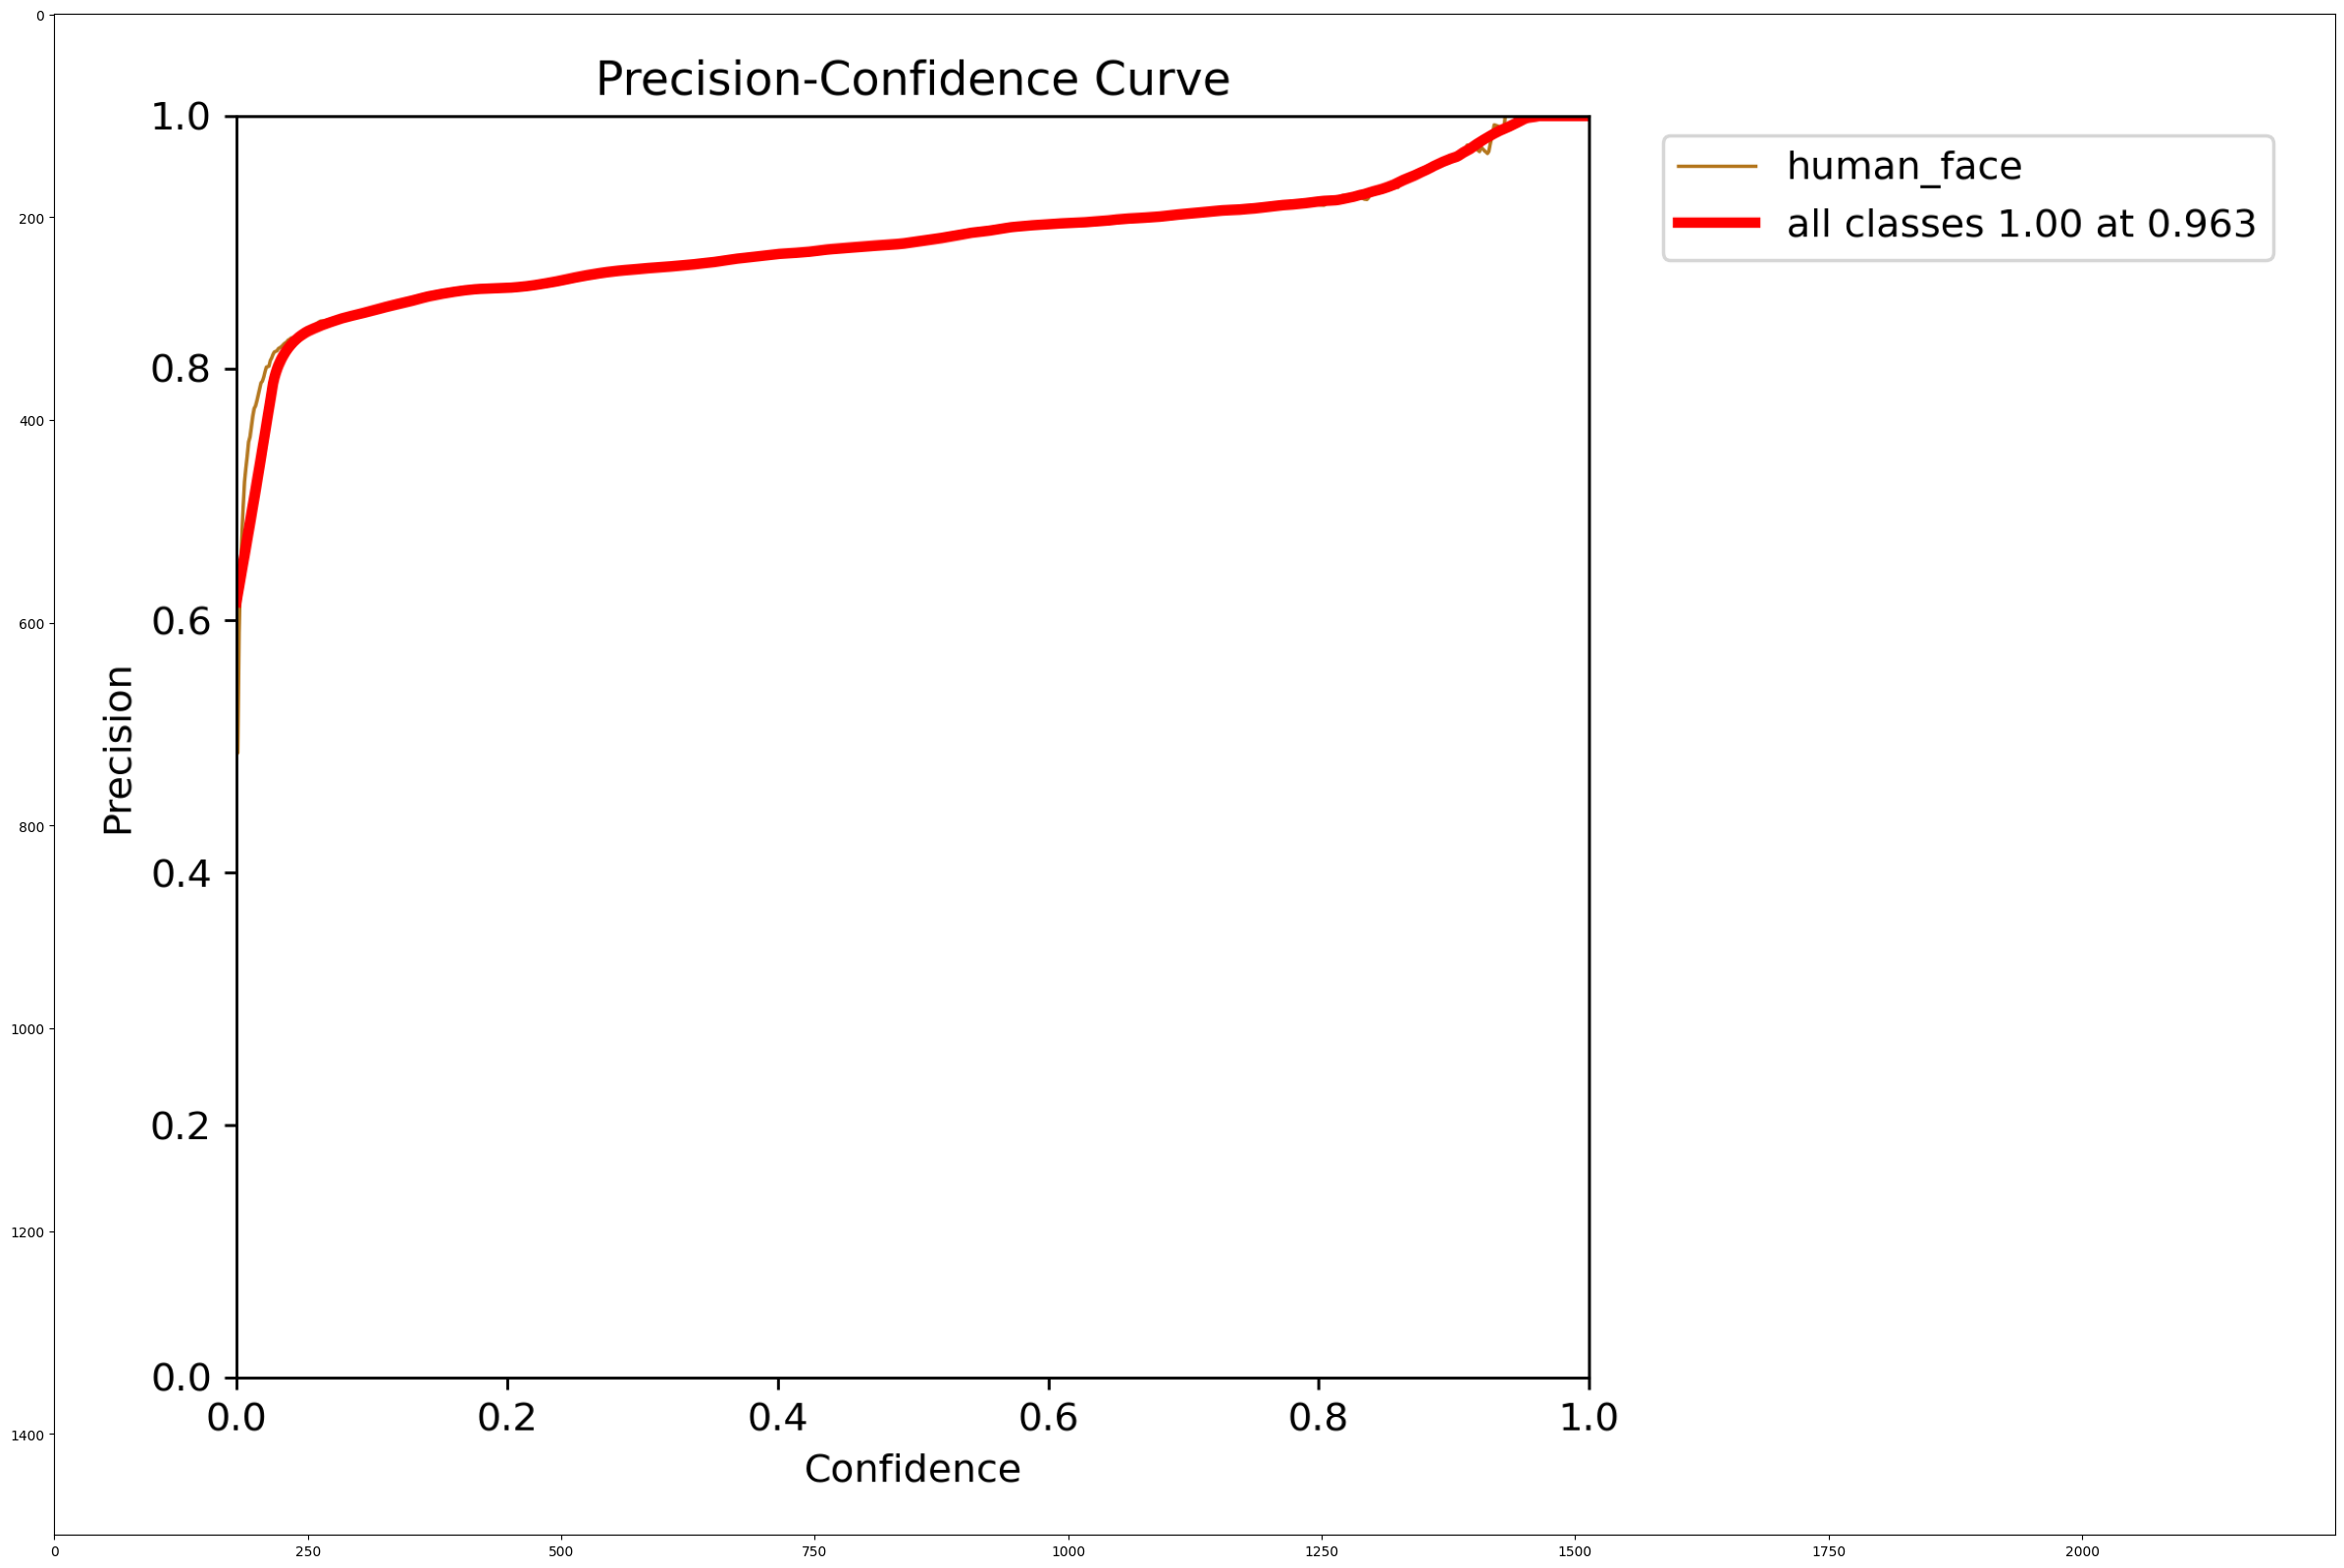

In [16]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp/P_curve.png")
plt.imshow(results_png)

Recall - Confidence curve

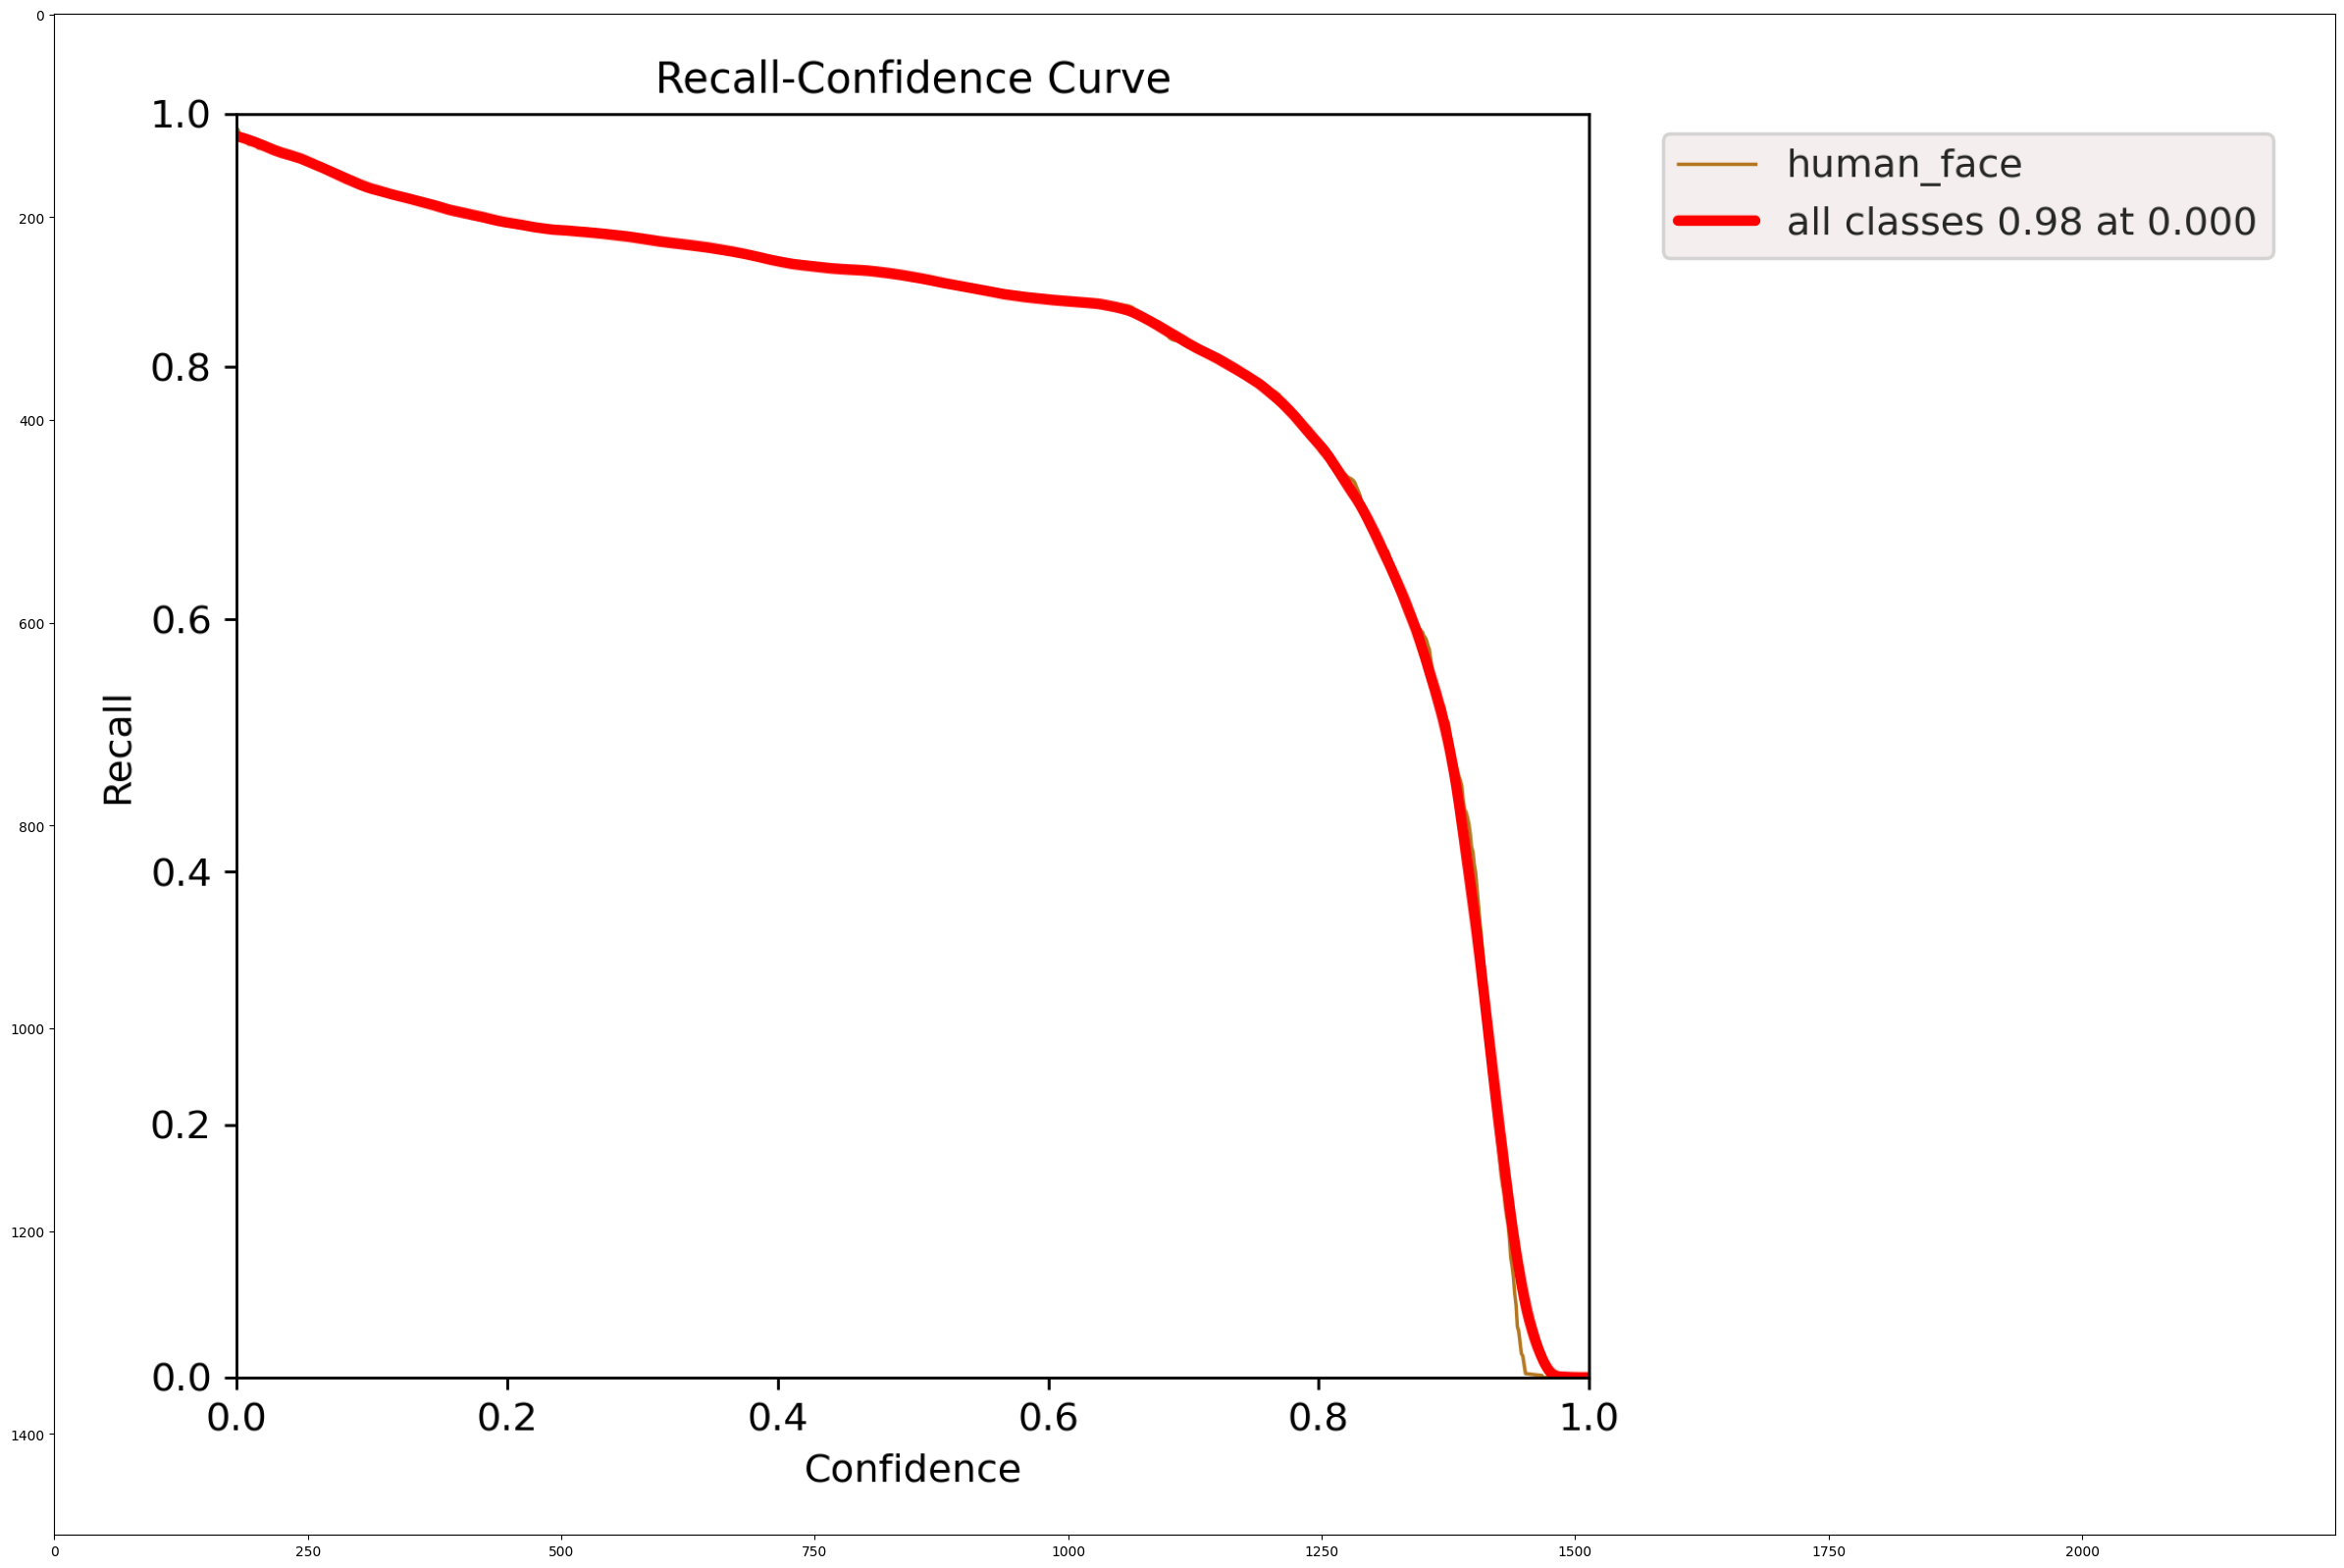

In [17]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp/R_curve.png")
plt.imshow(results_png)

## Second training

### Training

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data face_detection_data.yaml --weights runs/train/exp/weights/best.pt --cache

2023-11-12 09:07:35.837223: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 09:07:35.837287: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 09:07:35.837328: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=runs/train/exp/weights/best.pt, cfg=, data=face_detection_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, s

### Validation

In [ ]:
!python val.py --img 640 --weights runs/train/exp2/weights/best.pt --data face_detection_data.yaml

val: data=/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/data/face_detection_data.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/labels/val.cache... 463 images, 0 backgrounds, 0 corrupt: 100% 463/463 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 15/15 [00:18<00:00,  1.26s/it]
                   all        463        665      0.845      0.949      0.931      0.657
Speed: 0.5

### Testing

In [8]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.4 --source '/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/'

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000018.jpg: 448x640 1 human_face, 44.5ms
image 2/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000114.jpg: 640x448 1 human_face, 114.7ms
image 3/199 /con

### Results

Results

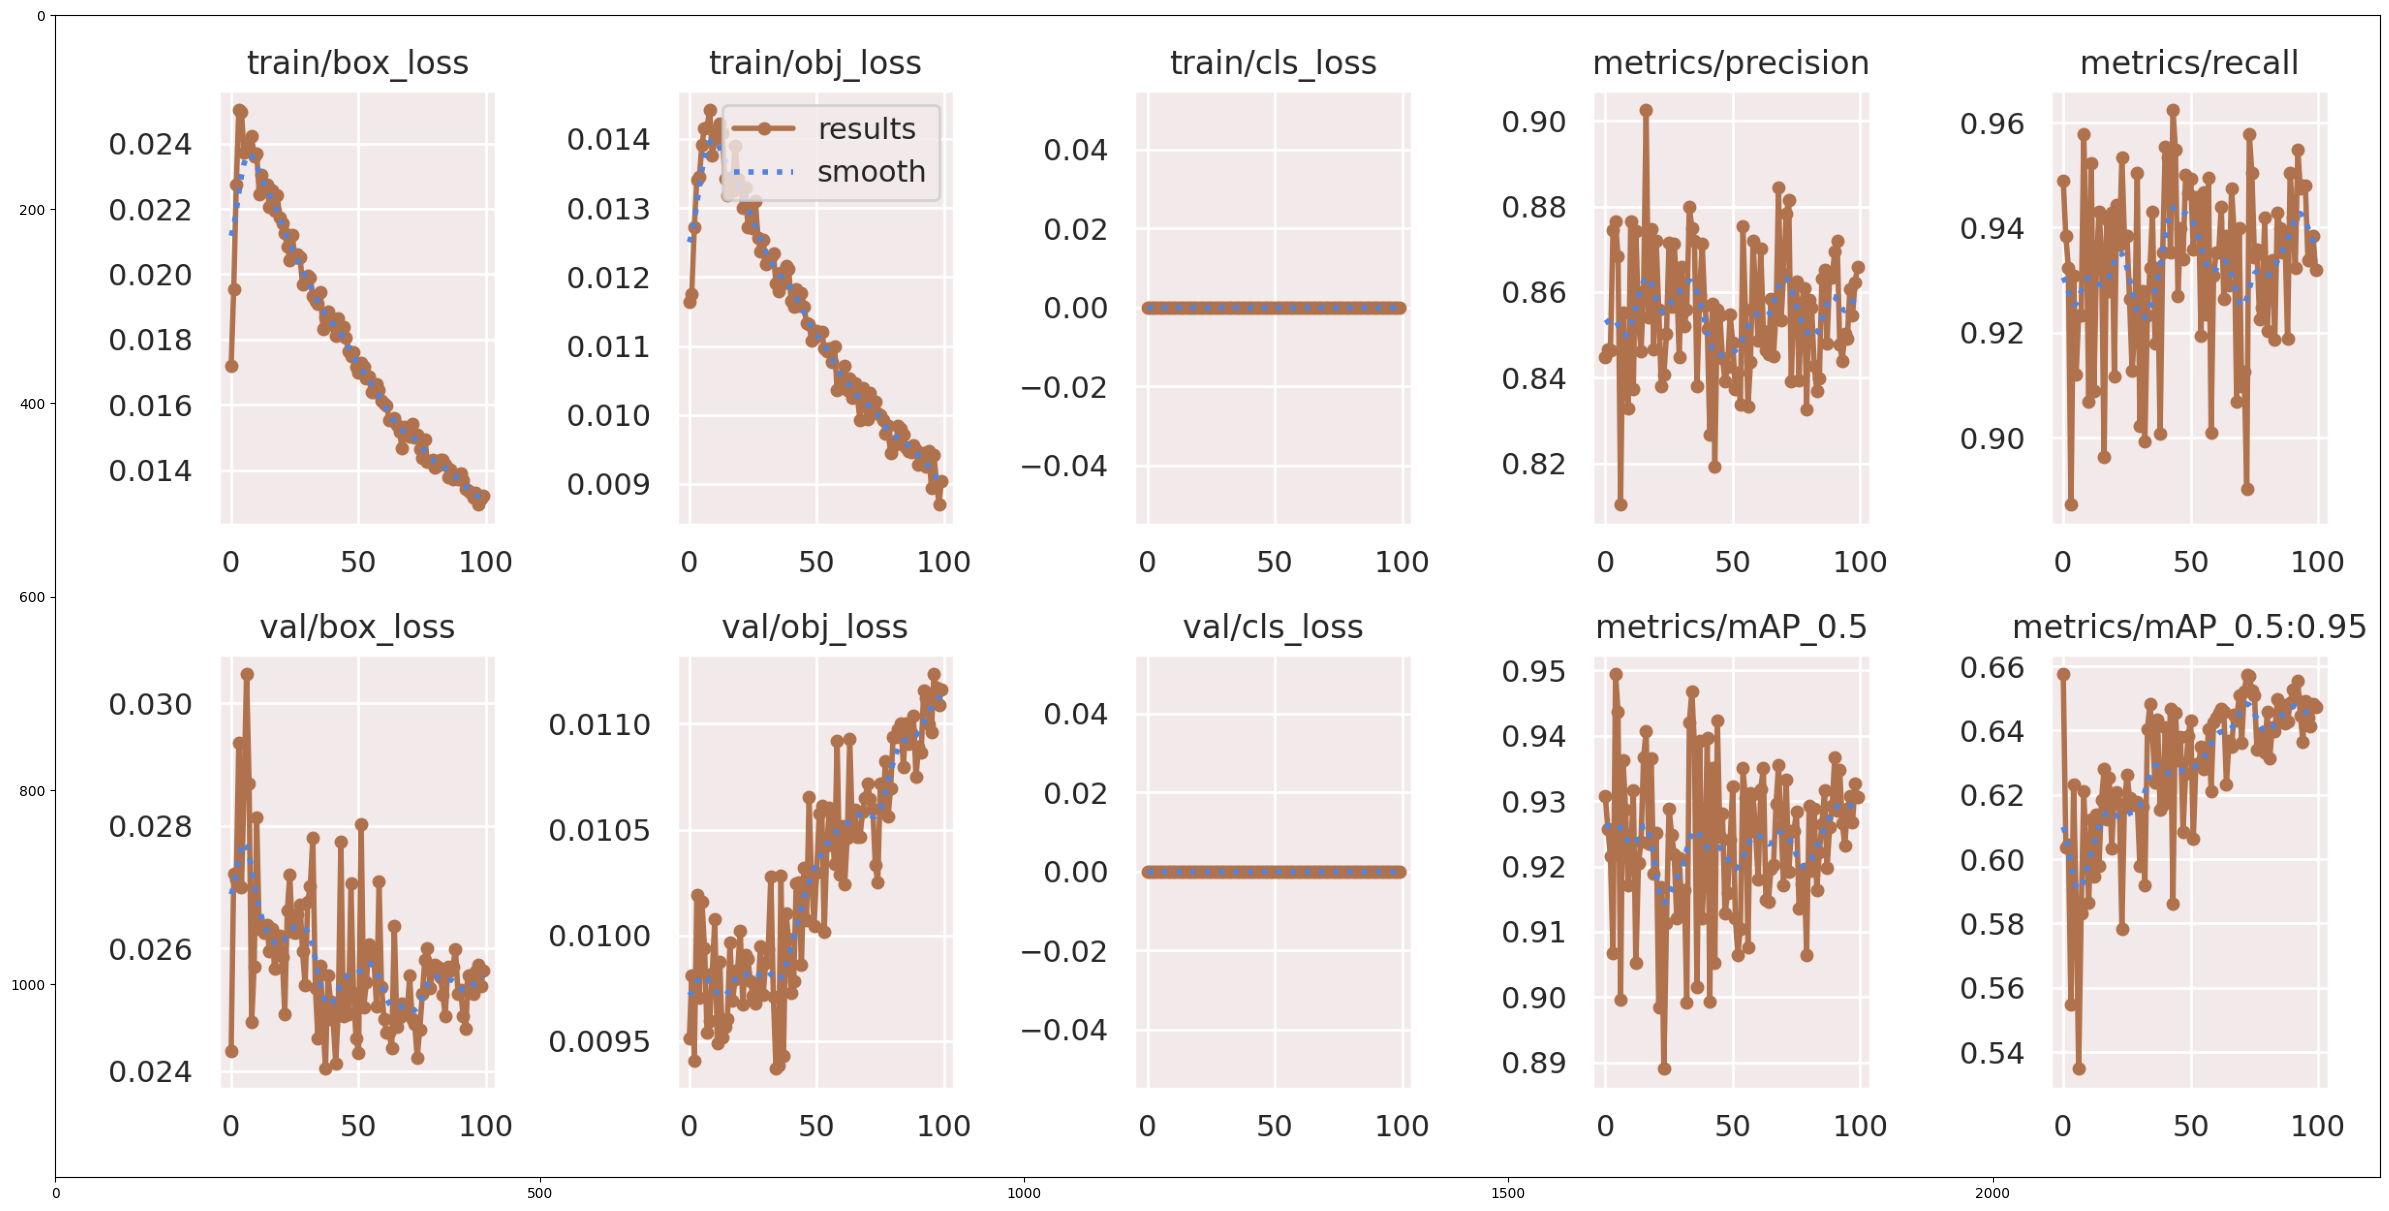

In [19]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/train/exp2/results.png")
plt.imshow(results_png)

Confusion matrix

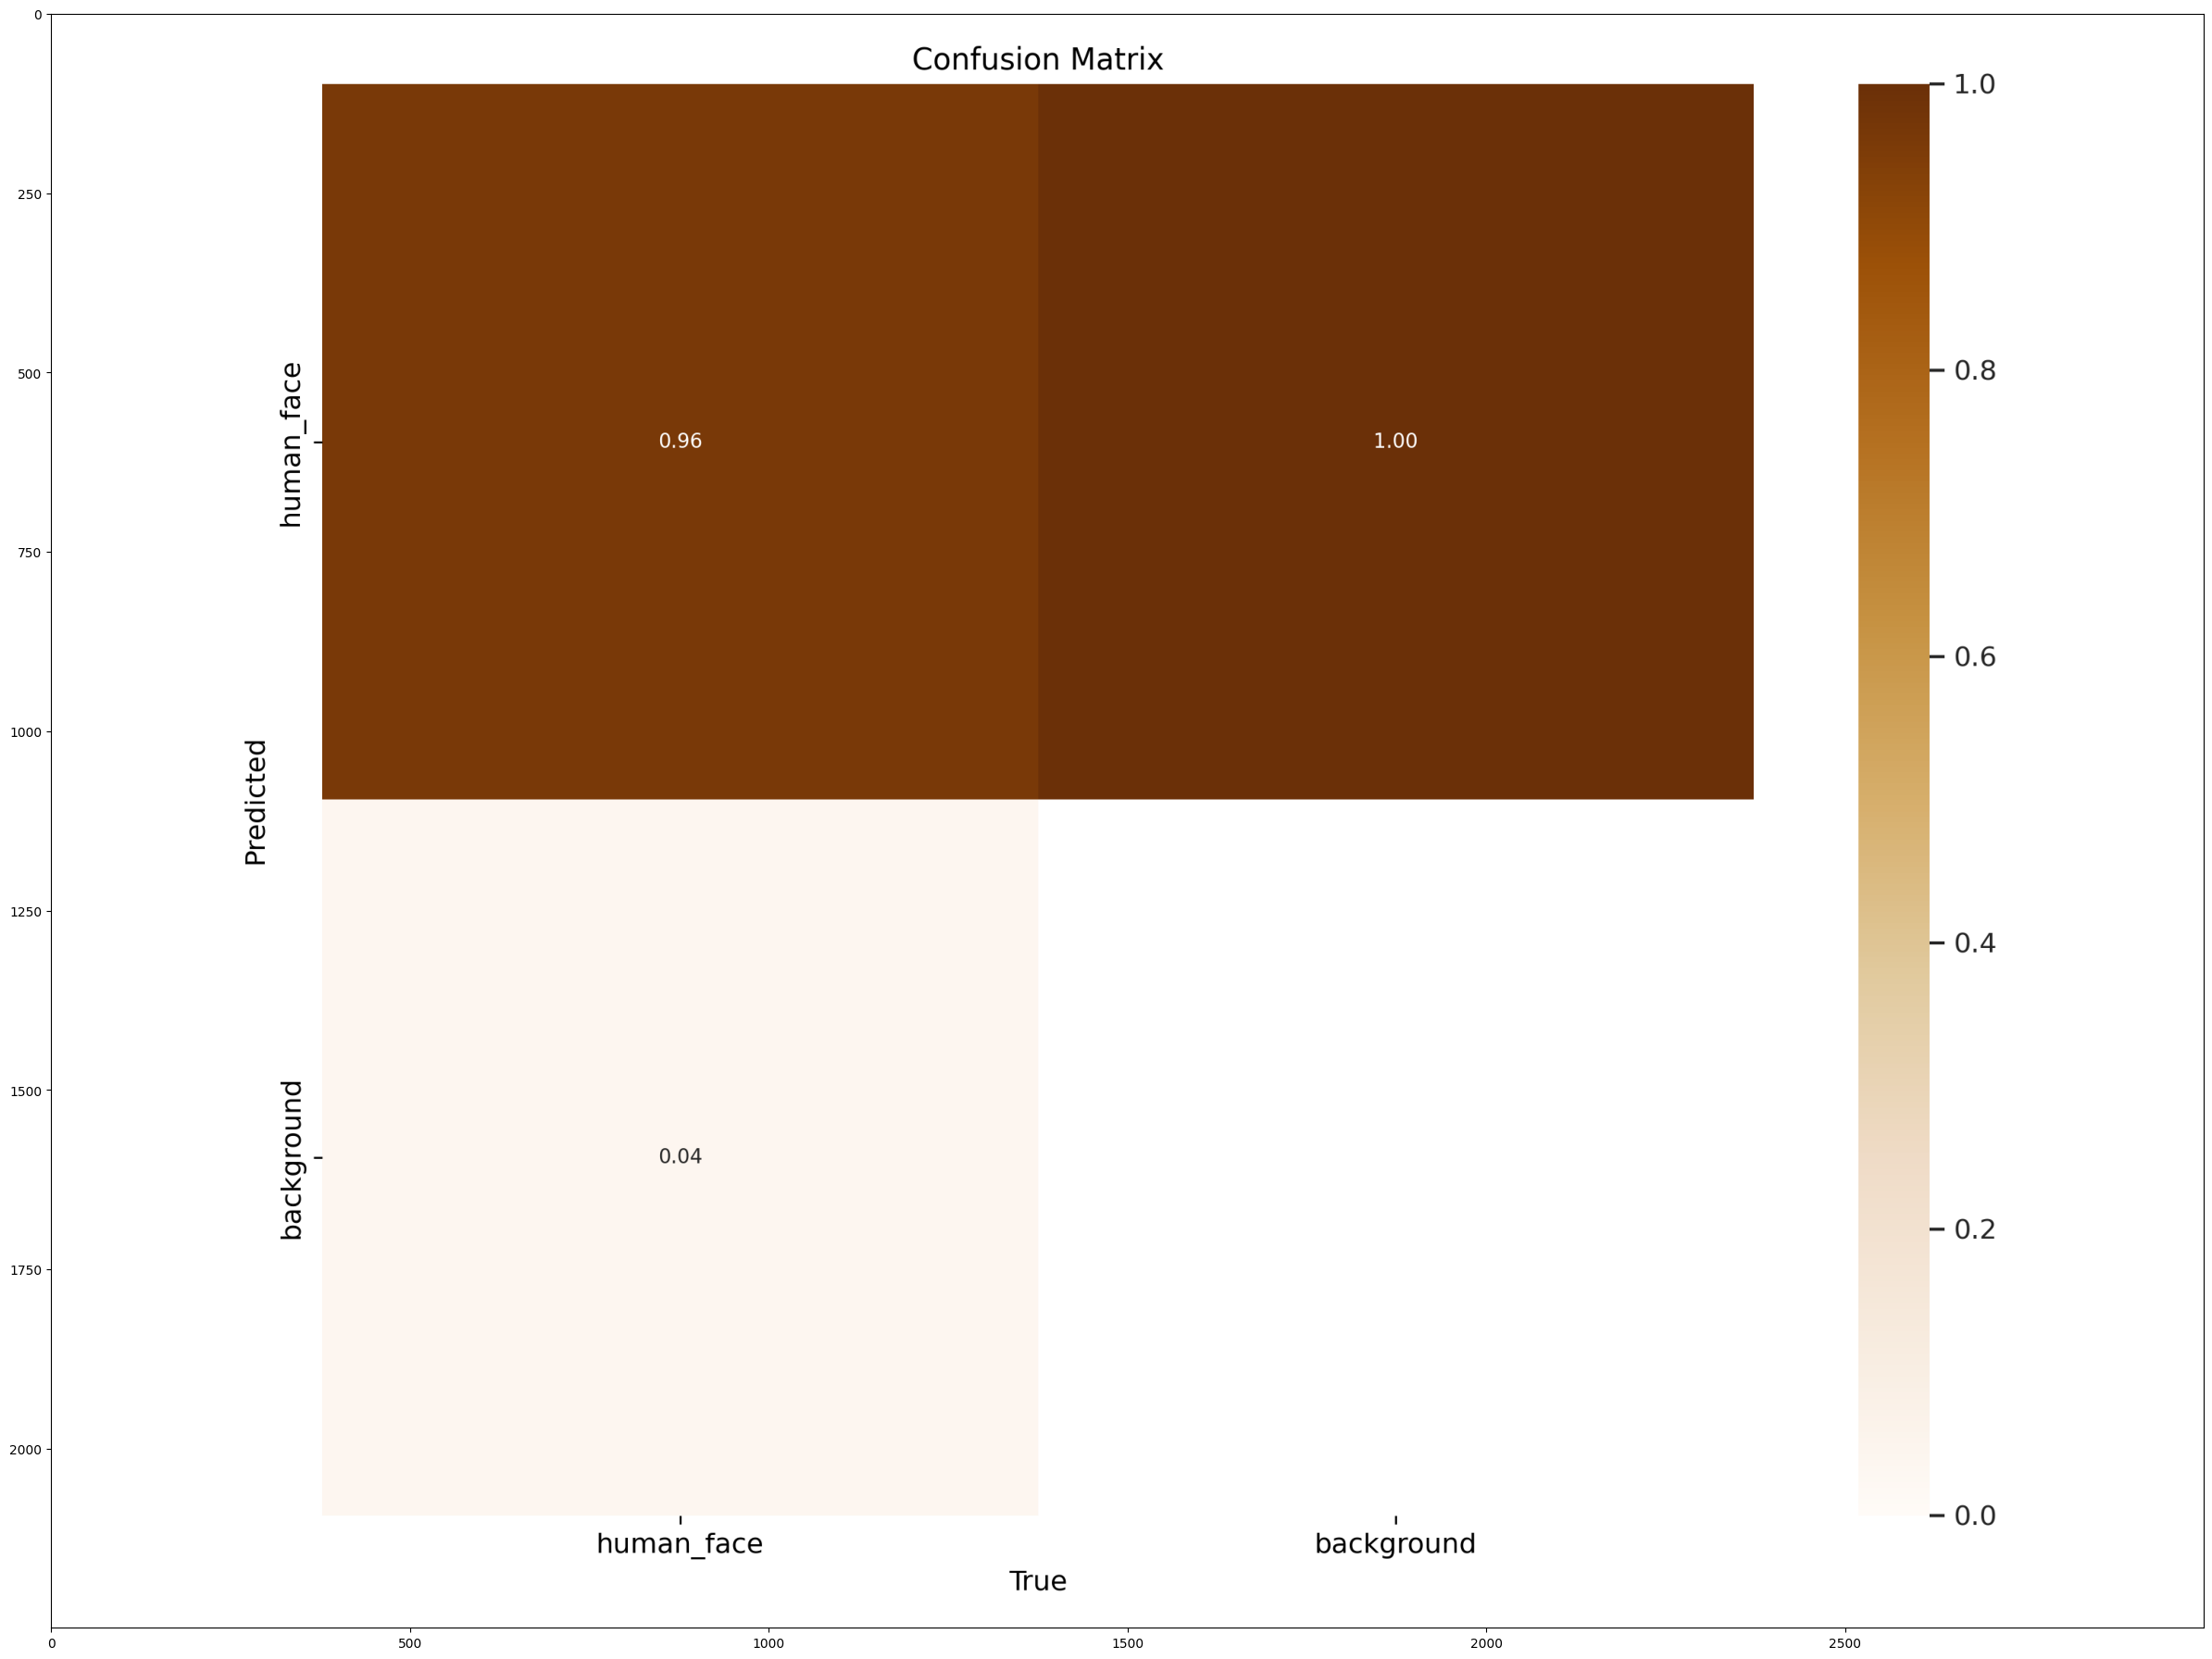

In [20]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp2/confusion_matrix.png")
plt.imshow(results_png)

F1 curve

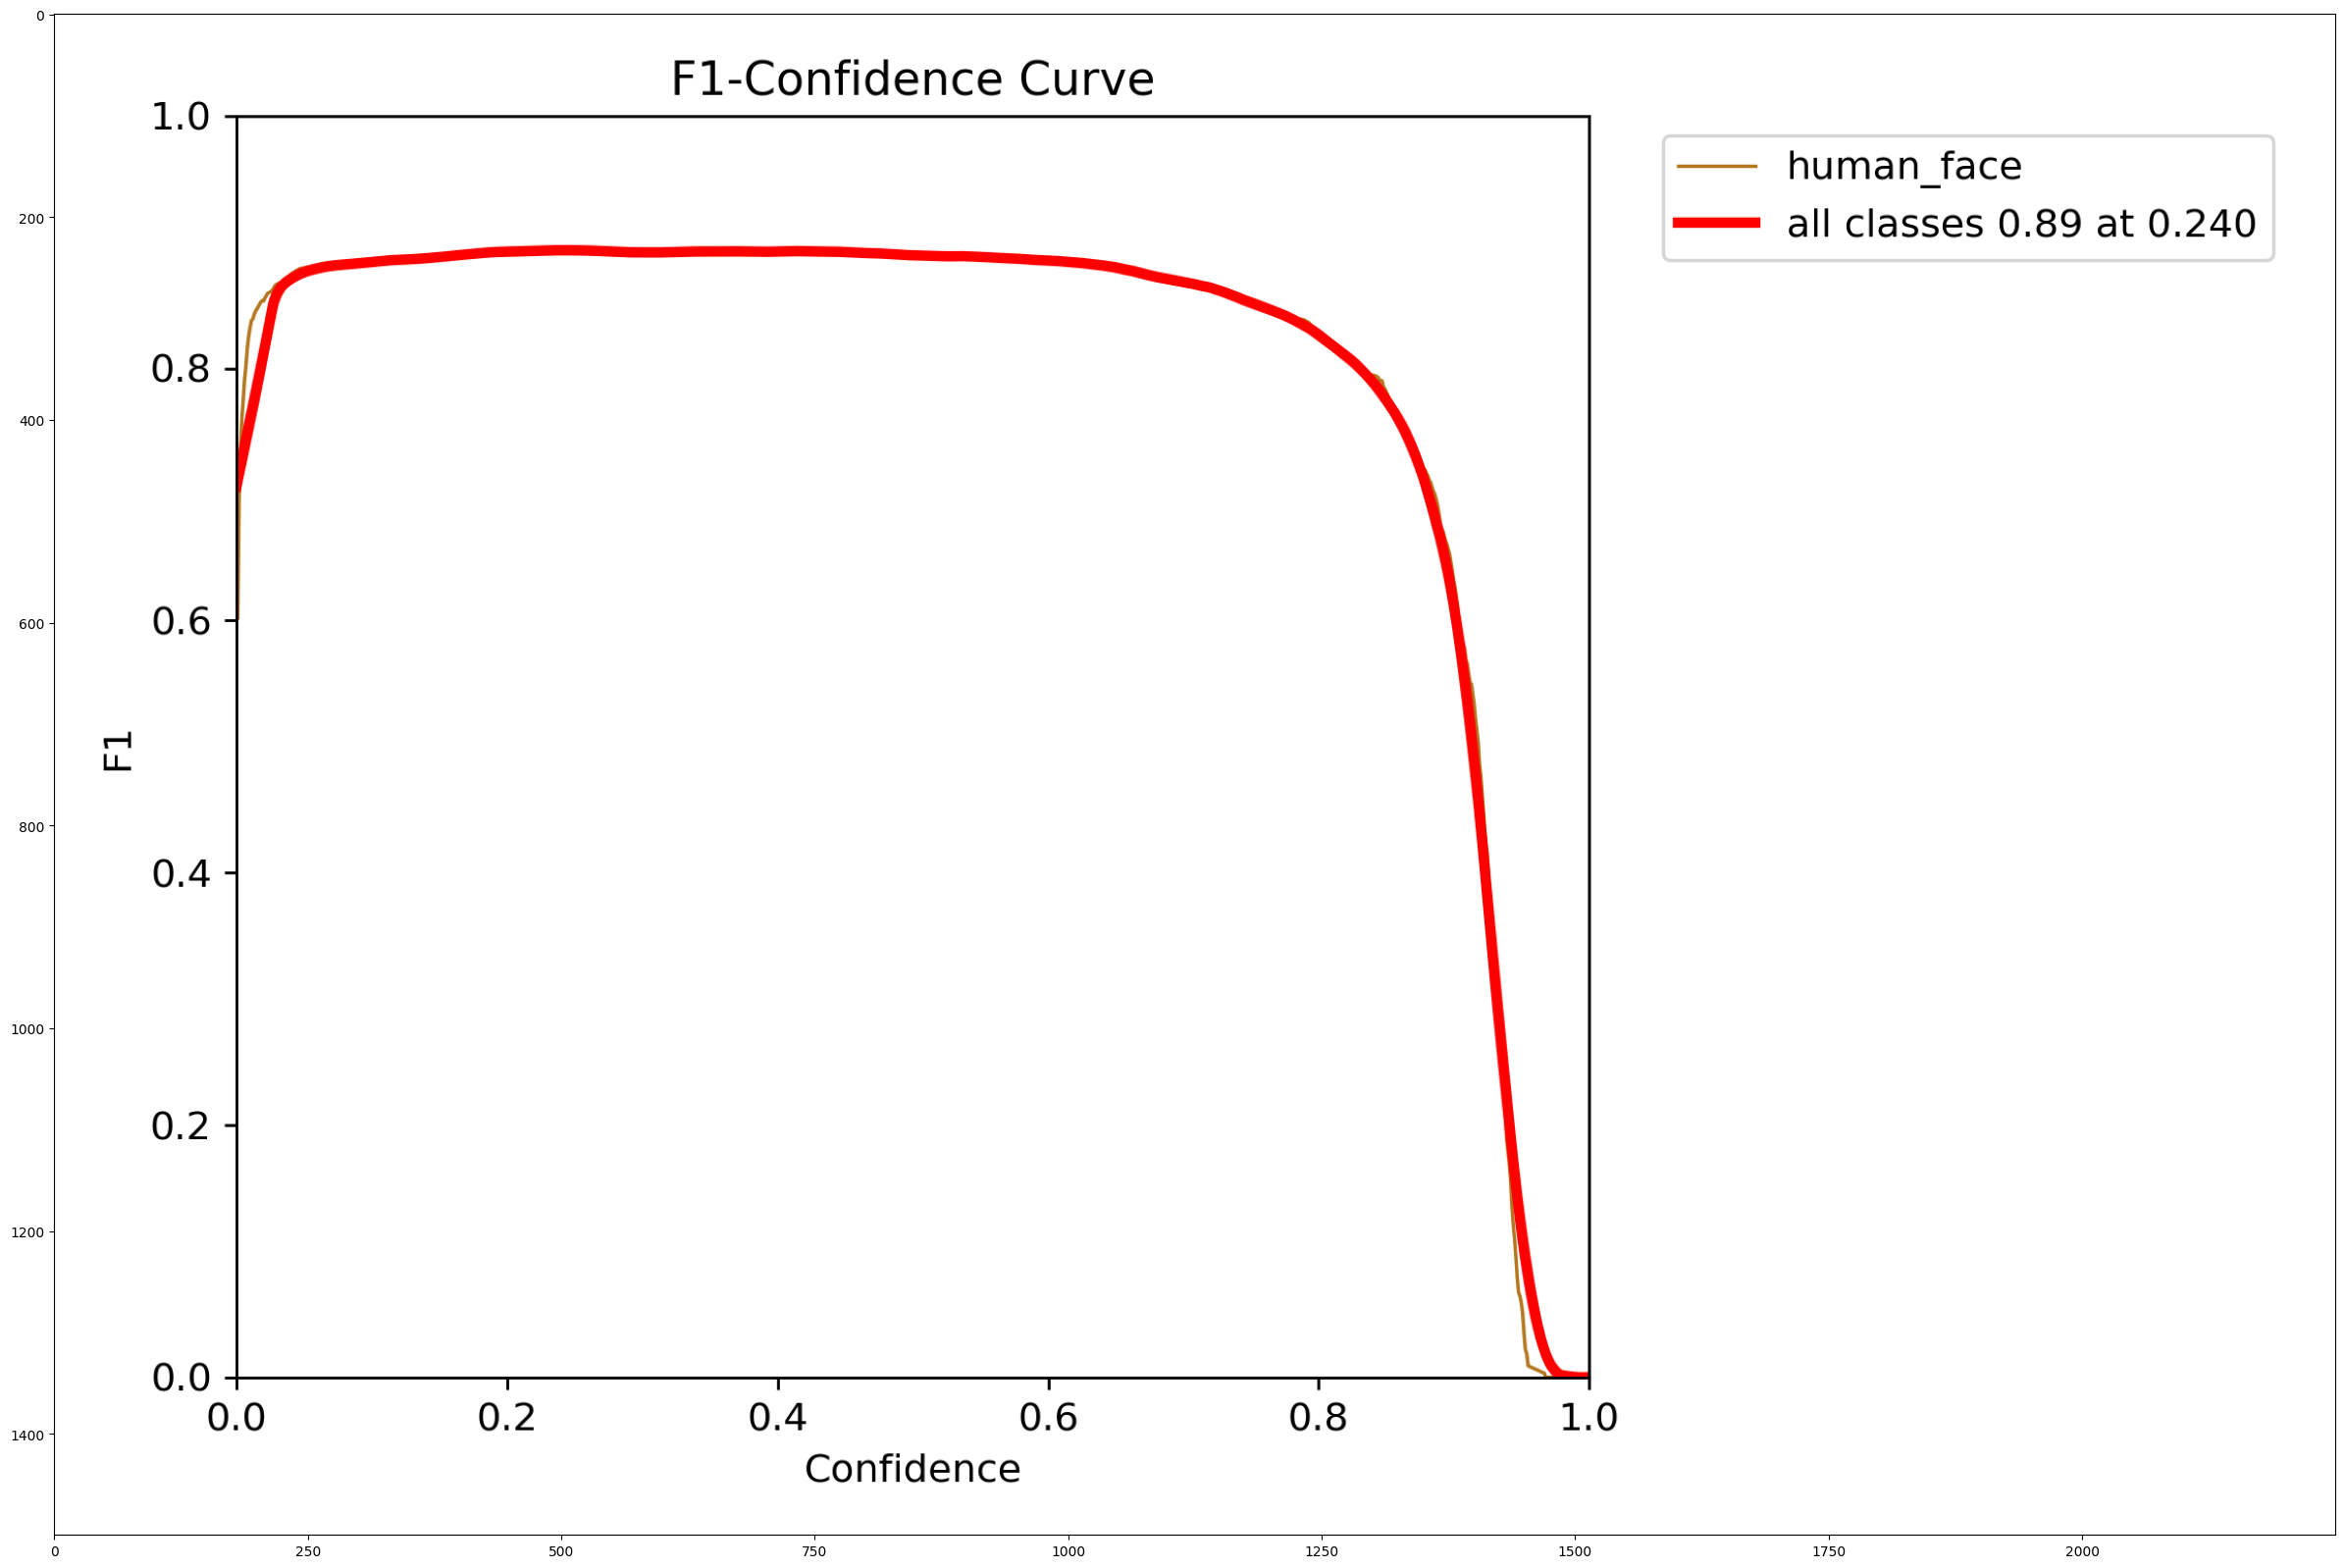

In [21]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp2/F1_curve.png")
plt.imshow(results_png)

Precision - Recall curve

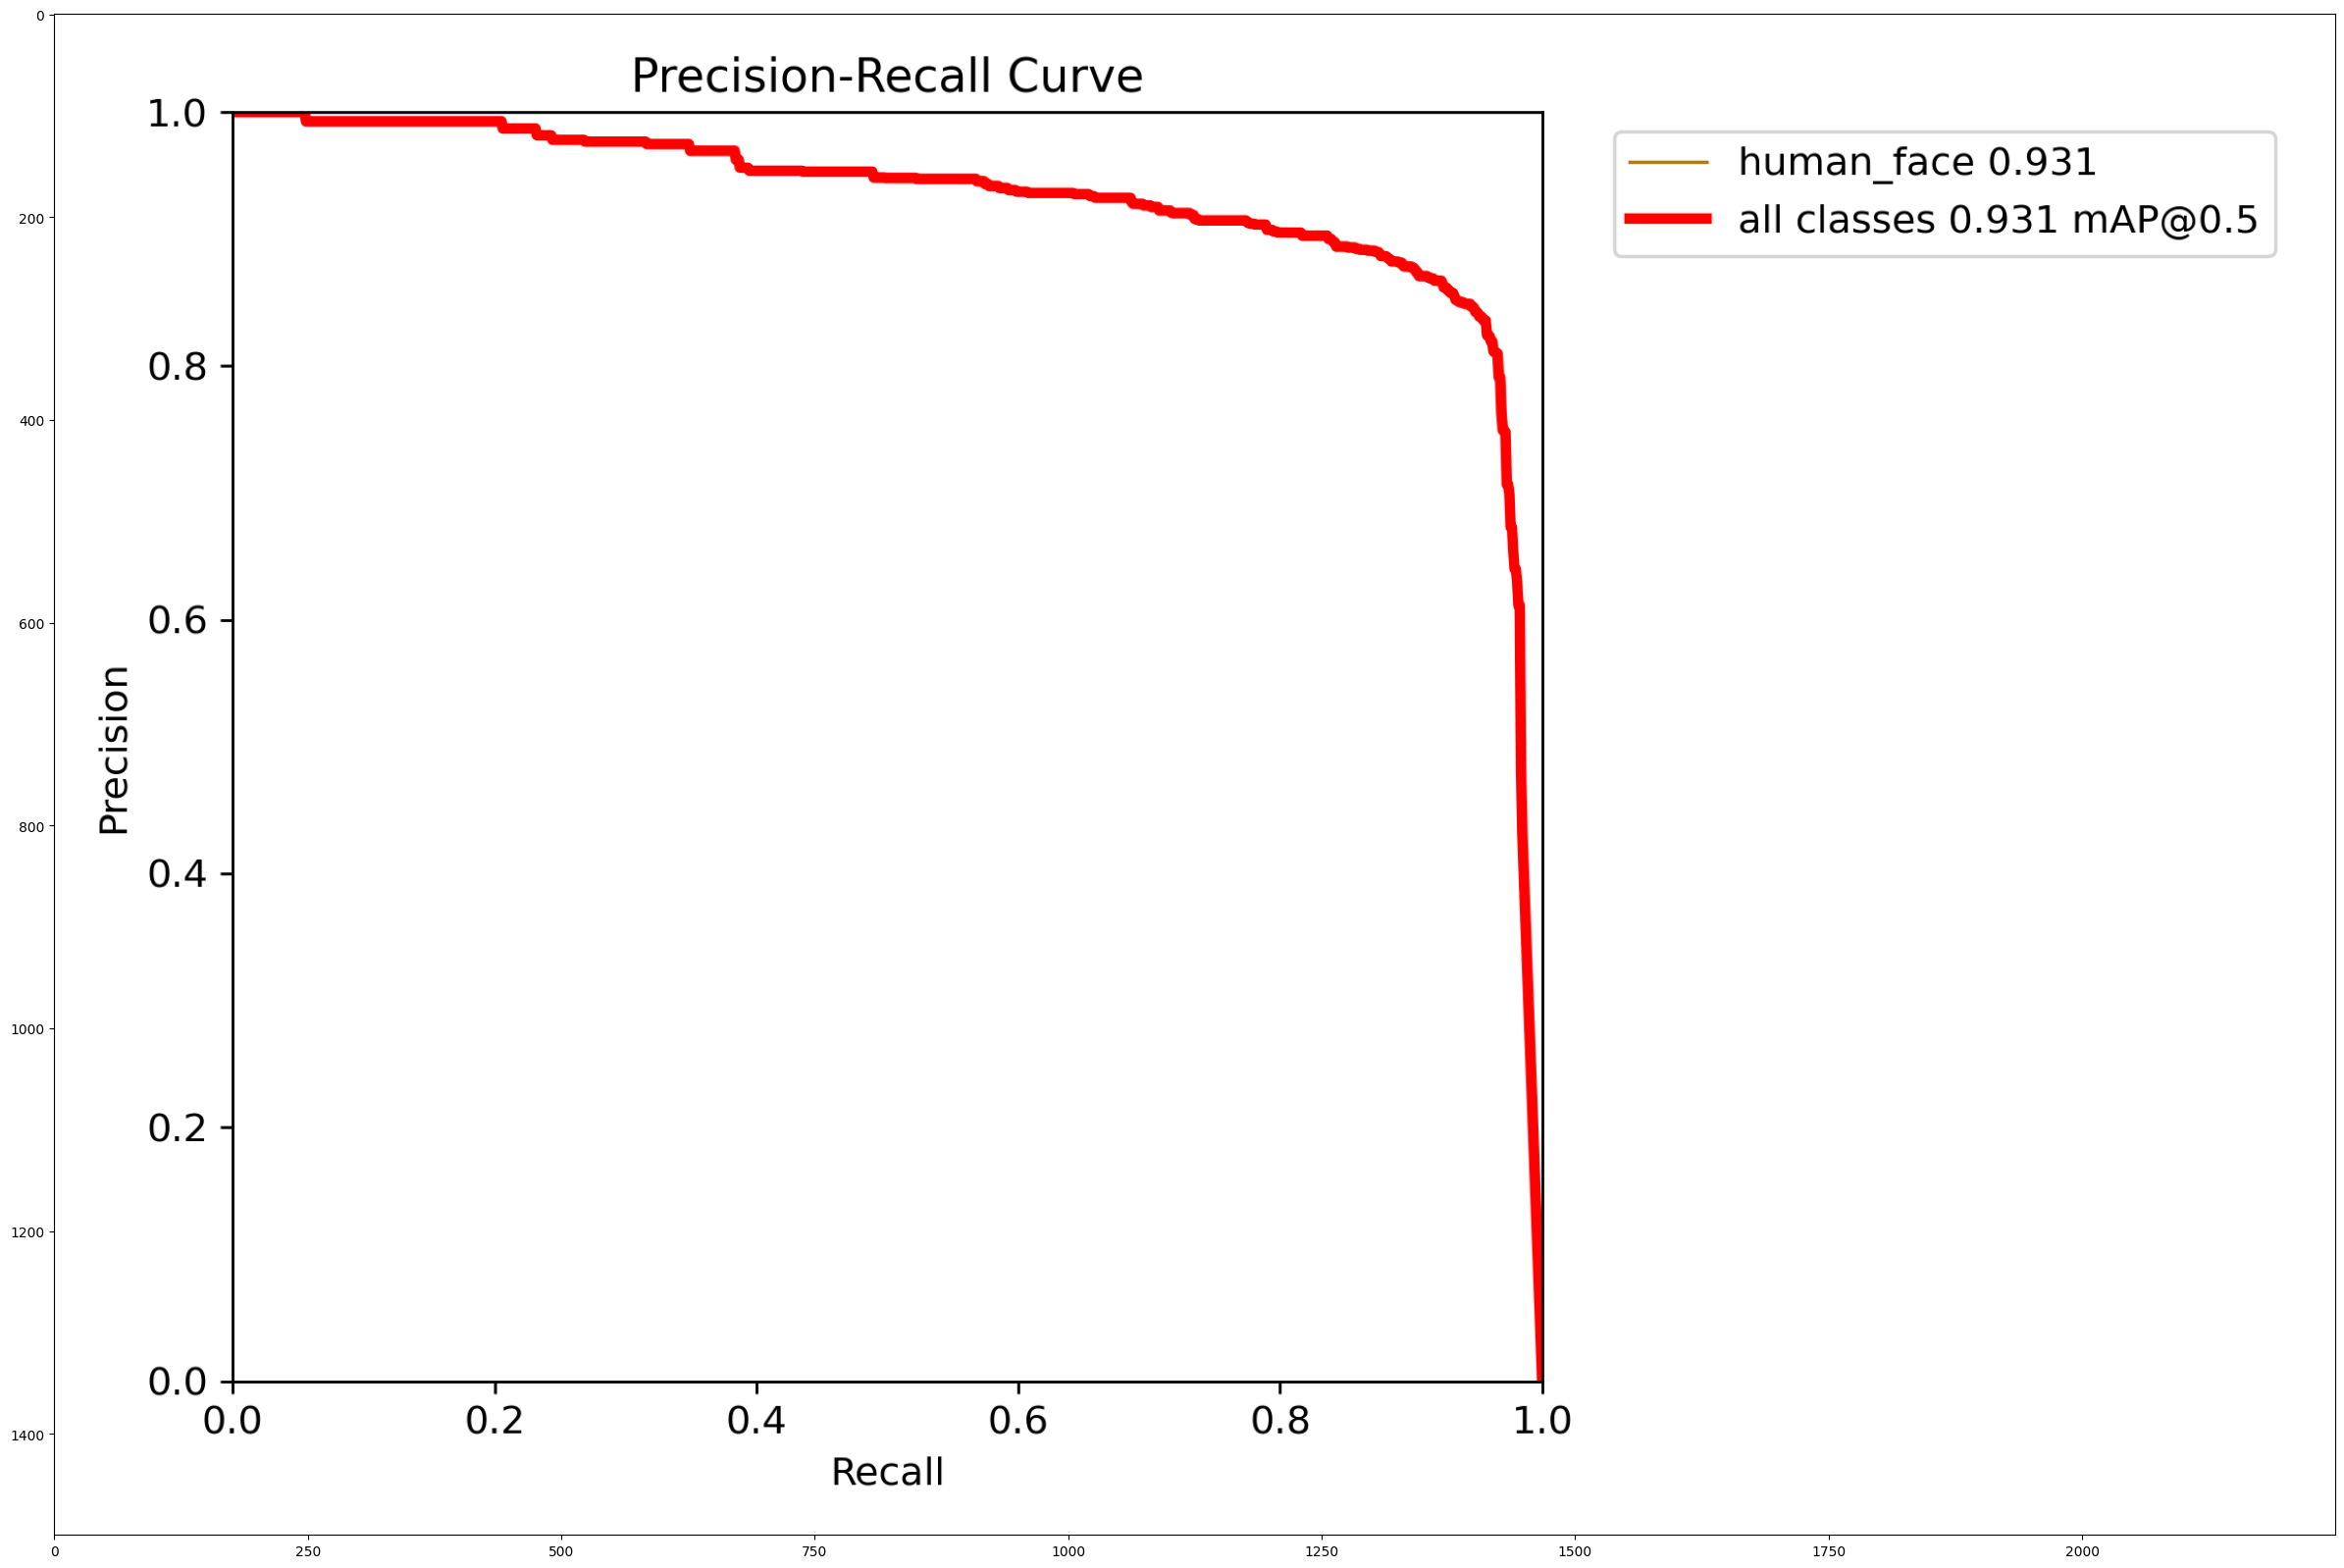

In [22]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp2/PR_curve.png")
plt.imshow(results_png)

Precision - Confidence curve

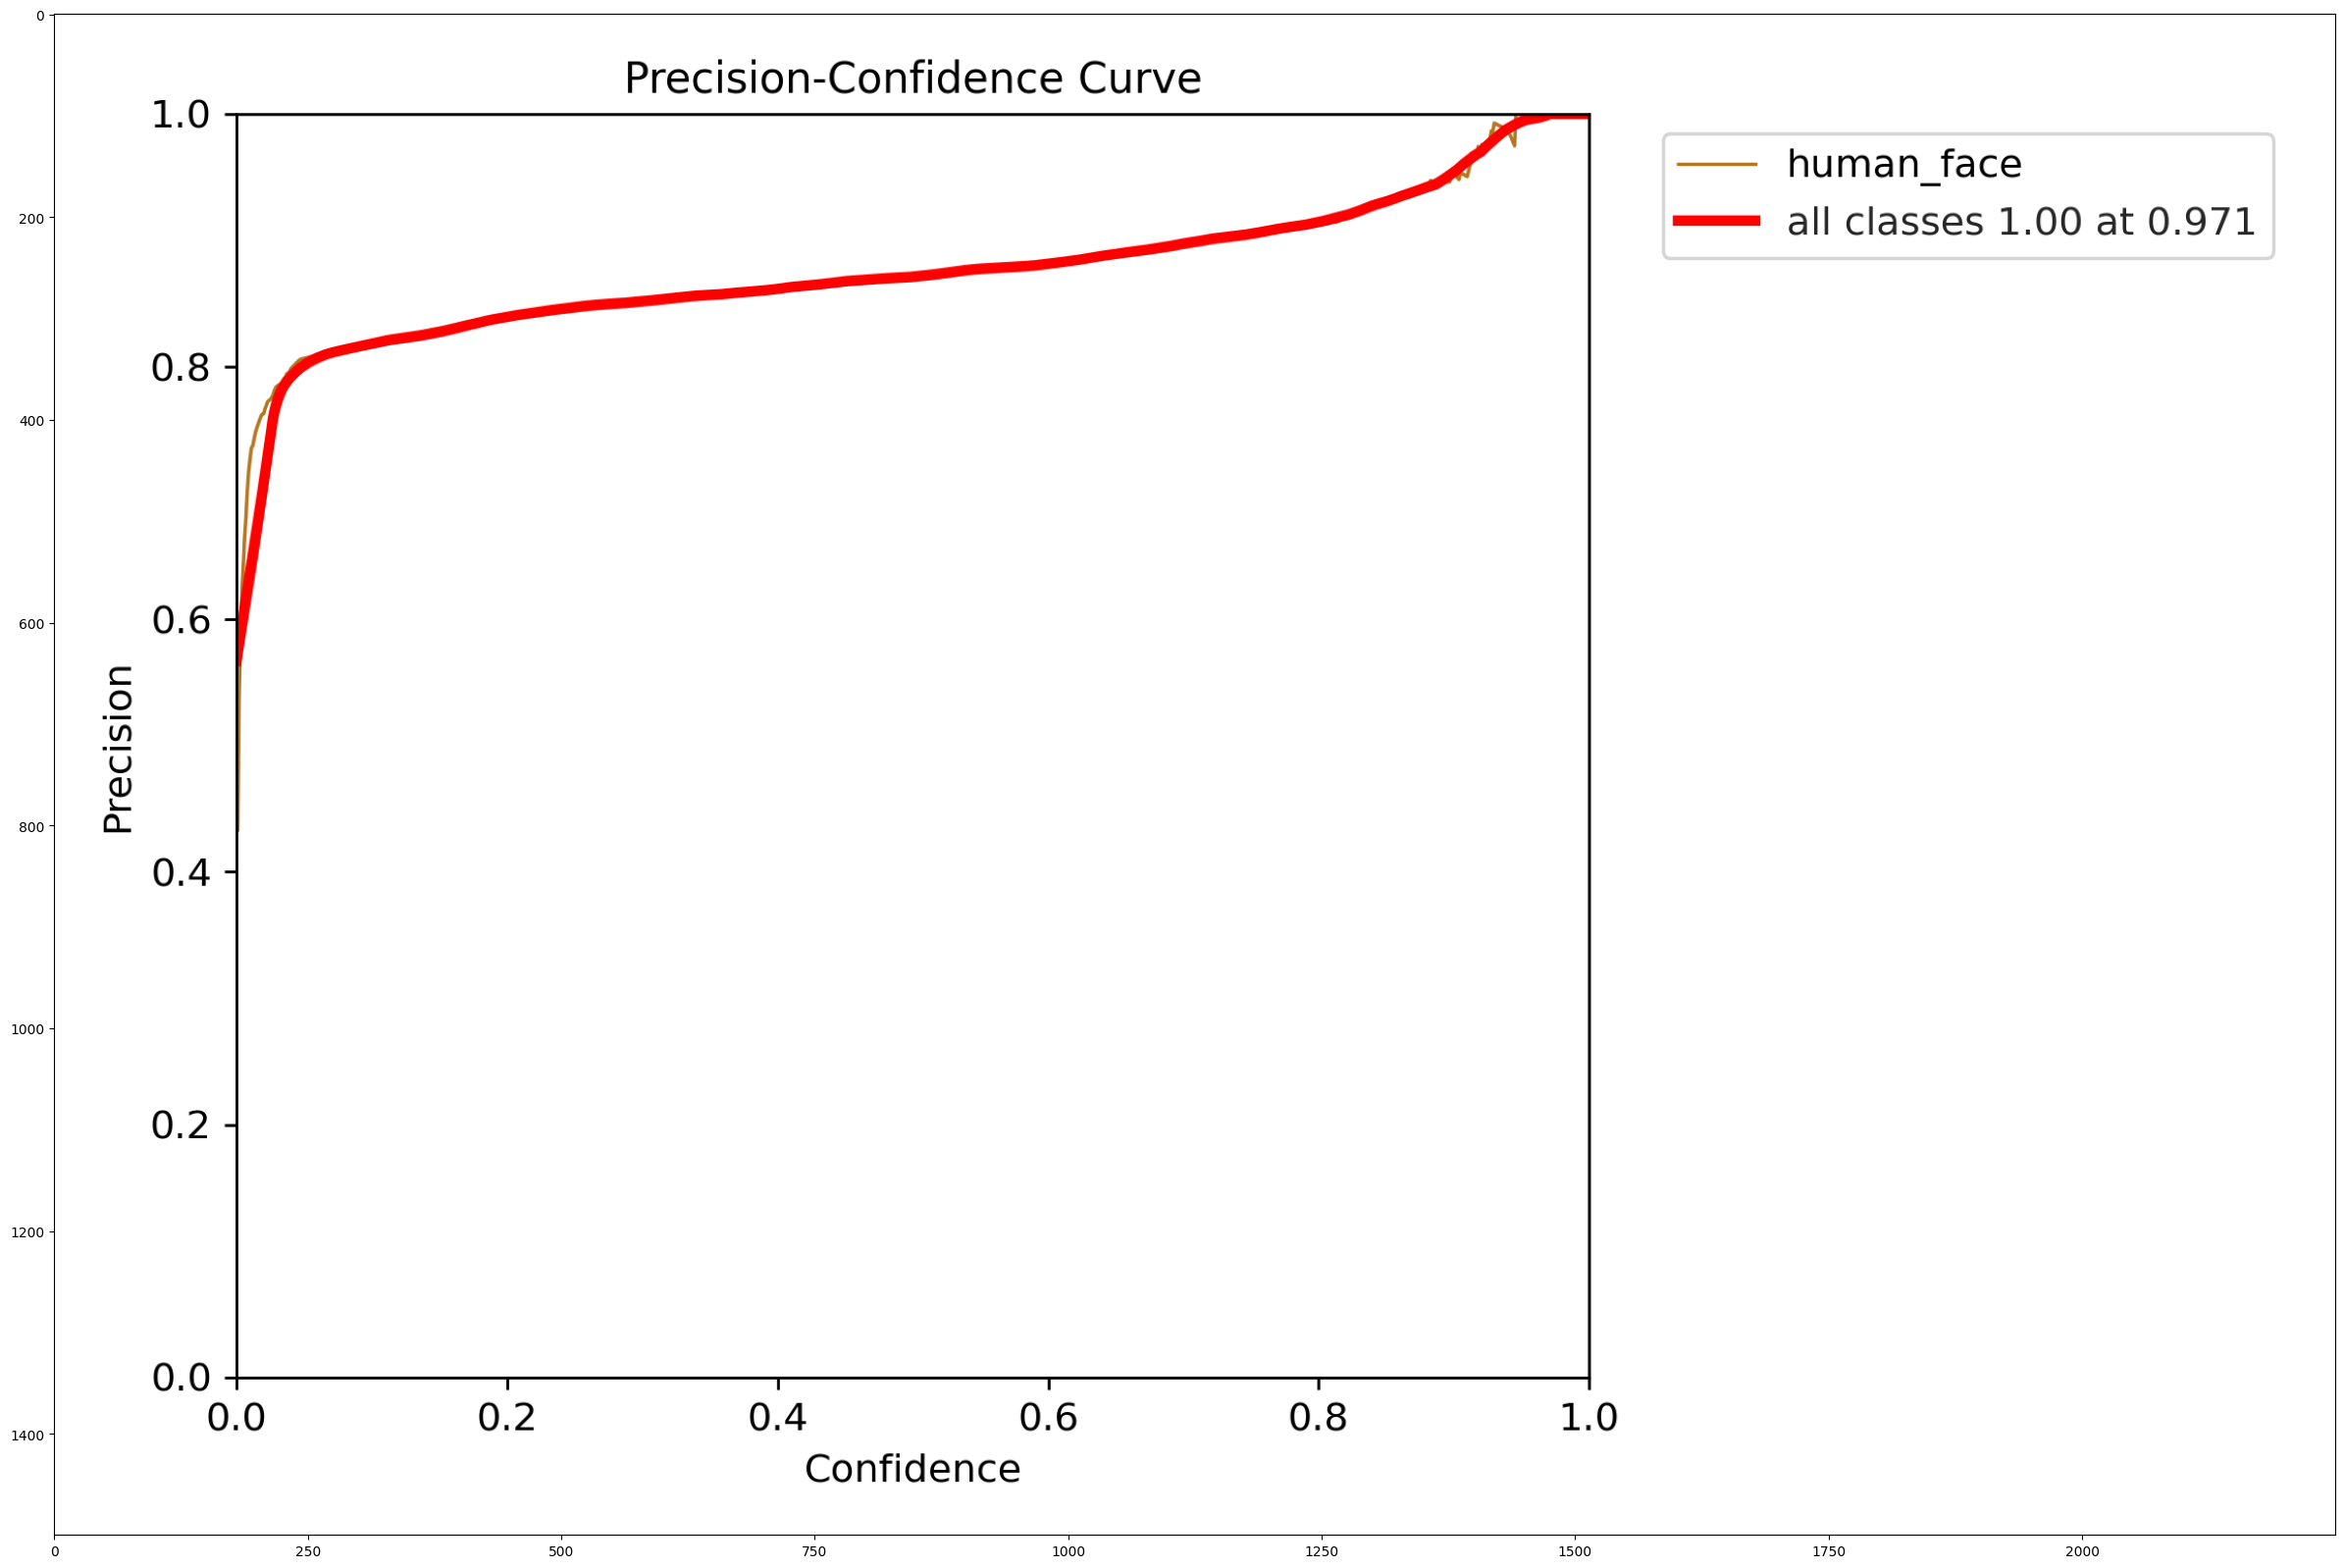

In [23]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp2/P_curve.png")
plt.imshow(results_png)

Recall - Confidence curve

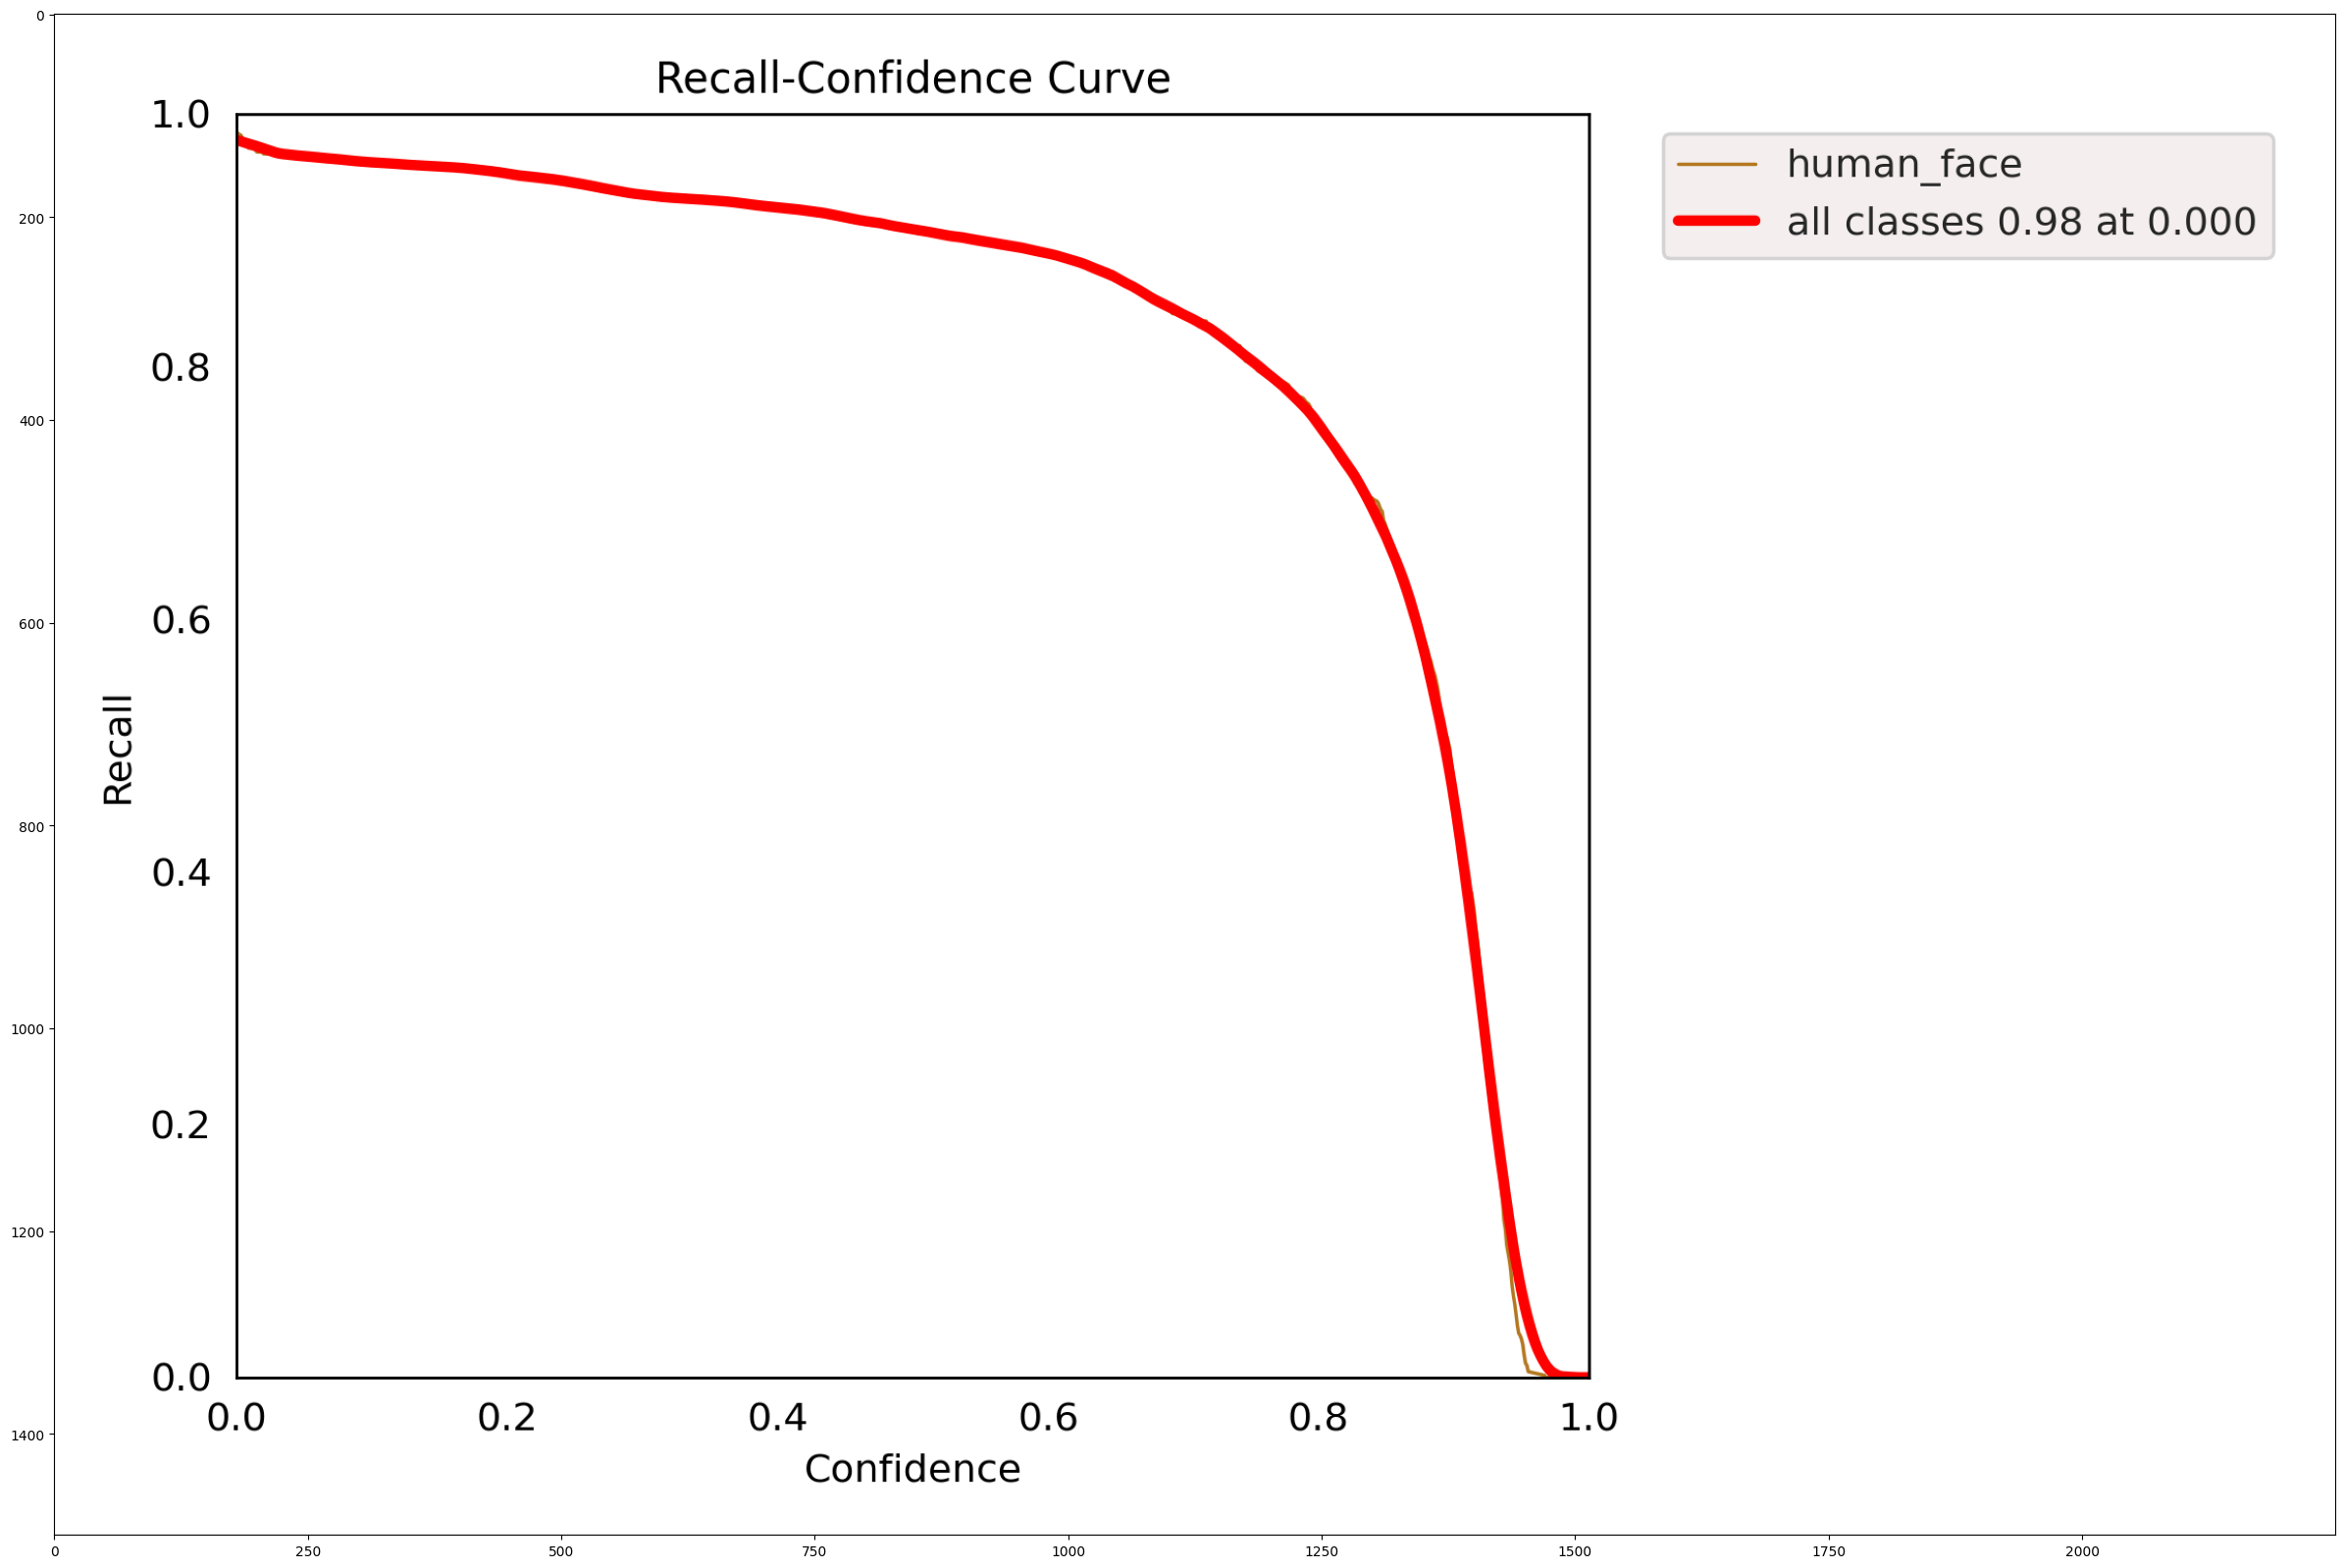

In [24]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp2/R_curve.png")
plt.imshow(results_png)

## Third training

### Traning

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data face_detection_data.yaml --weights runs/train/exp2/weights/best.pt --cache

2023-11-12 10:48:24.439798: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 10:48:24.439872: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 10:48:24.439922: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=runs/train/exp2/weights/best.pt, cfg=, data=face_detection_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, 

### Validation

In [ ]:
!python val.py --img 640 --weights runs/train/exp3/weights/best.pt --data face_detection_data.yaml

val: data=/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/data/face_detection_data.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/labels/val.cache... 463 images, 0 backgrounds, 0 corrupt: 100% 463/463 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 15/15 [00:17<00:00,  1.19s/it]
                   all        463        665      0.848      0.943      0.938      0.659
Speed: 0.2

### Testing

In [10]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.4 --source '/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/'

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000018.jpg: 448x640 1 human_face, 47.6ms
image 2/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000114.jpg: 640x448 1 human_face, 55.1ms
image 3/199 /cont

### Results

Results

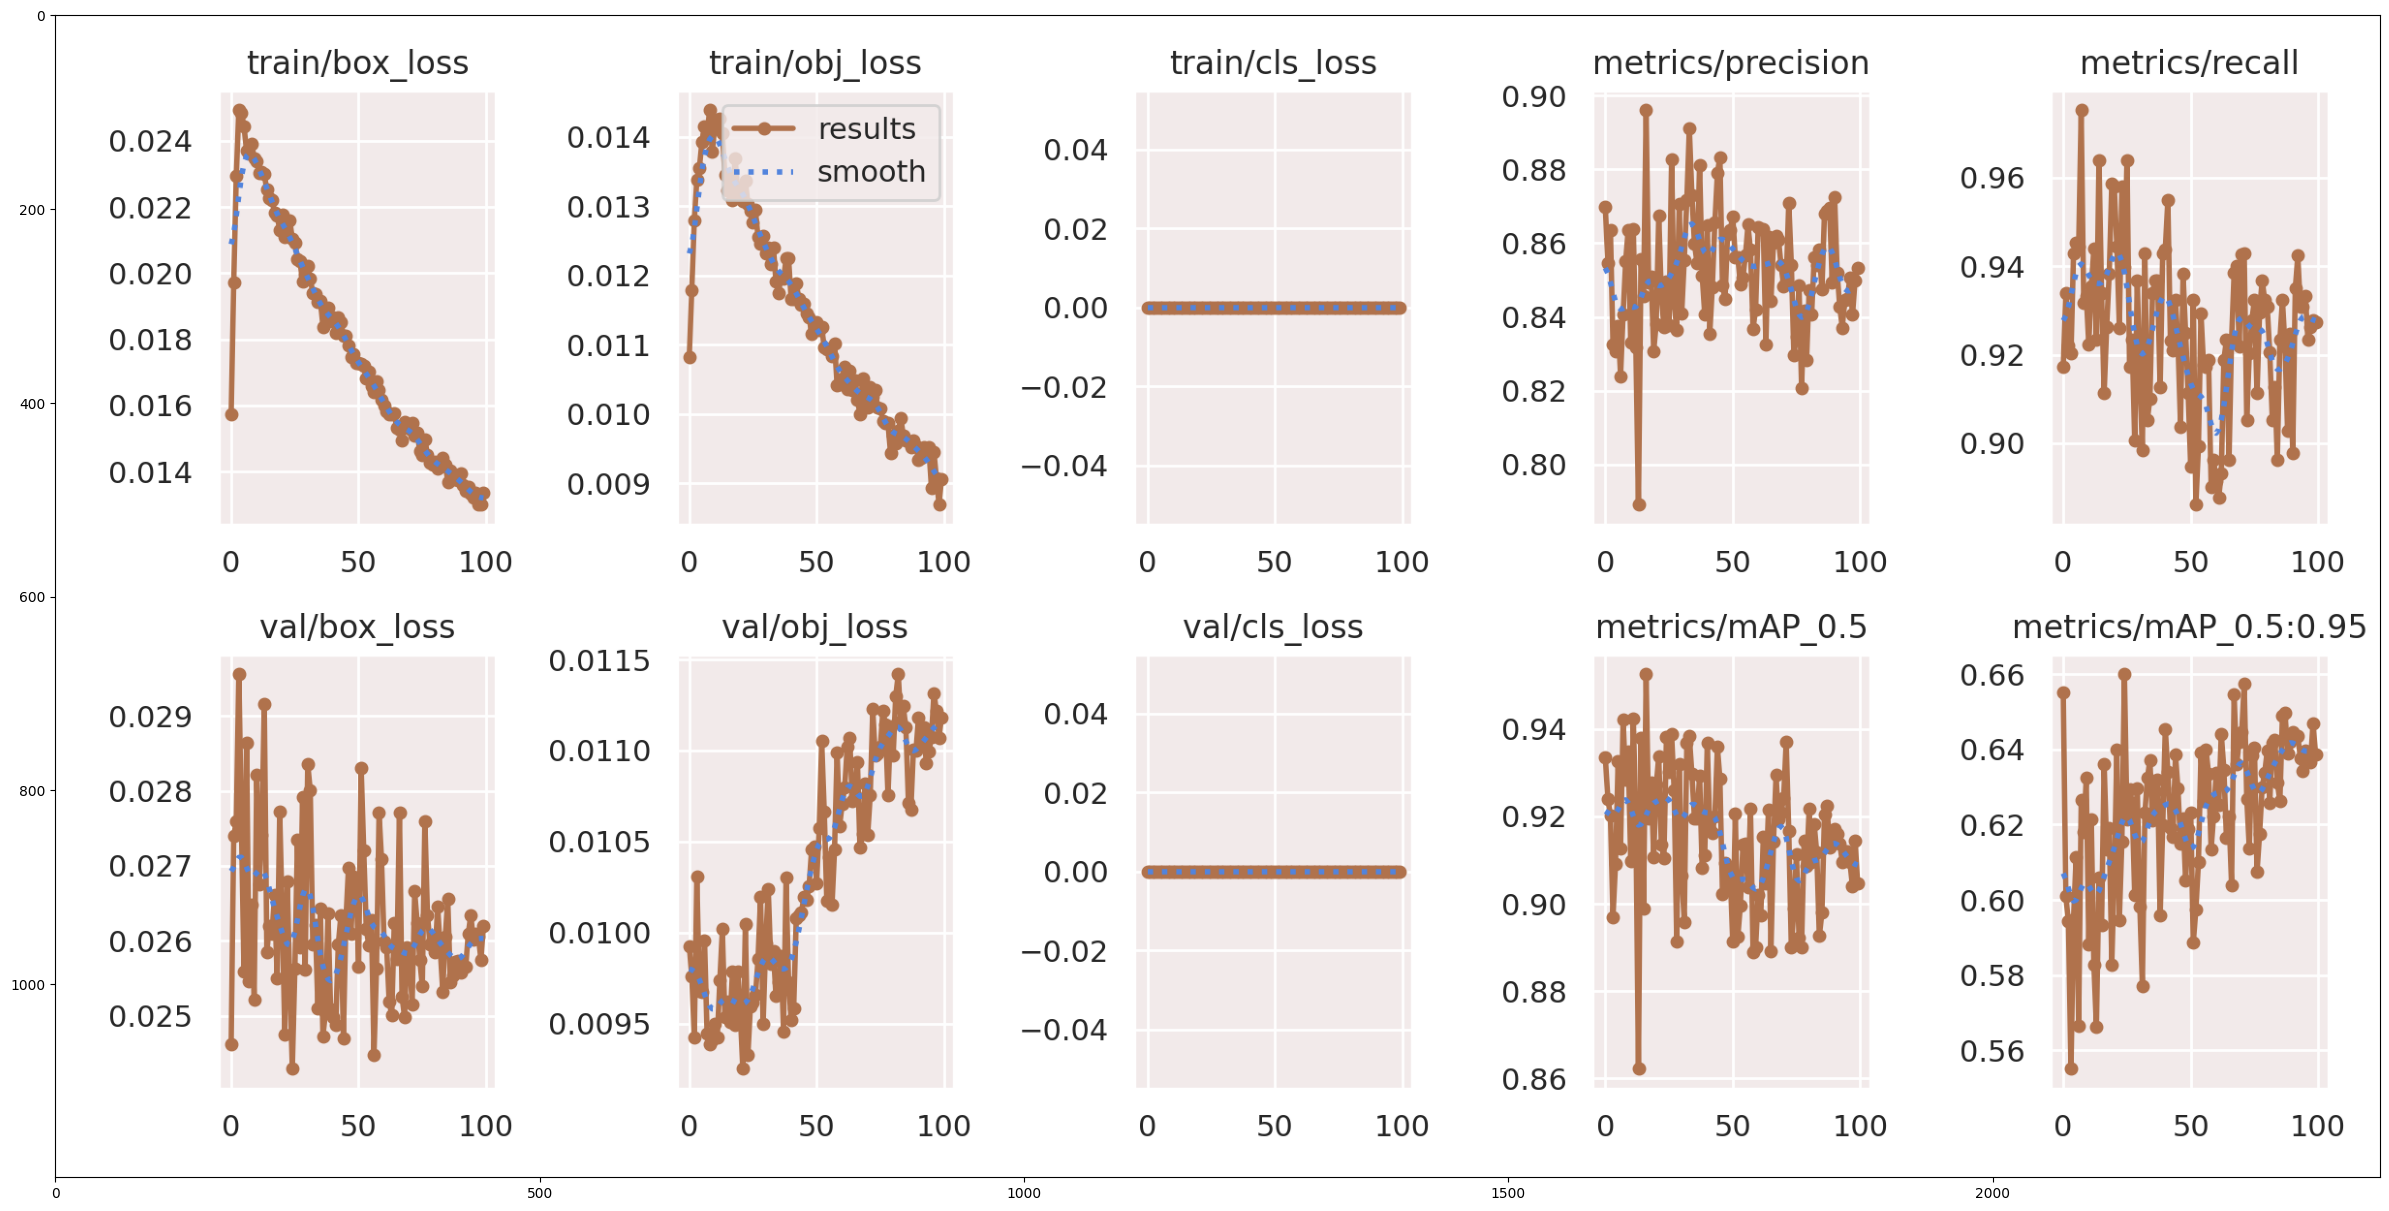

In [25]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/train/exp3/results.png")
plt.imshow(results_png)

Confusion matrix

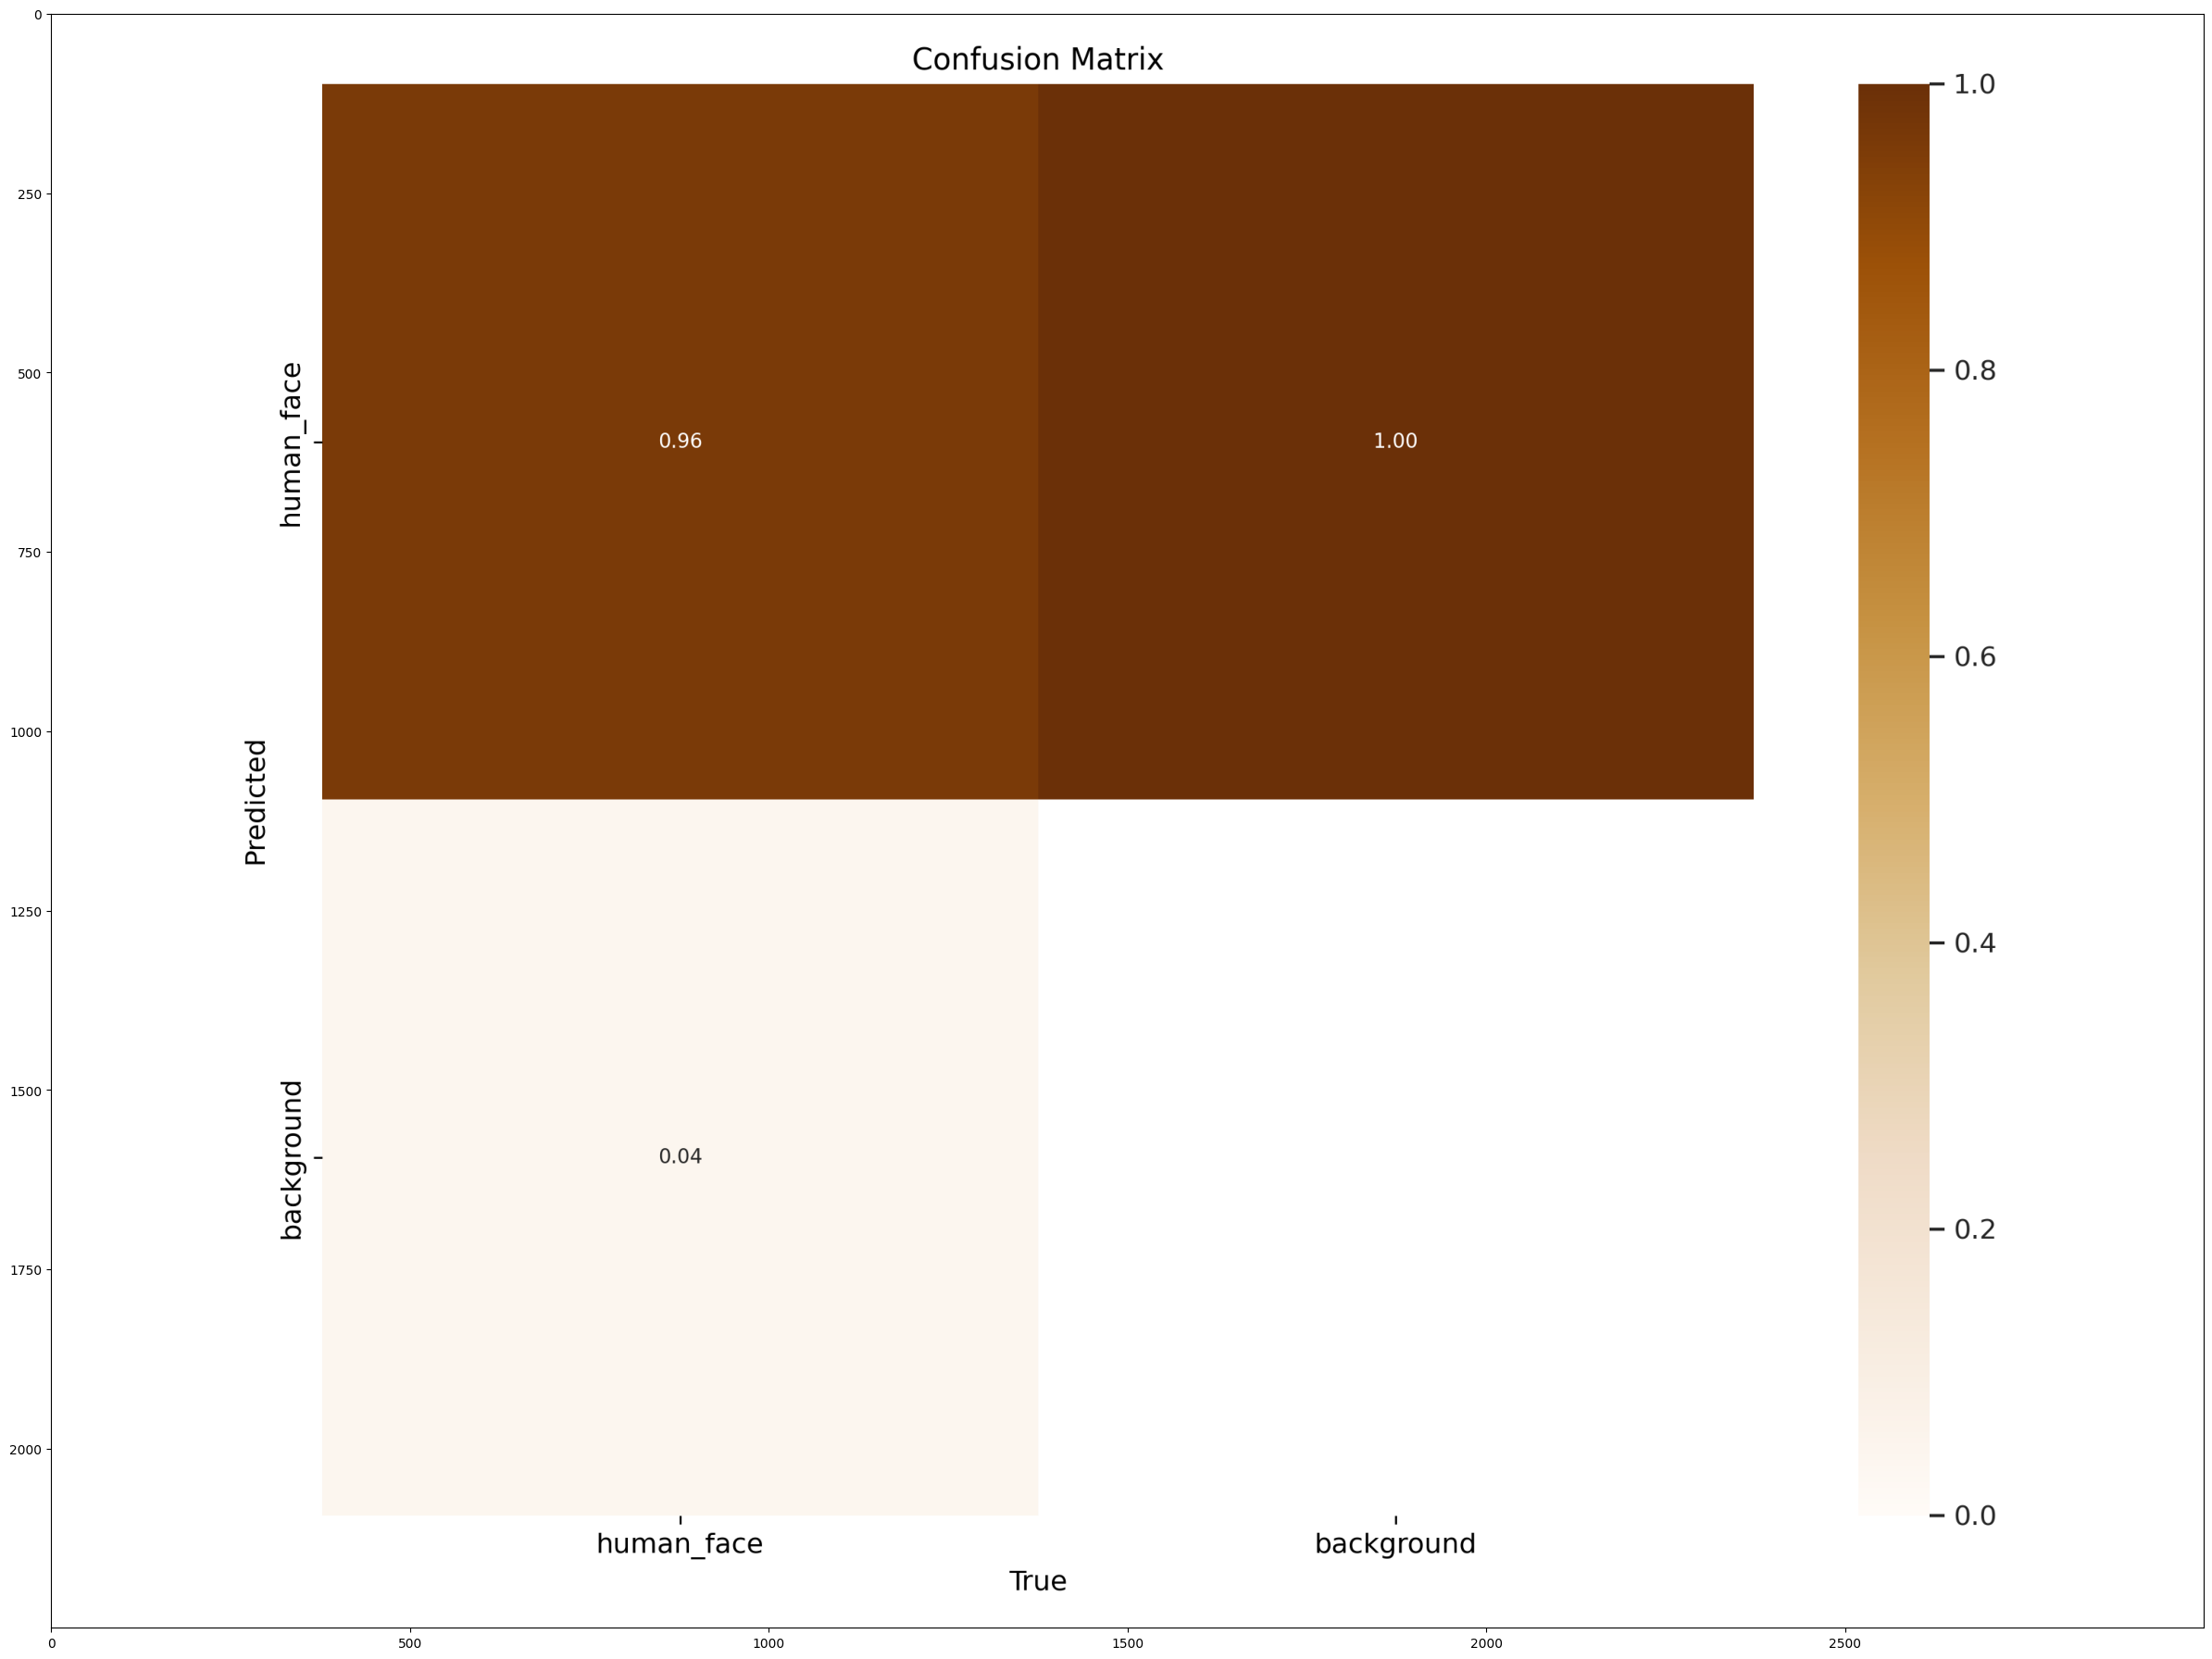

In [26]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp3/confusion_matrix.png")
plt.imshow(results_png)

F1 curve

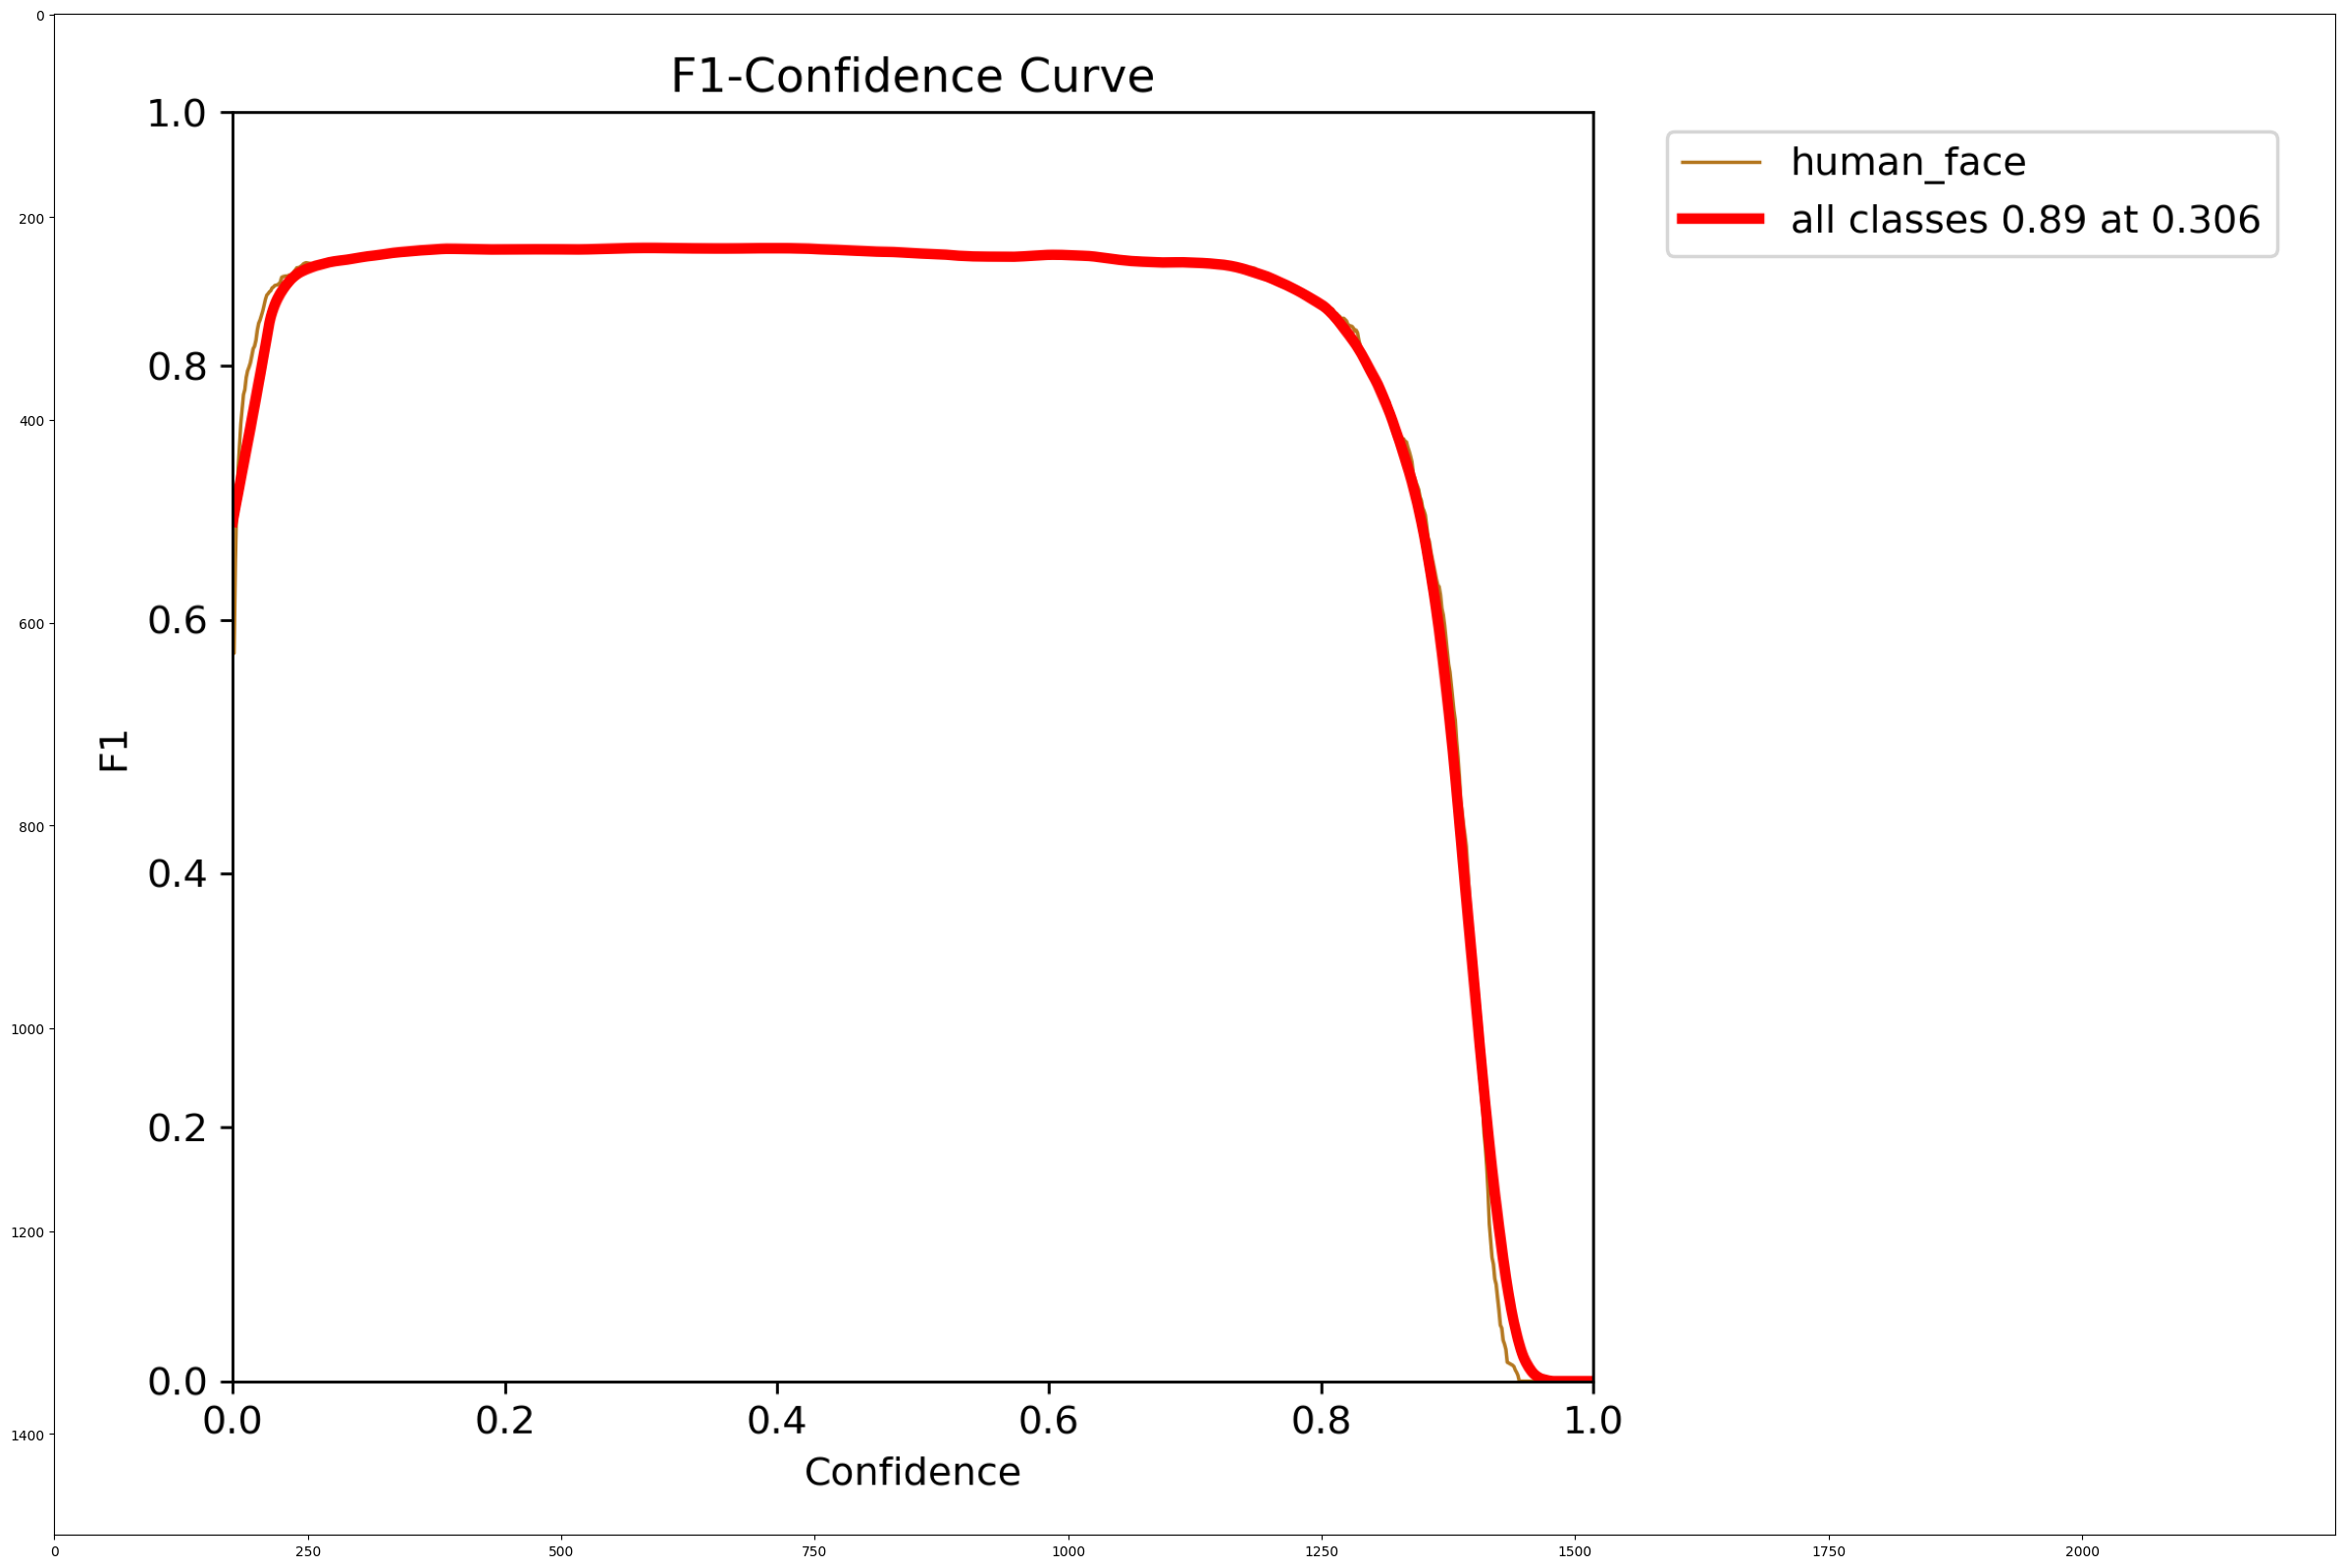

In [27]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp3/F1_curve.png")
plt.imshow(results_png)

Precision - Recall curve

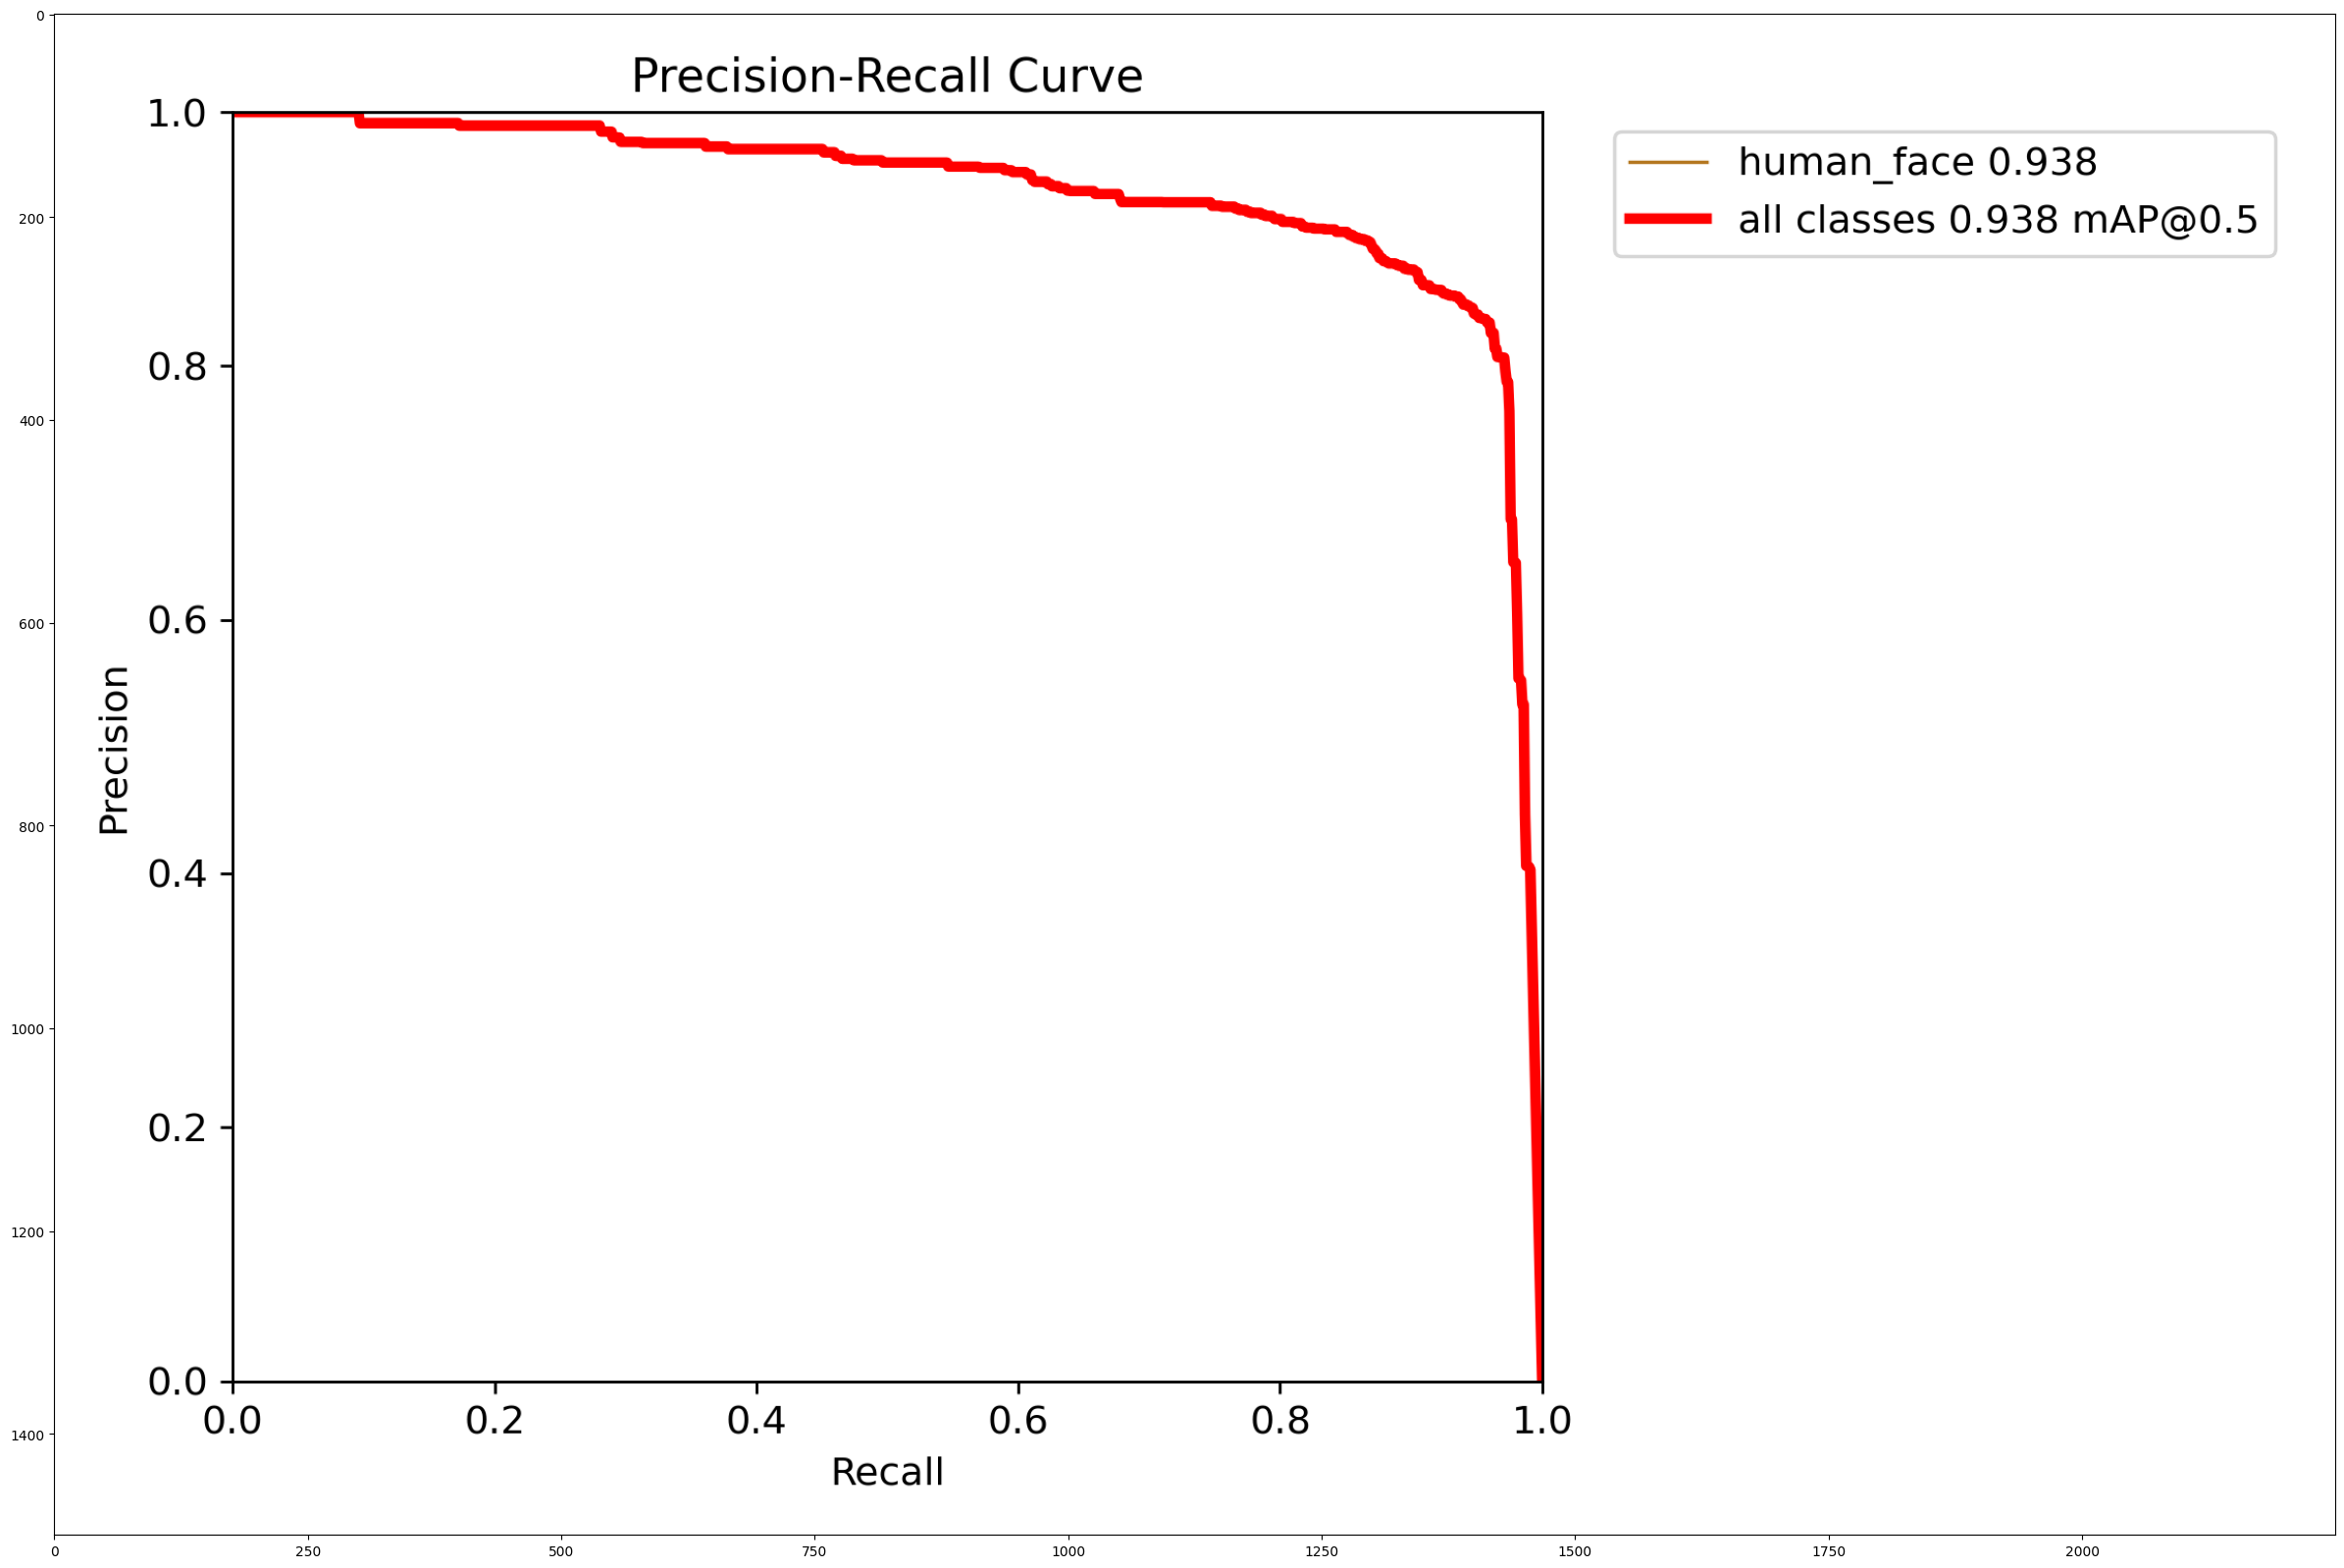

In [28]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp3/PR_curve.png")
plt.imshow(results_png)

Precision - Confidence curve

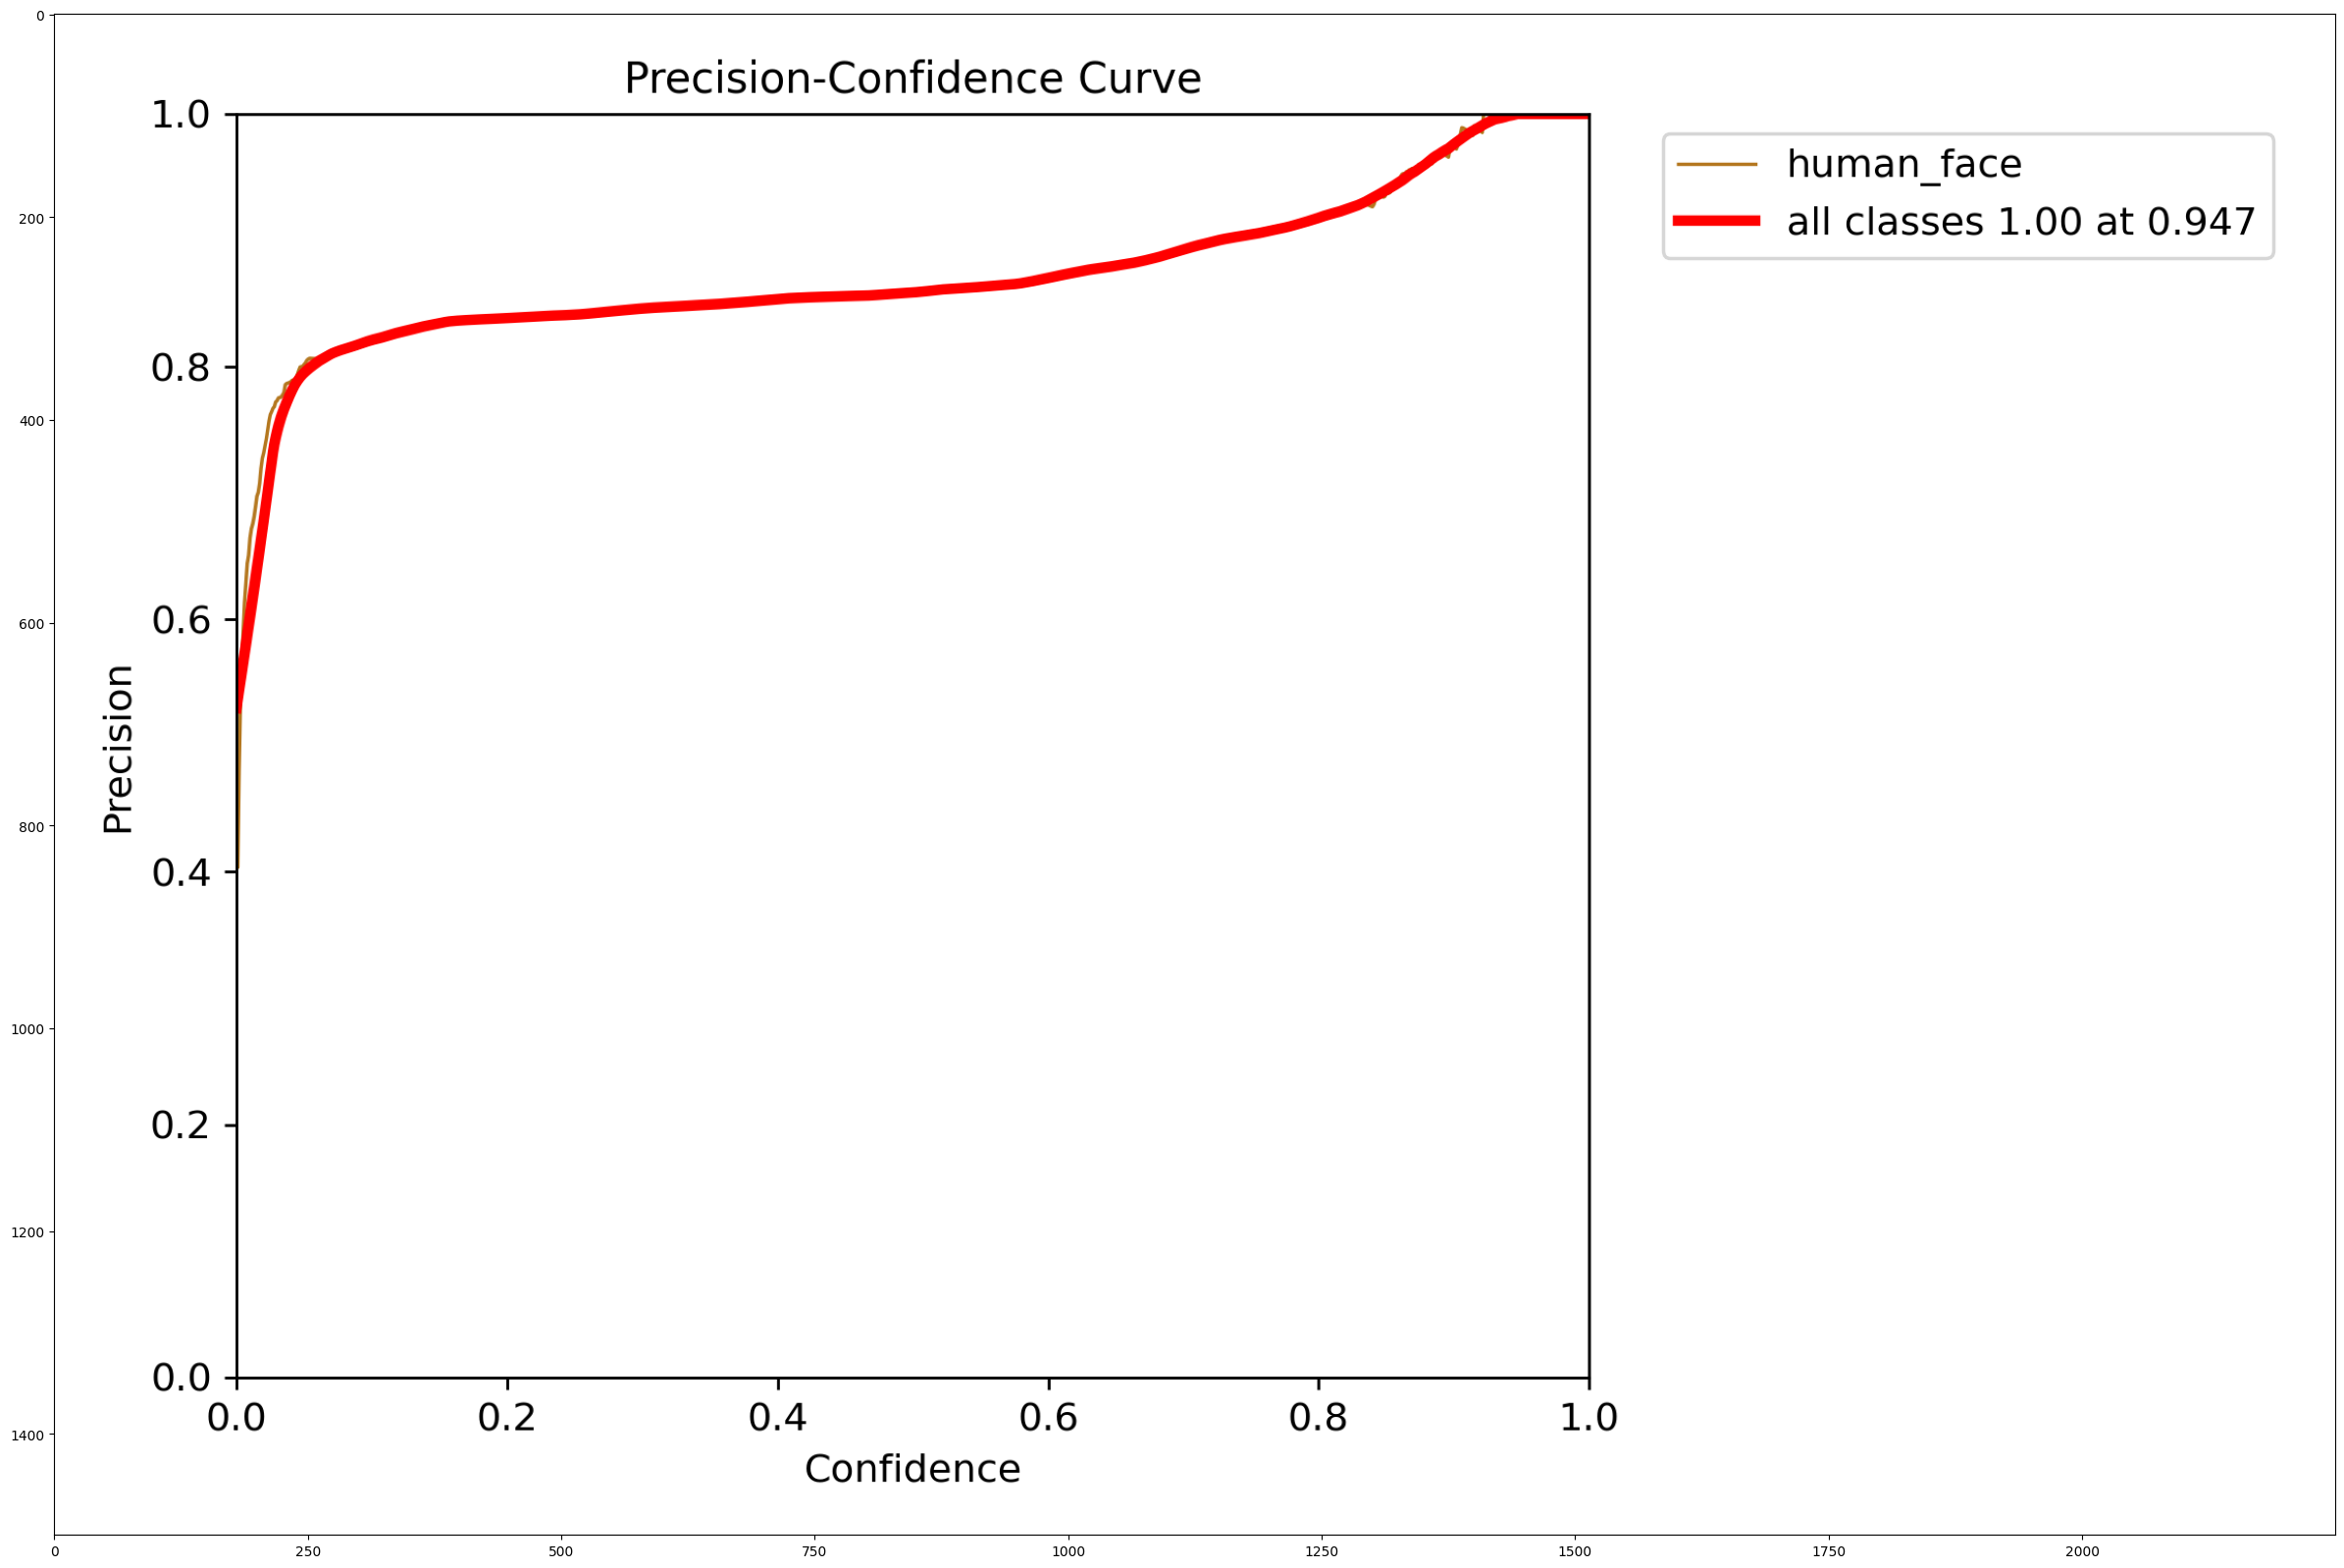

In [29]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp3/P_curve.png")
plt.imshow(results_png)

Recall - Confidence curve

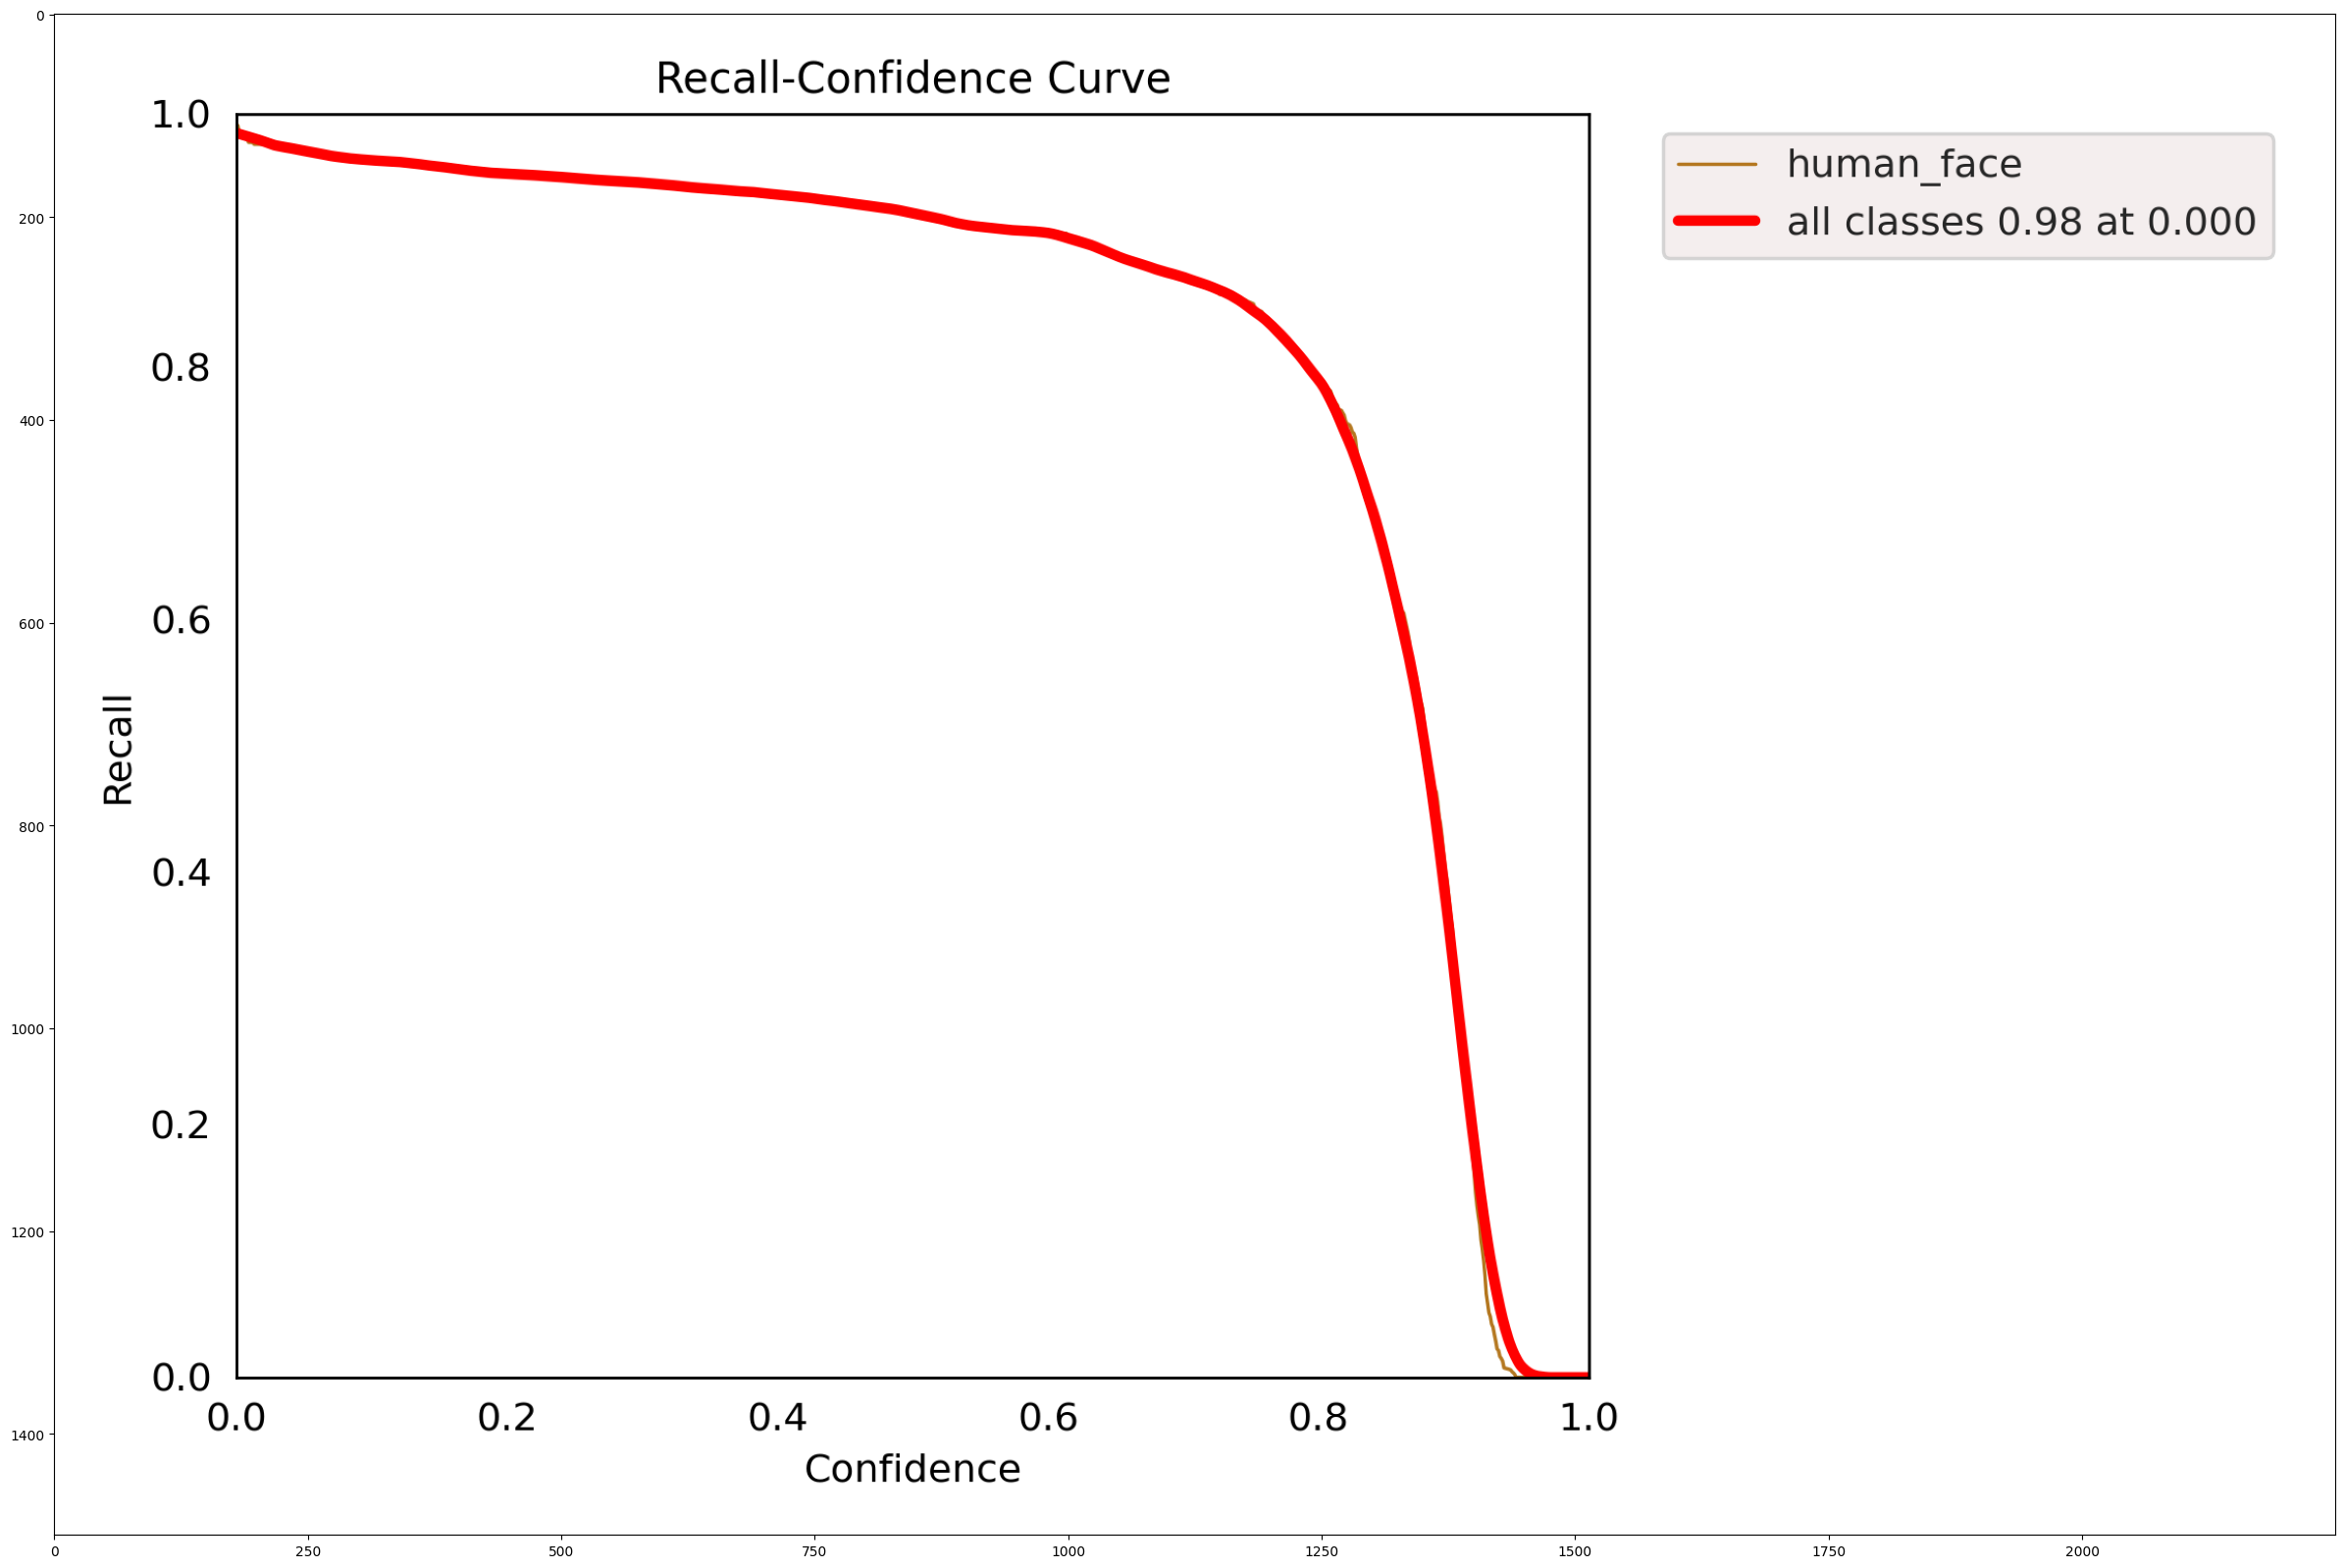

In [30]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp3/R_curve.png")
plt.imshow(results_png)

## Fourth training

### Training

In [4]:
!python train.py --img 640 --batch 16 --epochs 100 --data face_detection_data.yaml --weights runs/train/exp3/weights/best.pt --cache

2023-11-12 14:05:53.531206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 14:05:53.531276: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 14:05:53.531323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=runs/train/exp3/weights/best.pt, cfg=, data=face_detection_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, 

### Validation

In [5]:
!python val.py --img 640 --weights runs/train/exp4/weights/best.pt --data face_detection_data.yaml

val: data=/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/data/face_detection_data.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/labels/val.cache... 463 images, 0 backgrounds, 0 corrupt: 100% 463/463 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 15/15 [00:18<00:00,  1.23s/it]
                   all        463        665       0.87      0.914      0.923      0.652
Speed: 0.5

### Testing

In [11]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.4 --source '/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/'

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000018.jpg: 448x640 1 human_face, 44.2ms
image 2/199 /content/gdrive/MyDrive/BasementFriends/faceDetection/dataset/images/test/00000114.jpg: 640x448 1 human_face, 109.2ms
image 3/199 /con

### Results

Results

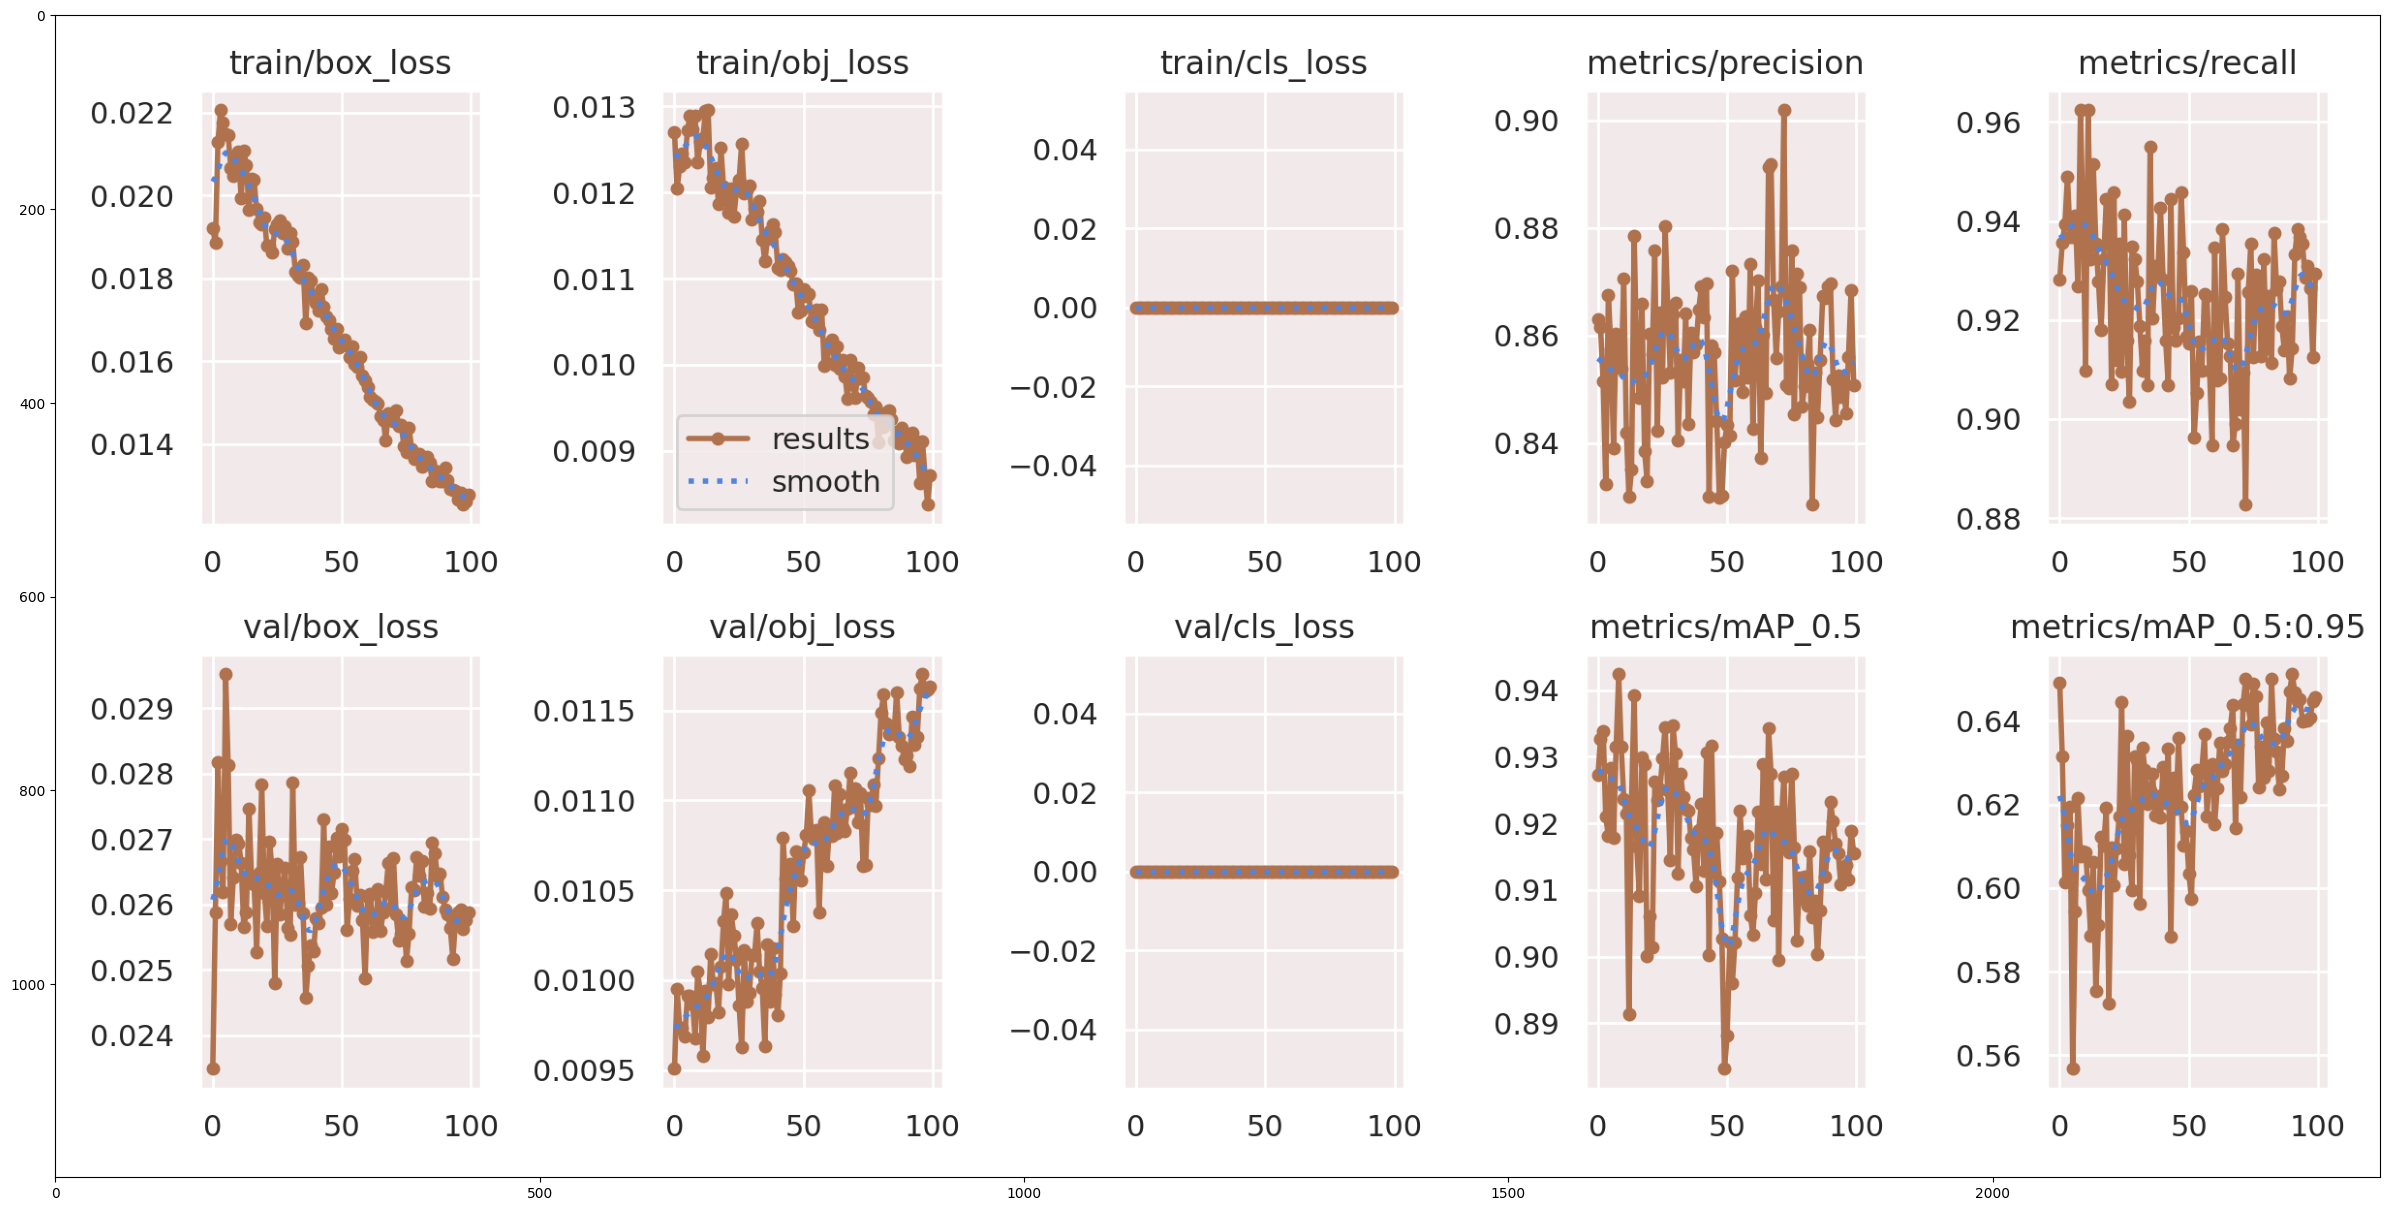

In [31]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/train/exp4/results.png")
plt.imshow(results_png)

Confusion matrix

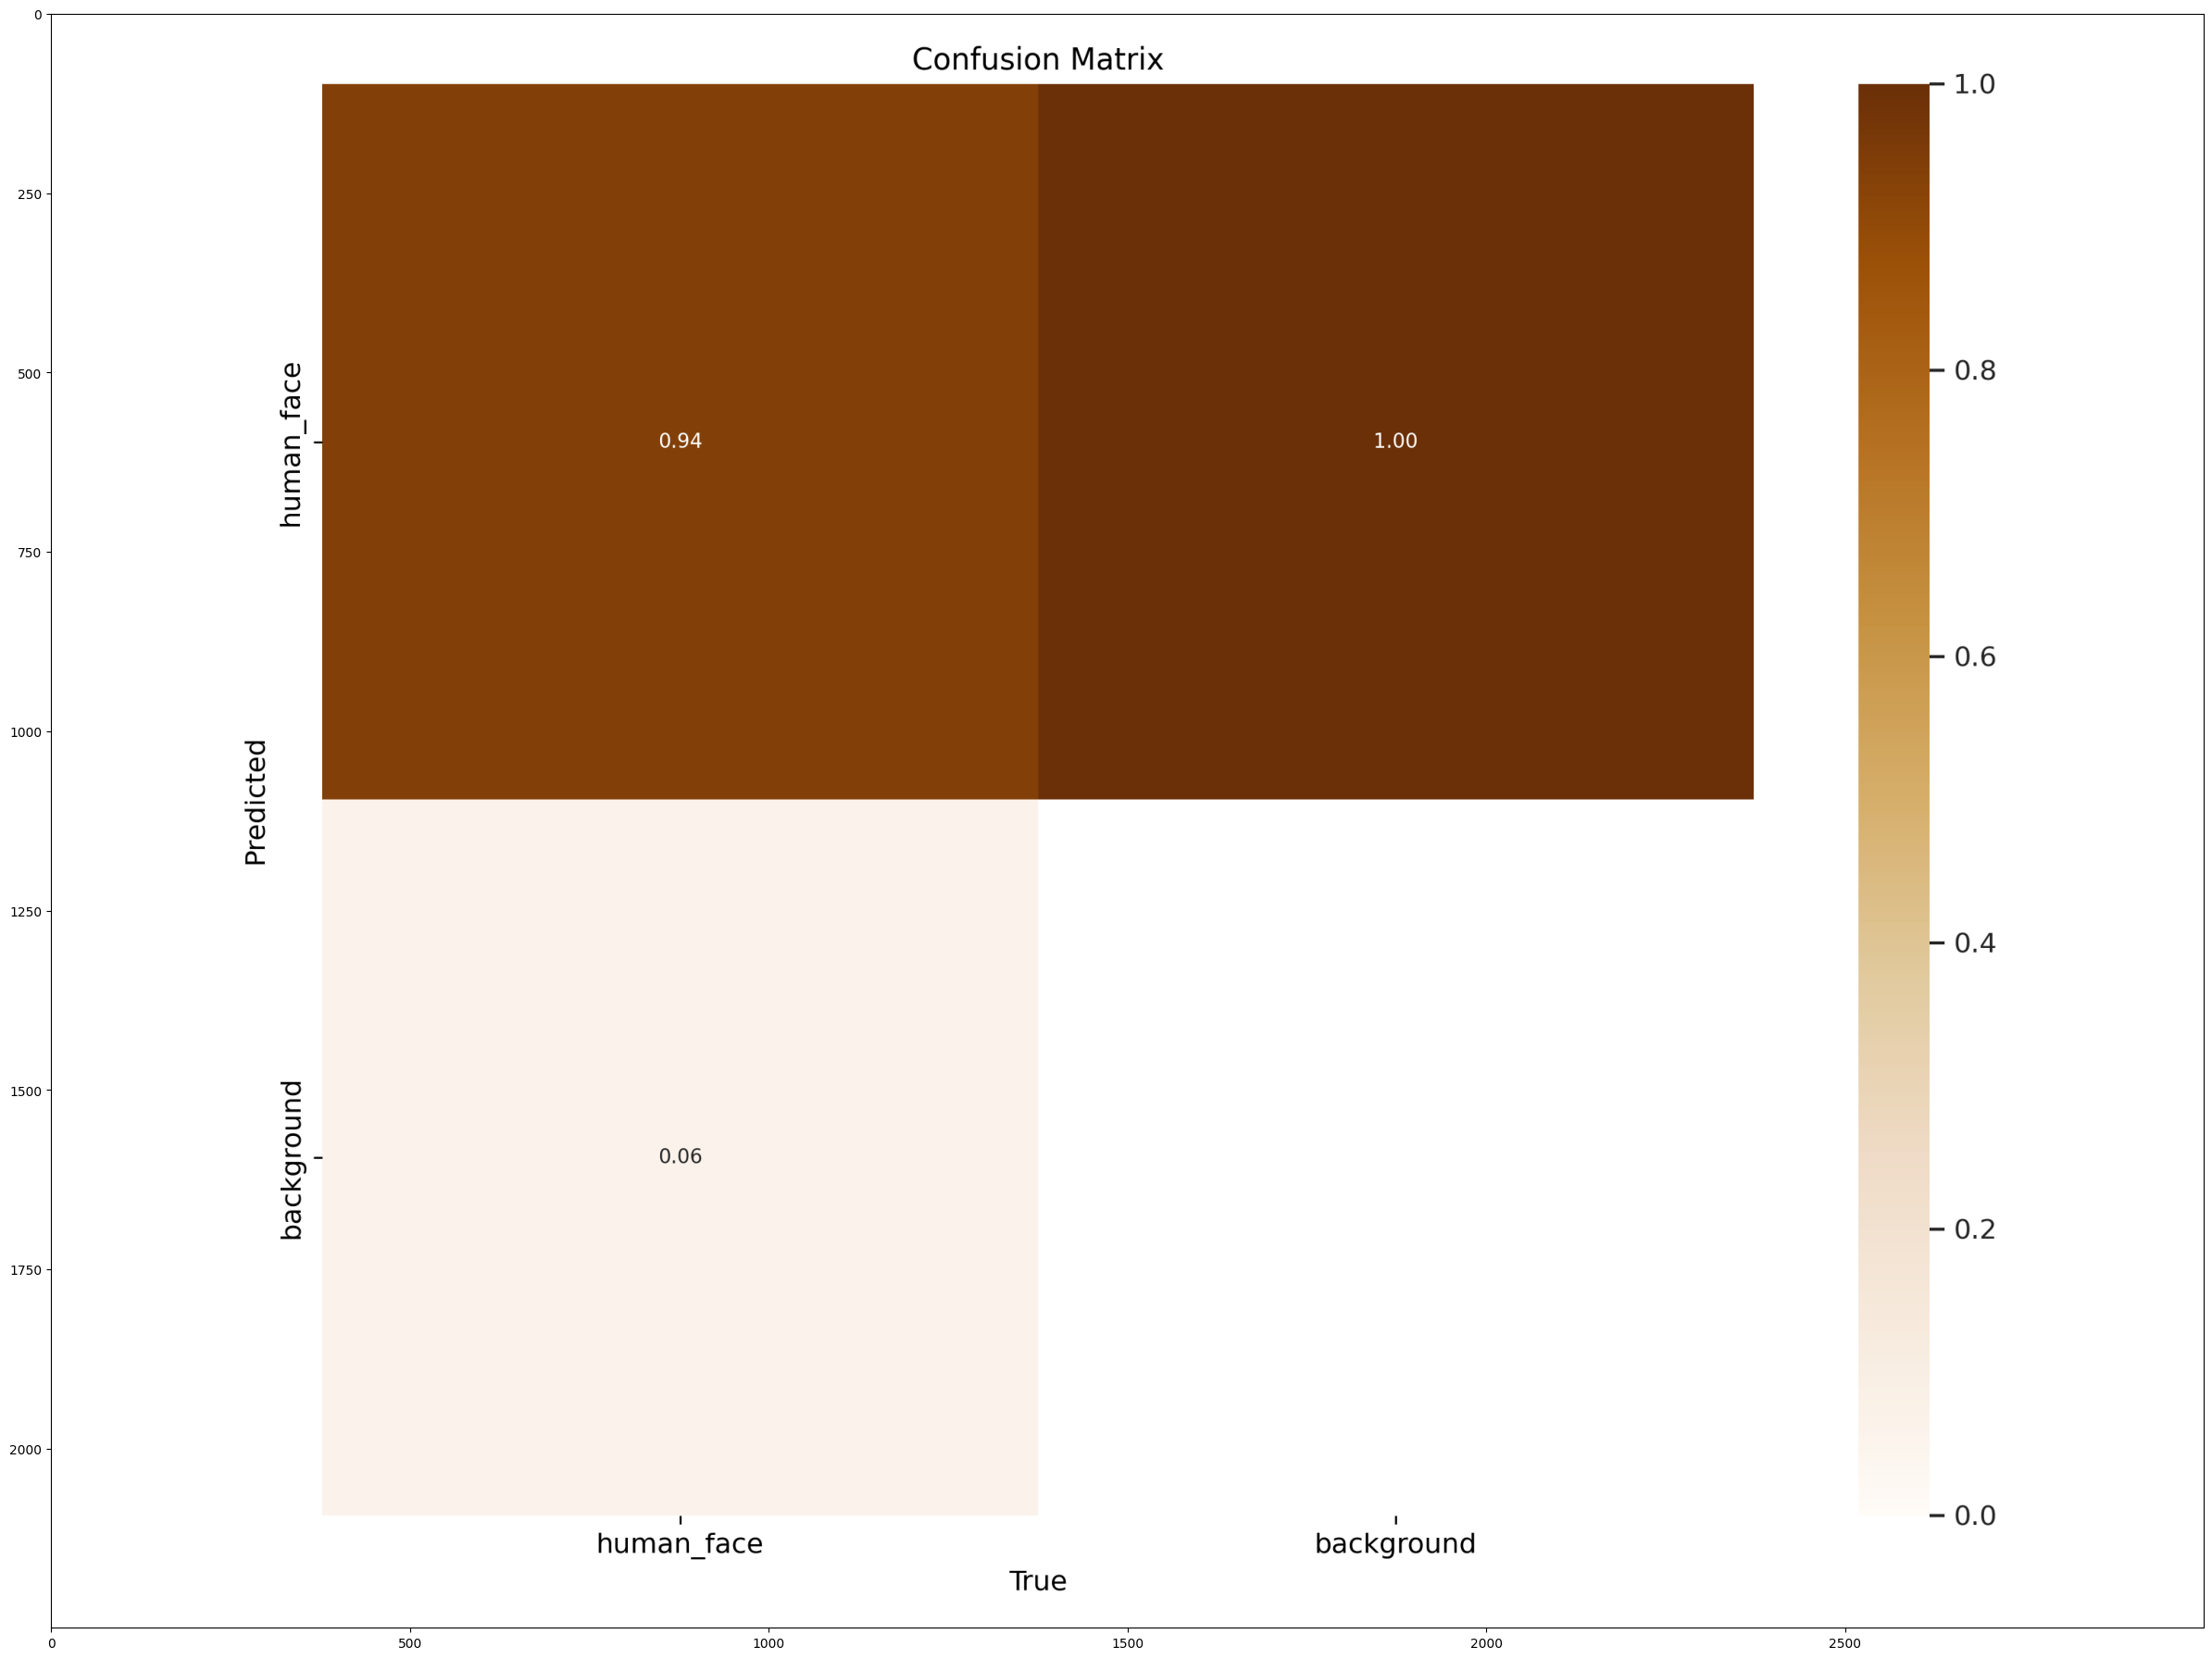

In [32]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp4/confusion_matrix.png")
plt.imshow(results_png)

F1 curve

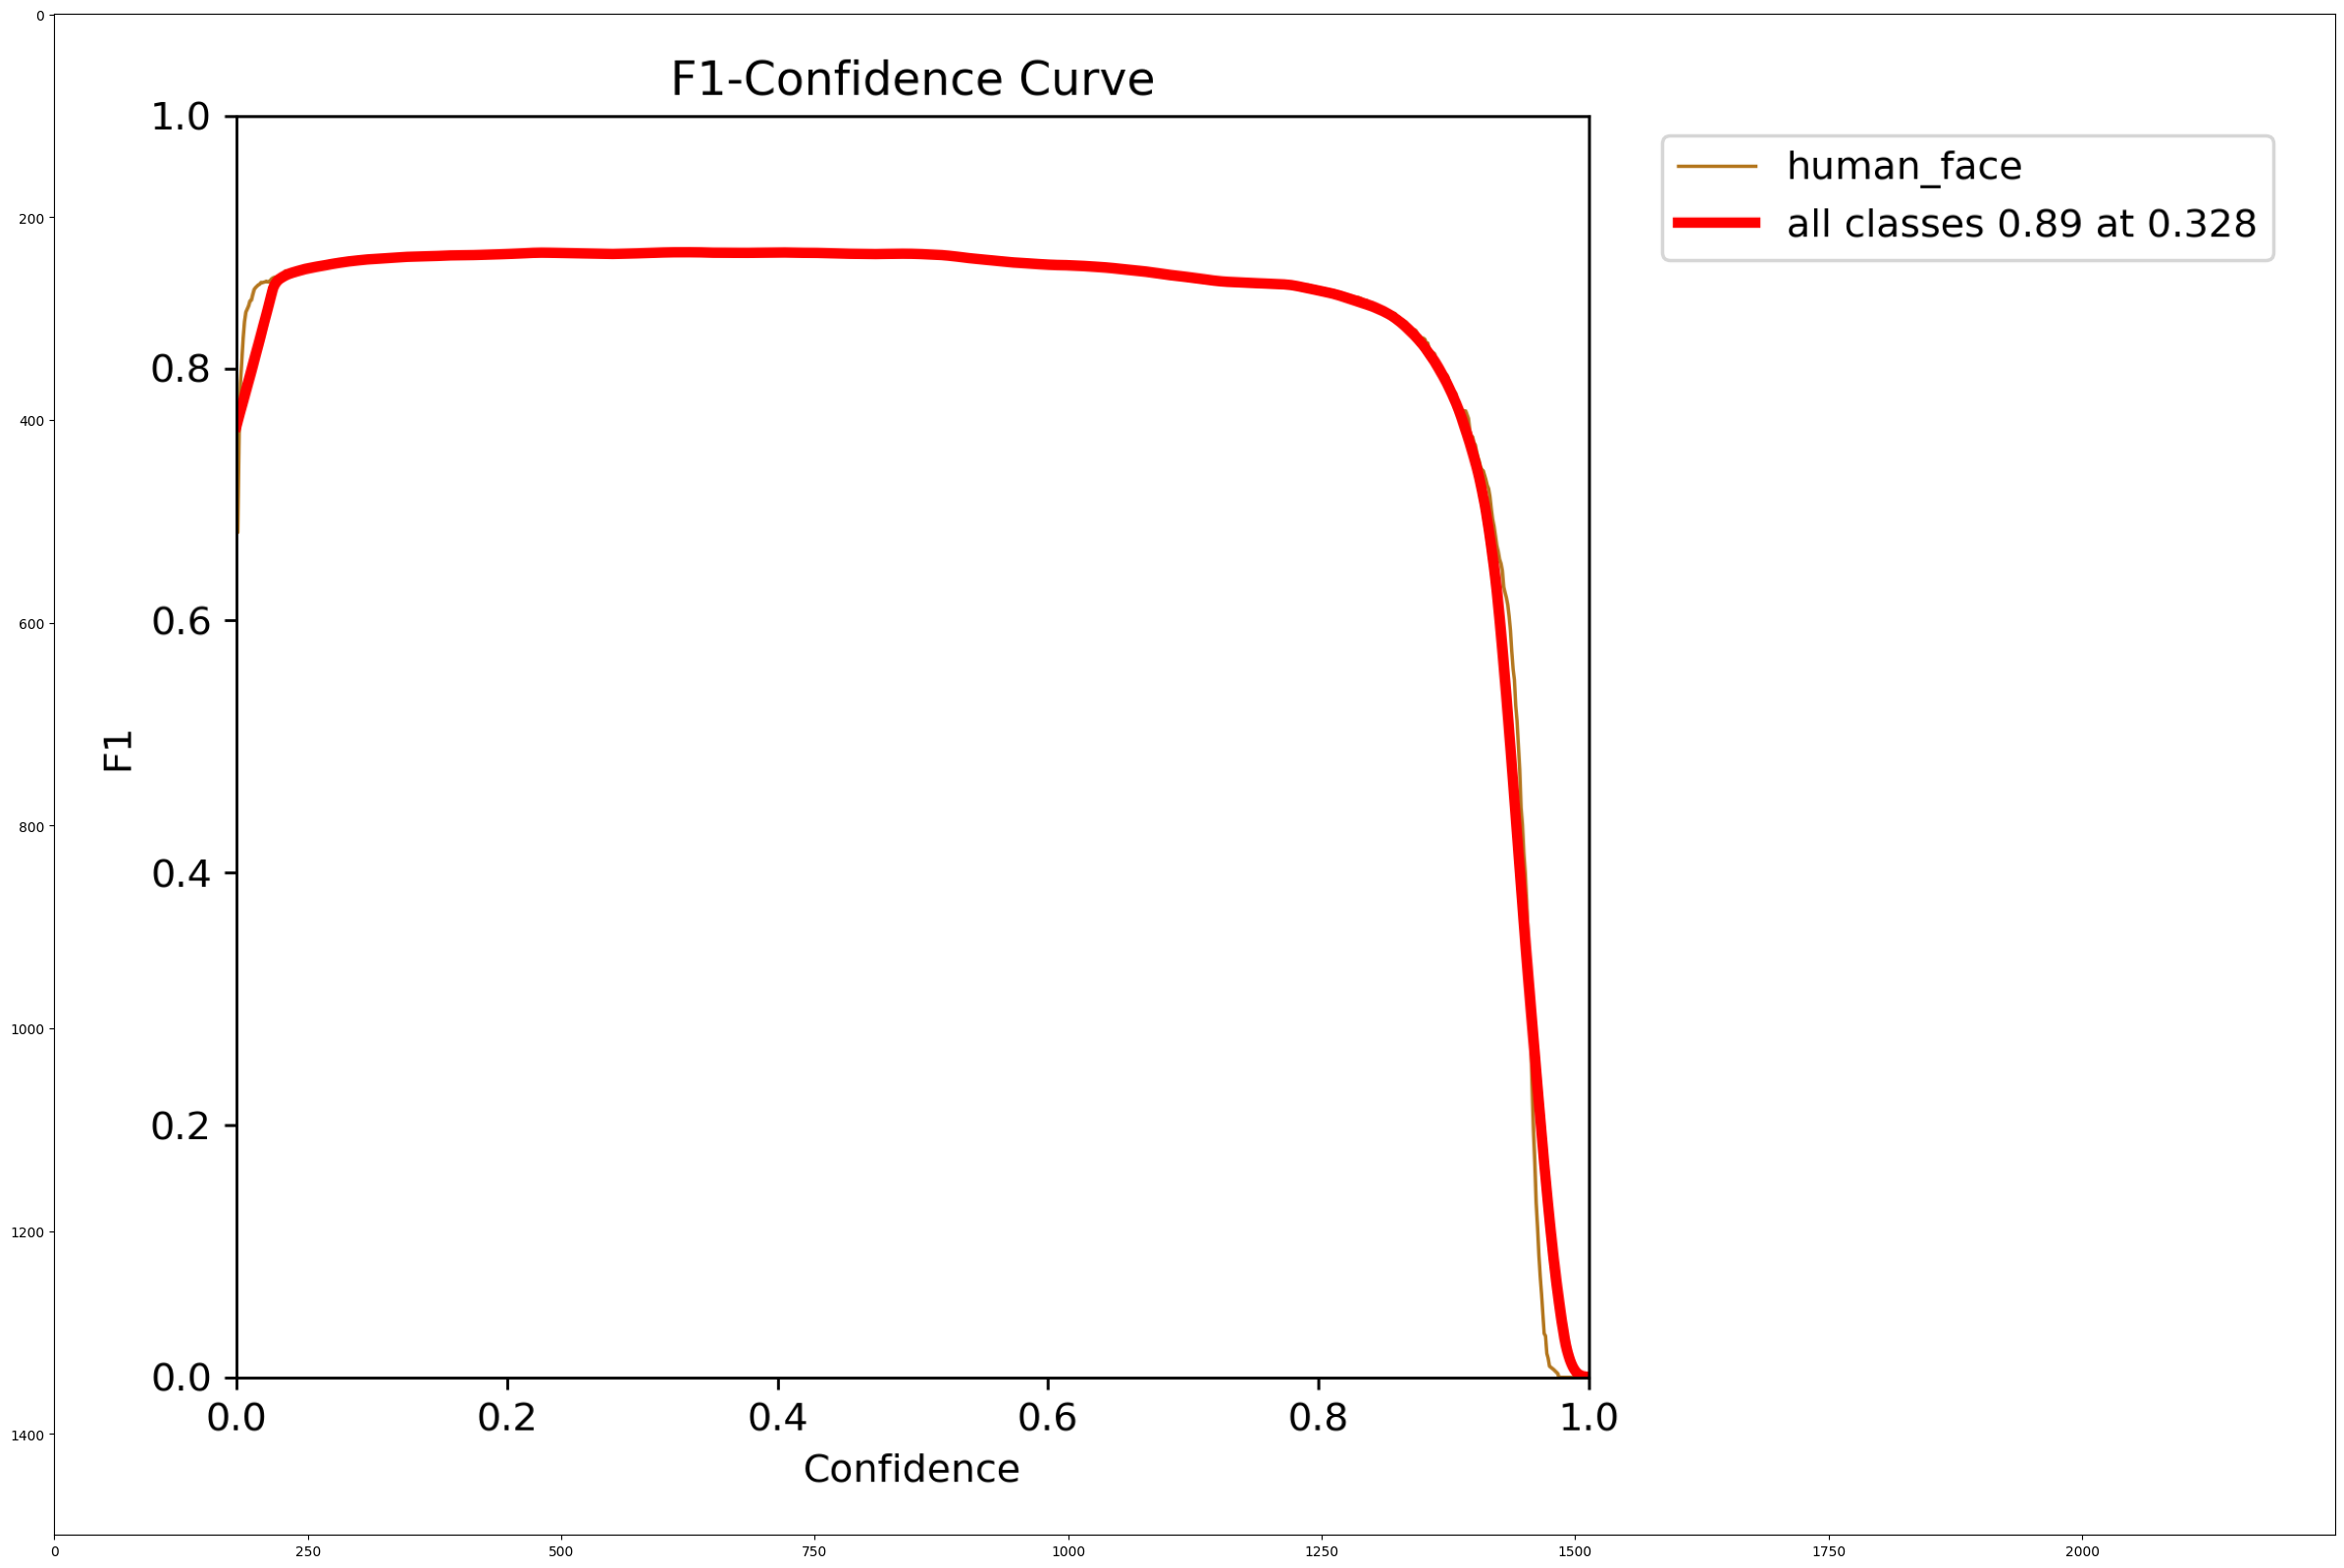

In [33]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp4/F1_curve.png")
plt.imshow(results_png)

Precision - Recall curve

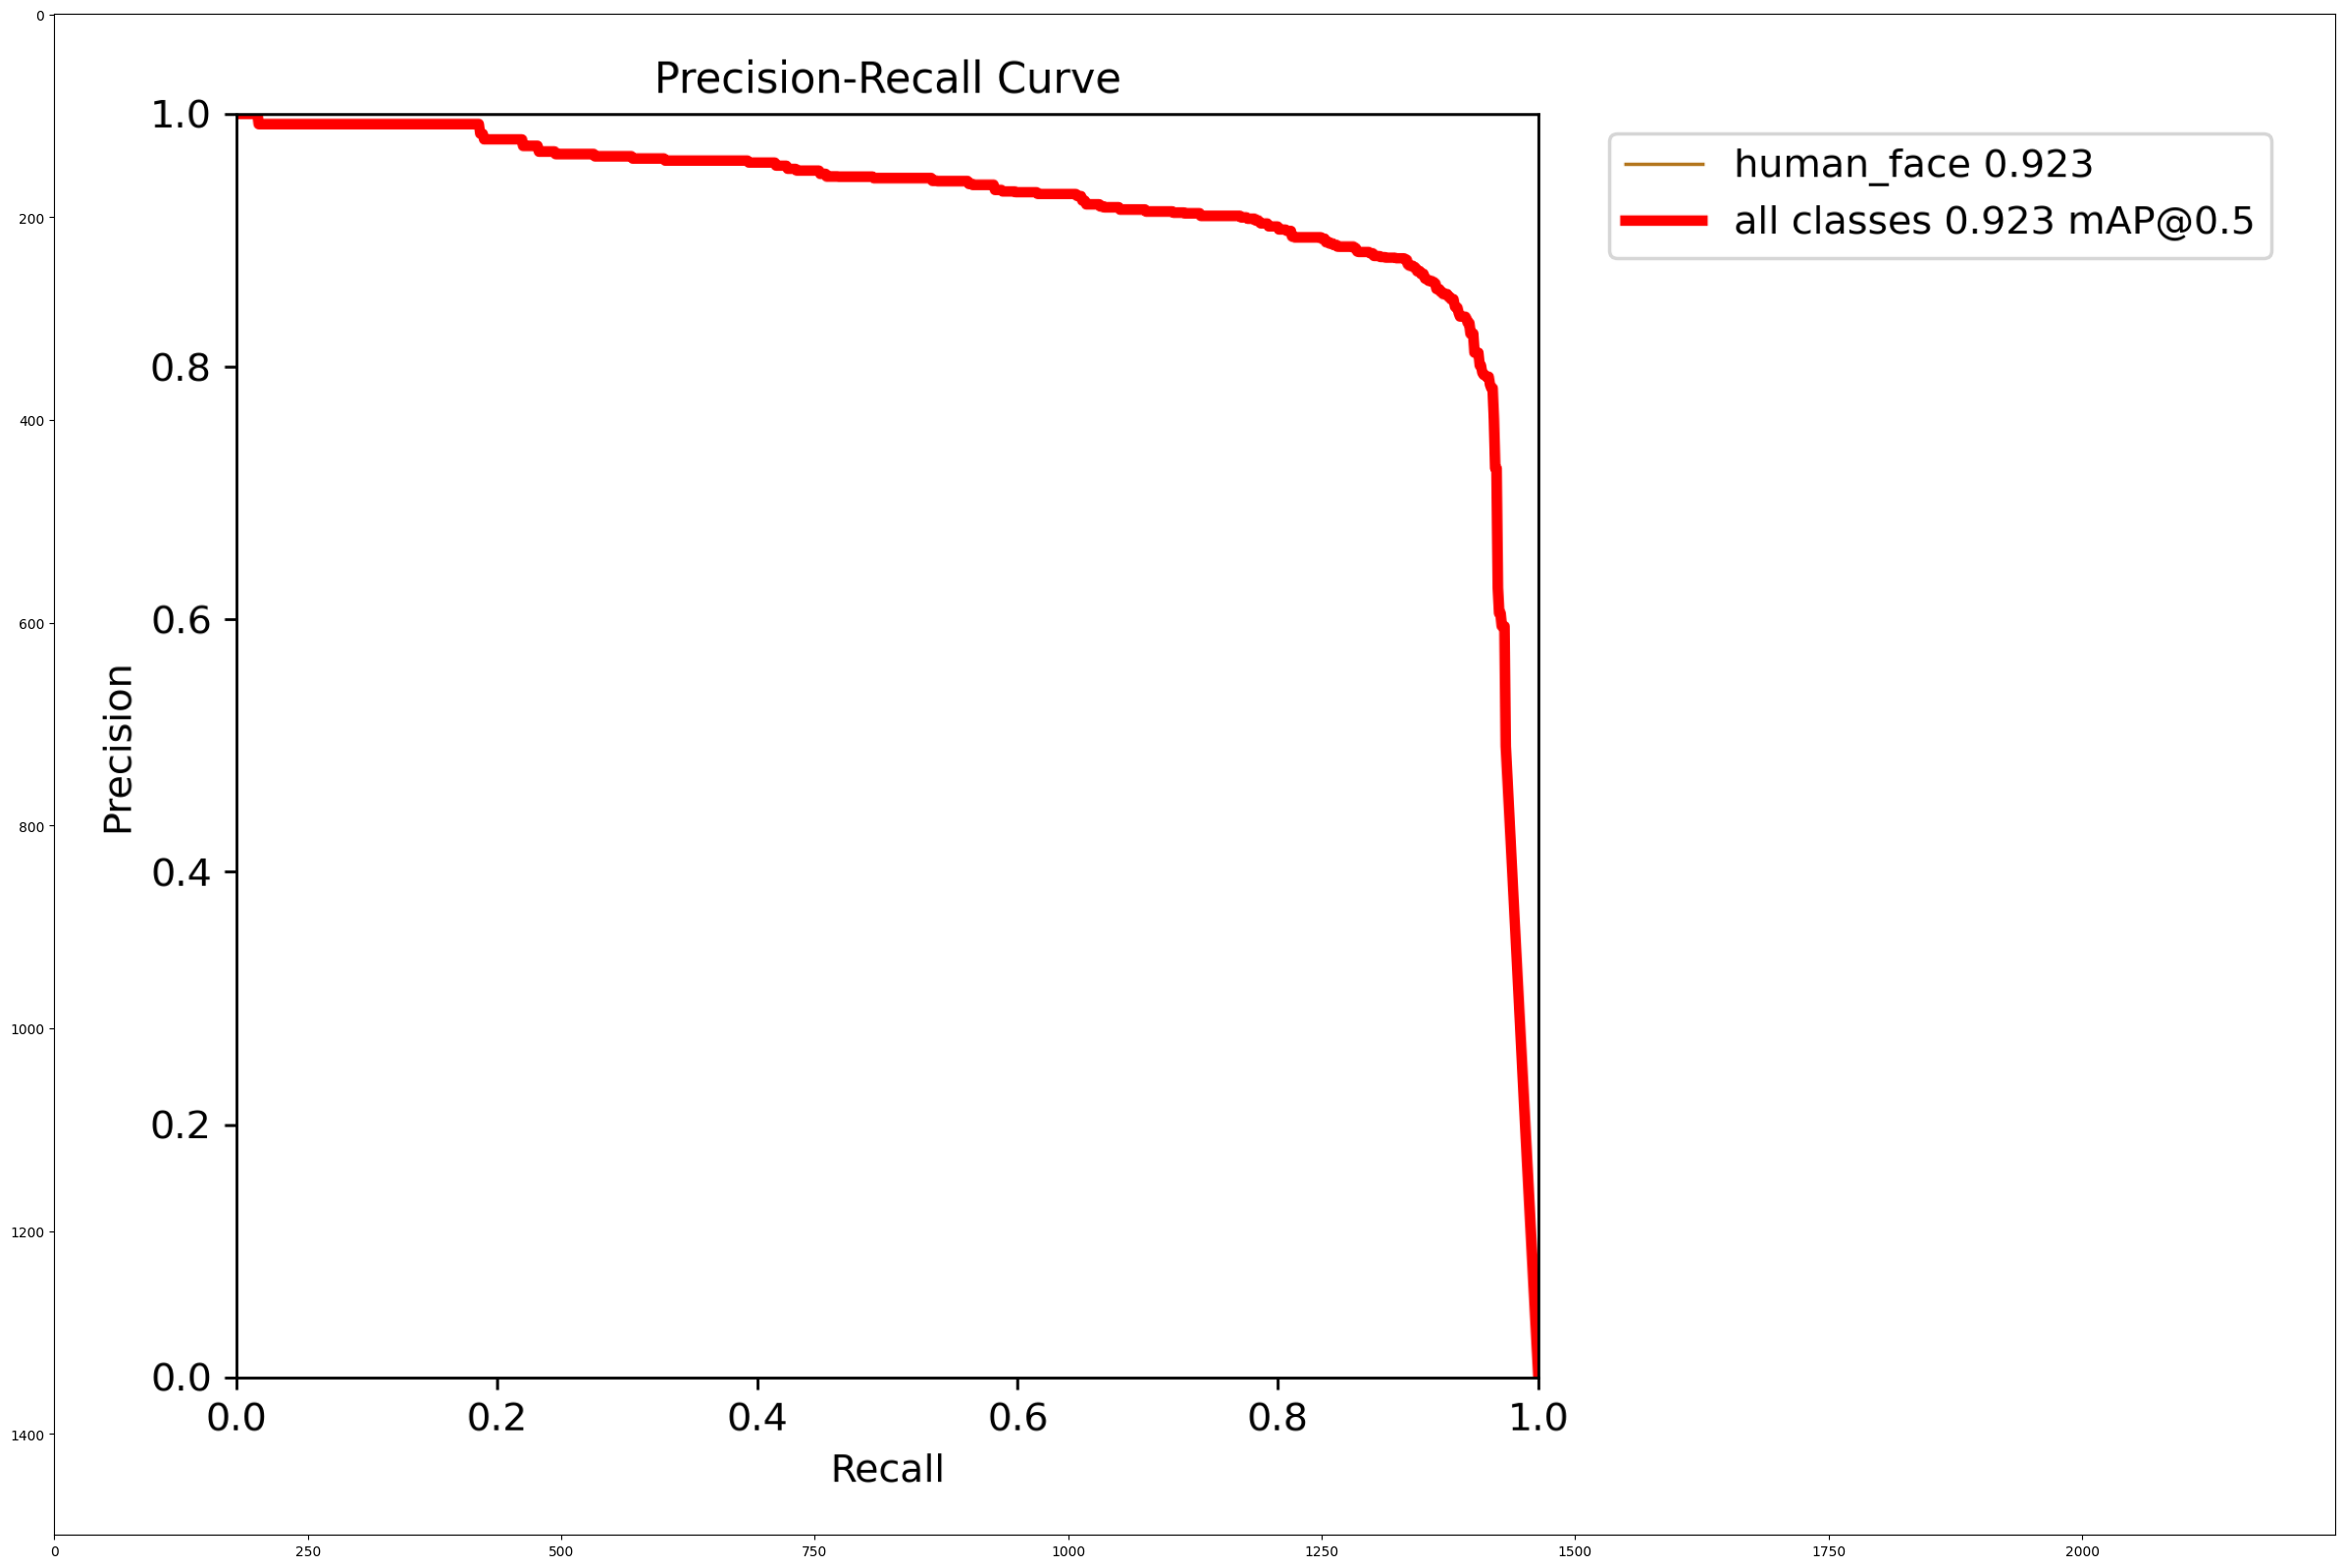

In [34]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp4/PR_curve.png")
plt.imshow(results_png)

Precision - Confidence curve

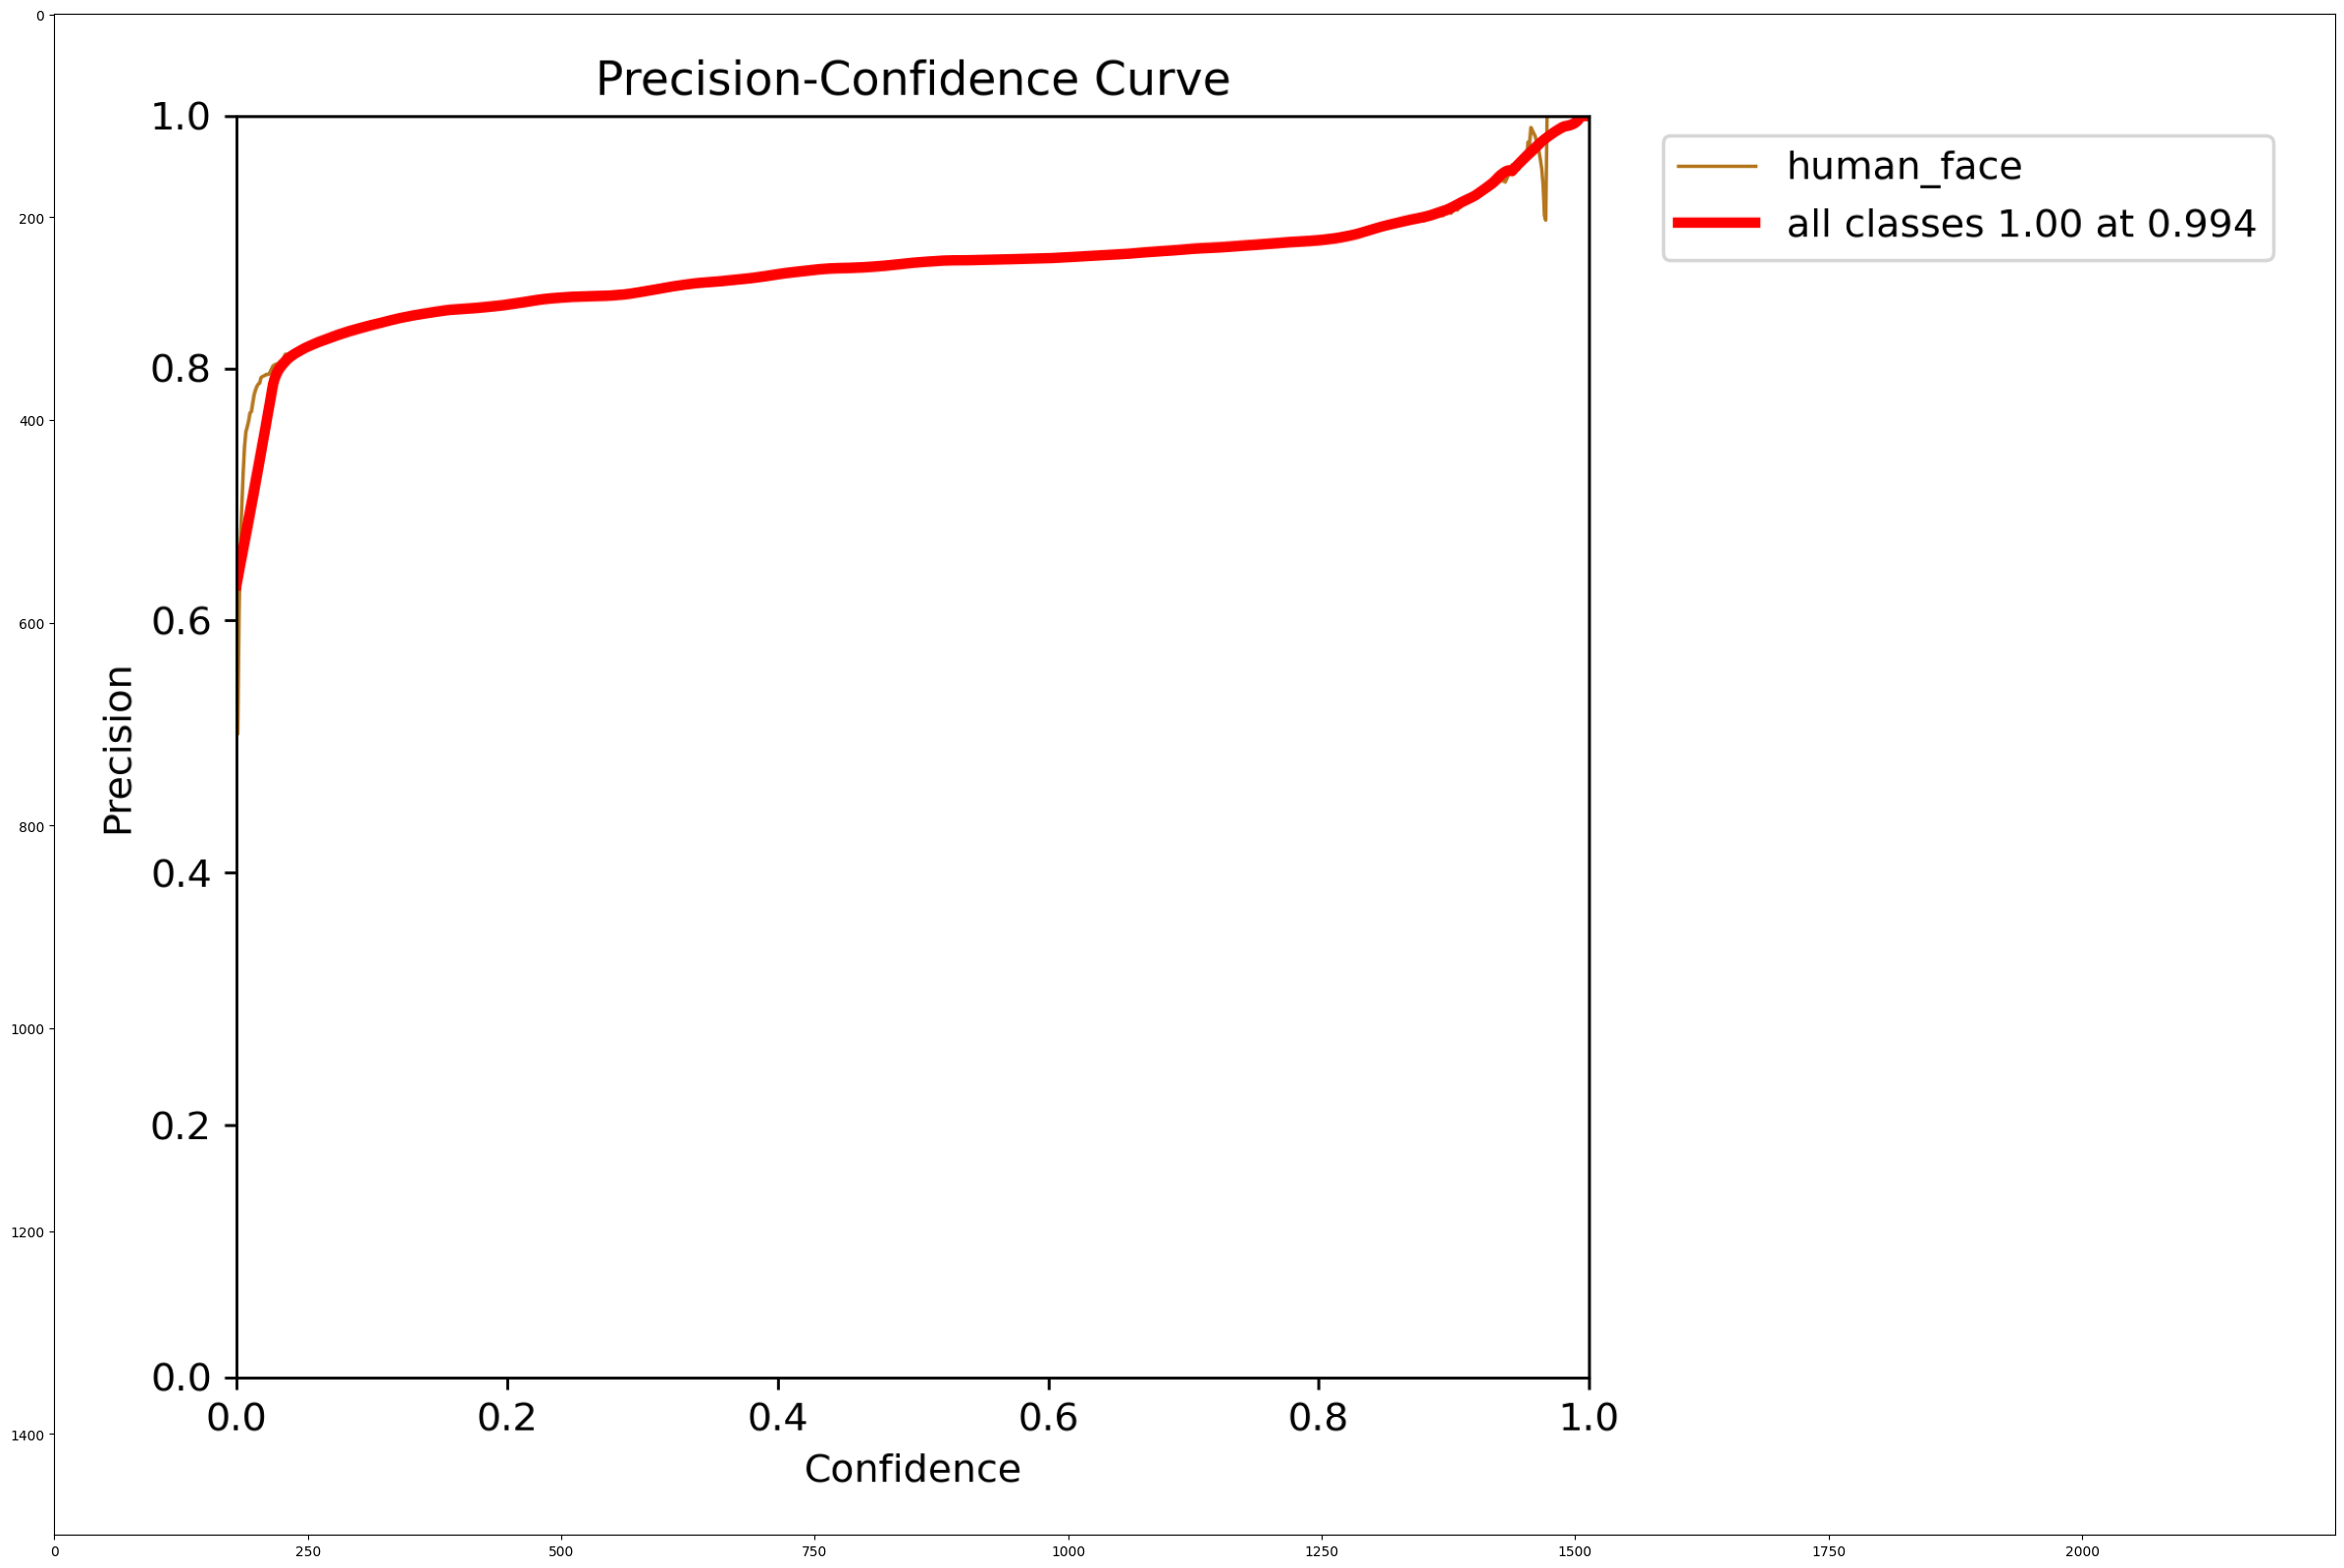

In [35]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp4/P_curve.png")
plt.imshow(results_png)

Recall - Confidence curve

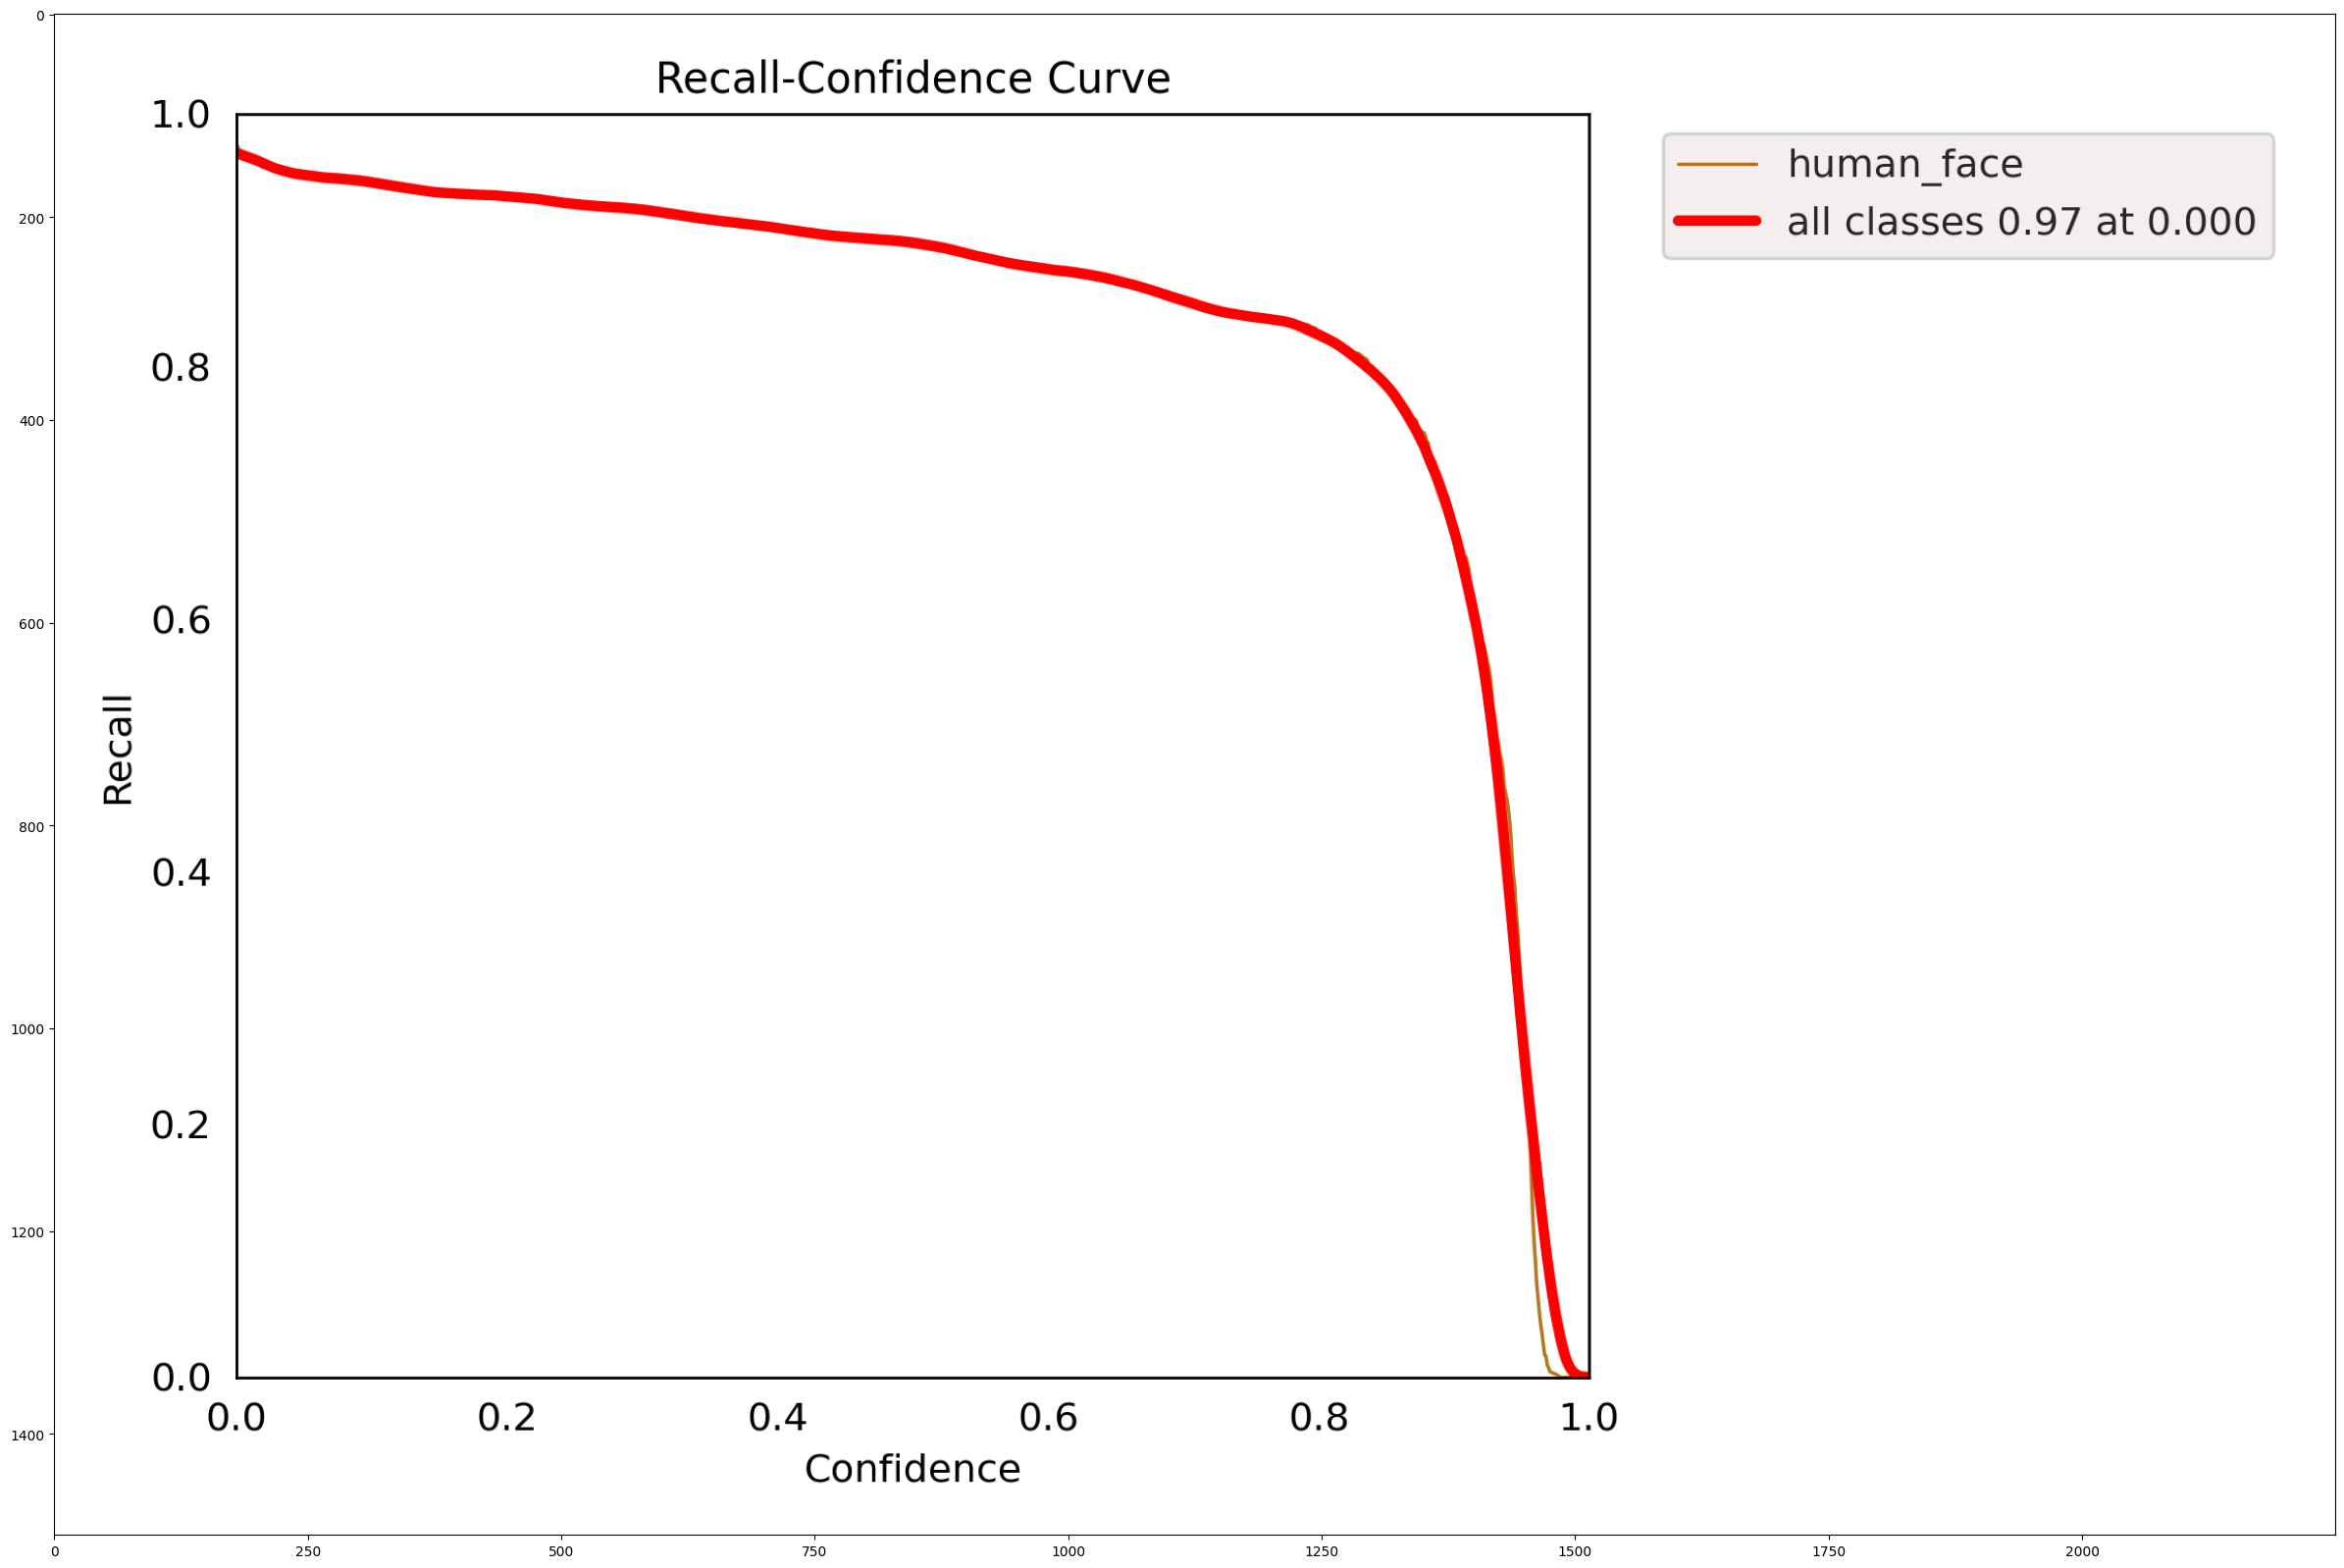

In [36]:
plt.figure(figsize=(30,30))
results_png=cv2.imread("/content/gdrive/MyDrive/BasementFriends/faceDetection/yolov5/runs/val/exp4/R_curve.png")
plt.imshow(results_png)

# Saving best model

In [7]:
!python export.py --weights runs/train/exp4/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['runs/train/exp4/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp4/weights/best.pt with output shape (1, 25200, 6) (13.7 MB)

TorchScript: starting export with torch 2.1.0+cu118...
TorchScript: export success ✅ 2.4s, saved as runs/train/exp4/weights/best.torchscript (27.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 251.0 MB/s eta 0:00:00

requirements: AutoUpdate success 